In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

Month  Year    Region  Dengue_Cases  Dengue_Deaths
0       January  2016  Region I           705              1
1      February  2016  Region I           374              0
2         March  2016  Region I           276              0
3         April  2016  Region I           240              2
4           May  2016  Region I           243              1
...         ...   ...       ...           ...            ...
1015     August  2020     BARMM            91              0
1016  September  2020     BARMM            16              8
1017    October  2020     BARMM            13              9
1018   November  2020     BARMM            15              1
1019   December  2020     BARMM            23              0

[1020 rows x 5 columns]

In [4]:
# # Ensure 'Year' is integer
# dengue['Year'] = dengue['Year'].astype(int)

# # Filter the data between 2016 and 2020
# df_filtered = dengue[(dengue['Year'] >= 2016) & (dengue['Year'] <= 2020)]

# # Group using for loop
# for year in range(2016, 2021):
#     yearly_data = df_filtered[df_filtered['Year'] == year]
#     grouped = yearly_data.groupby('Region')['Dengue_Cases'].sum().reset_index()
#     print(f"\nDengue Cases per Region for {year}:")
#     print(grouped)

In [5]:
dengue["Month"] = dengue["Month"].astype("category")
dengue["Region"] = dengue["Region"].astype("category")

<h1>Insight no. 1</h1>
<h3>Month with the highest record of Dengue Cases over 5 years (2016-2020)</h3>
<h4>August stands out as the month with the highest record of Dengue cases over the past five years (2016-2020). This finding is consistent with the general pattern of Dengue outbreaks, which often coincide with the rainy season in all regions.</h4>

In [6]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

In [7]:
monthly_cases = dengue.groupby(["Month", "Year"])["Dengue_Cases"].sum()
monthly_cases

Month      Year
January    2016    17052
           2017    15623
           2018    12657
           2019    20672
           2020    18324
February   2016    12386
           2017     9872
           2018    10466
           2019    25494
           2020    19583
March      2016     9300
           2017     7696
           2018     7944
           2019    19798
           2020    12838
April      2016     7269
           2017     6343
           2018     6860
           2019     9252
           2020     2784
May        2016     8092
           2017     4853
           2018     6594
           2019    10387
           2020     2461
June       2016    10831
           2017     7589
           2018    11502
           2019    25523
           2020     2665
July       2016    29744
           2017    18340
           2018    30363
           2019    55220
           2020     4575
August     2016    36195
           2017    25039
           2018    34210
           2019    85038
         

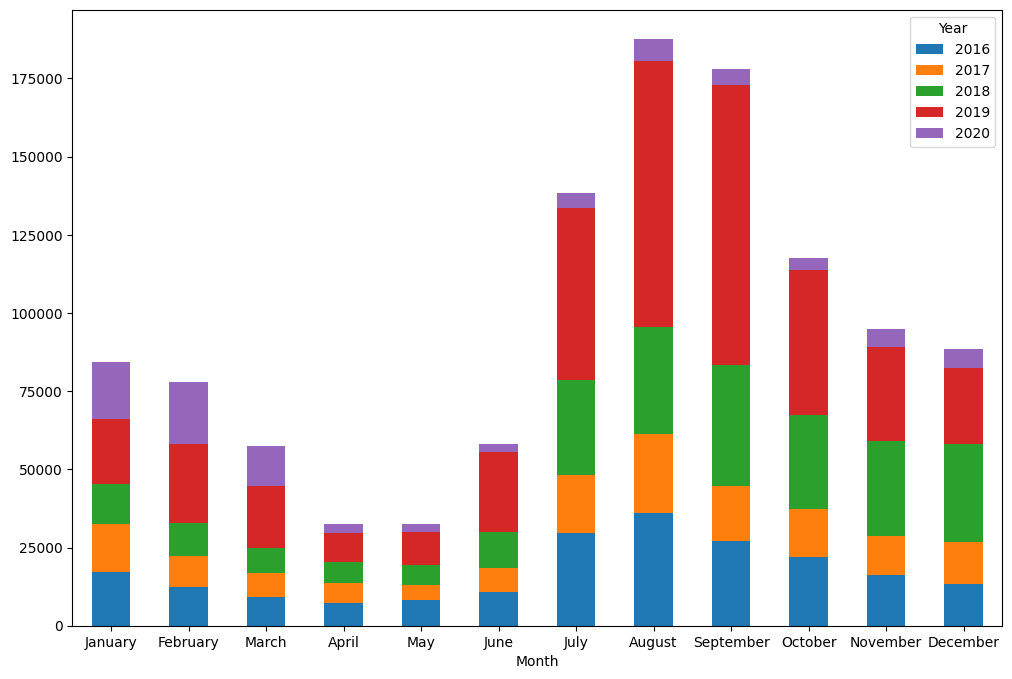

In [8]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.xticks(rotation=0)
plt.show()

<h1>Insight no. 2</h1>
<h3>Month with the highest record of Dengue Deaths over 5 years (2016-2020)</h3>
<h4>October stands out as the month with the highest record of Dengue deaths over the 5-year period (2016-2020). This indicates that October experiences a significant spike in Dengue-related fatalities.</h4>

In [9]:
monthly_deaths = dengue.groupby(["Month", "Year"])["Dengue_Deaths"].sum()
monthly_deaths

Month      Year
January    2016      73
           2017      95
           2018      65
           2019      94
           2020      67
February   2016      43
           2017      64
           2018      43
           2019     101
           2020      64
March      2016      47
           2017      36
           2018      58
           2019     103
           2020      47
April      2016      40
           2017      43
           2018      41
           2019      59
           2020      17
May        2016      41
           2017      23
           2018      31
           2019      56
           2020      11
June       2016      69
           2017      42
           2018      78
           2019     119
           2020      14
July       2016     123
           2017      74
           2018     153
           2019     232
           2020      29
August     2016     132
           2017     111
           2018     156
           2019     280
           2020      35
September  2016    3418


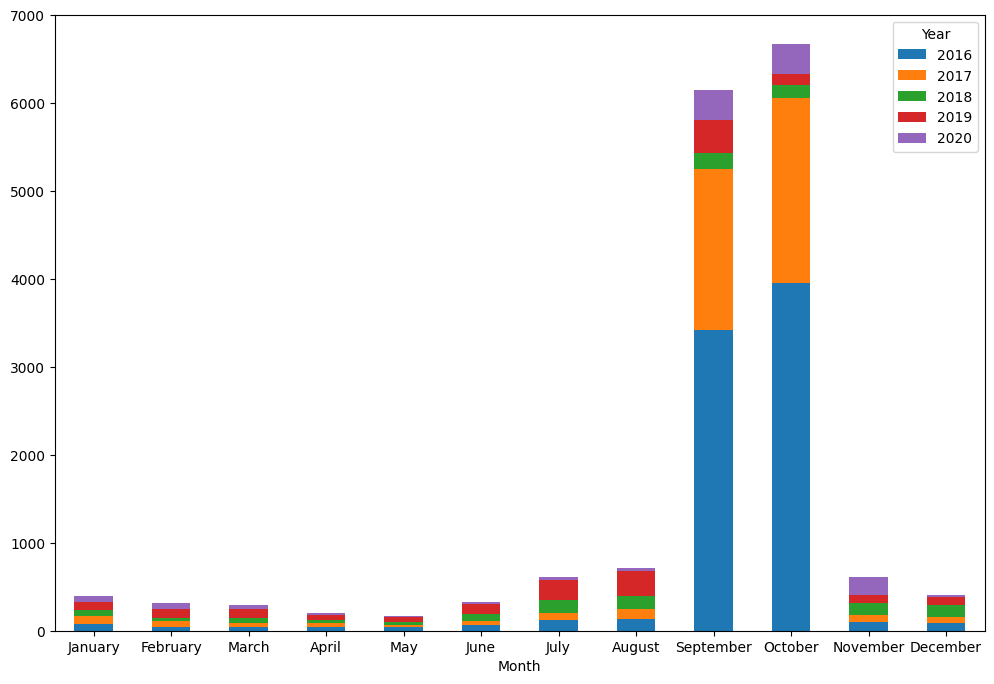

In [10]:
monthly_deaths.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.xticks(rotation=0)
plt.show()

In [11]:
dengue_2016 = dengue[dengue["Year"] == 2016]
dengue_2017 = dengue[dengue["Year"] == 2017]
dengue_2018 = dengue[dengue["Year"] == 2018]
dengue_2019 = dengue[dengue["Year"] == 2019]
dengue_2020 = dengue[dengue["Year"] == 2020]

<h1>Insight no. 3</h1>
<h3>Dengue Cases per Region in the Year 2016</h3>
<h4>Region VII (Central Visayas) reported the highest number of Dengue cases among all regions in the Philippines.</h4>

In [12]:
dengue_2016.groupby(["Region"])["Dengue_Cases"].sum()

Region
BARMM           2191
CAR             9164
NCR            13002
Region I        8281
Region II       3891
Region III     20989
Region IV-A    24282
Region IV-B     3999
Region IX       7215
Region V        2532
Region VI      26170
Region VII     29395
Region VIII     5388
Region X       17680
Region XI      12137
Region XII     16013
Region XIII     7215
Name: Dengue_Cases, dtype: int64

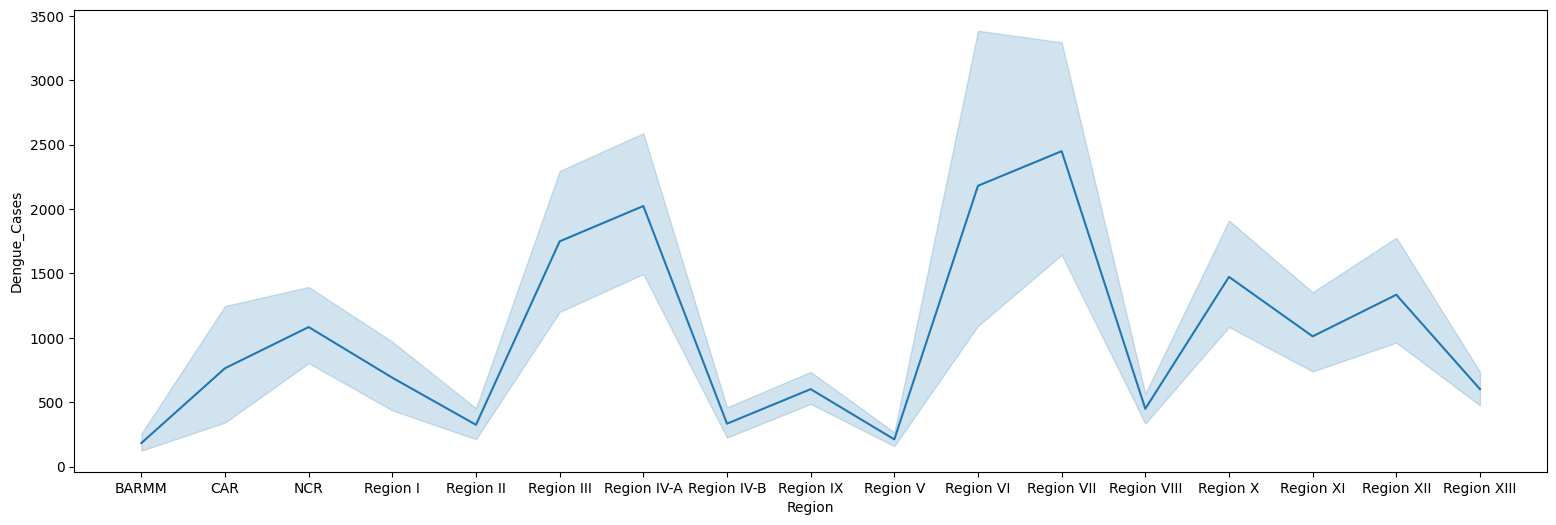

In [13]:
sns.lineplot(data=dengue_2016, y="Dengue_Cases", x="Region")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight no. 4</h1>
<h3>Dengue Cases per Region in the Year 2017</h3>
<h4>In 2017, the National Capital Region (NCR) emerged as the region with the most Dengue cases.</h4>

In [14]:
dengue_2017.groupby(["Region"])["Dengue_Cases"].sum()

Region
BARMM            485
CAR             4045
NCR            26103
Region I        8236
Region II       5310
Region III     25200
Region IV-A    22421
Region IV-B     2770
Region IX       4274
Region V        3225
Region VI       9283
Region VII     15940
Region VIII     3916
Region X        6679
Region XI       3667
Region XII      9613
Region XIII     2988
Name: Dengue_Cases, dtype: int64

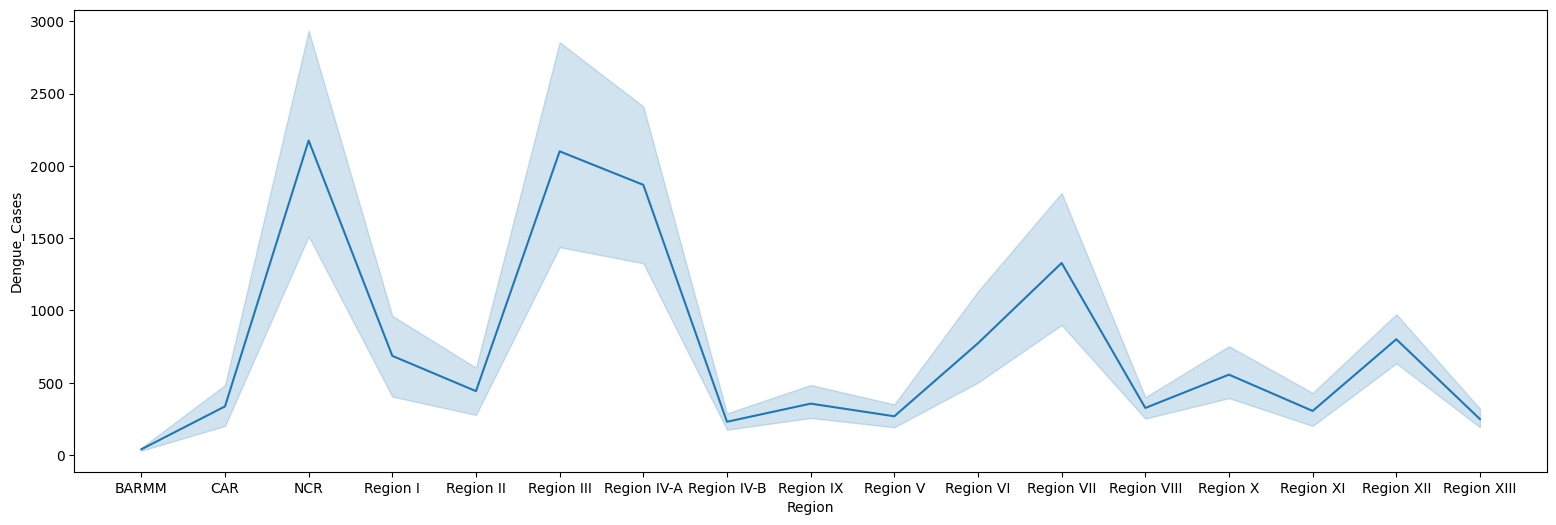

In [15]:
sns.lineplot(data=dengue_2017, y="Dengue_Cases", x="Region")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight no. 5</h1>
<h2>Dengue Cases per Region in the Year 2018</h2>
<h4>In 2018, the highest number of Dengue cases was recorded in Region III (Central Luzon).This region’s mix of urban and rural communities, along with its location as a major transit hub, may have contributed to widespread transmission.</h4>

In [16]:
dengue_2018.groupby(["Region"])["Dengue_Cases"].sum()

Region
BARMM           2460
CAR             7584
NCR            29200
Region I       15511
Region II      17678
Region III     31726
Region IV-A    30410
Region IV-B     8019
Region IX       6161
Region V        3548
Region VI      17582
Region VII     21889
Region VIII    10976
Region X       23497
Region XI       6316
Region XII      9173
Region XIII     9053
Name: Dengue_Cases, dtype: int64

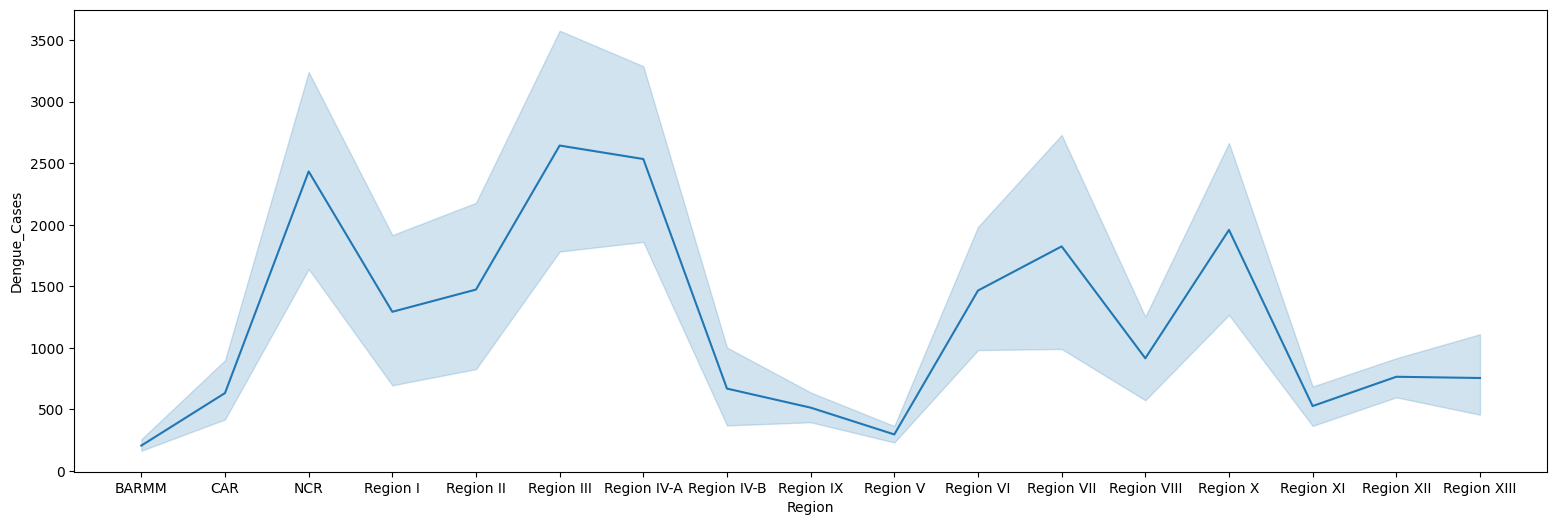

In [17]:
sns.lineplot(data=dengue_2018, y="Dengue_Cases", x="Region")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight no. 6</h1>
<h3>Dengue Cases per Region in the Year 2019</h3>
<h4>Region IV-A (CALABARZON) saw a dramatic spike, with 76,195 Dengue cases  in 2019— the highest annual case count during the five-year period.</h4>

In [18]:
dengue_2019.groupby(["Region"])["Dengue_Cases"].sum()

Region
BARMM           5393
CAR             8808
NCR            40478
Region I       19867
Region II      16634
Region III     37158
Region IV-A    76195
Region IV-B    10984
Region IX      27447
Region V       11141
Region VI      60357
Region VII     31053
Region VIII    26871
Region X       28356
Region XI       8466
Region XII     20640
Region XIII    12054
Name: Dengue_Cases, dtype: int64

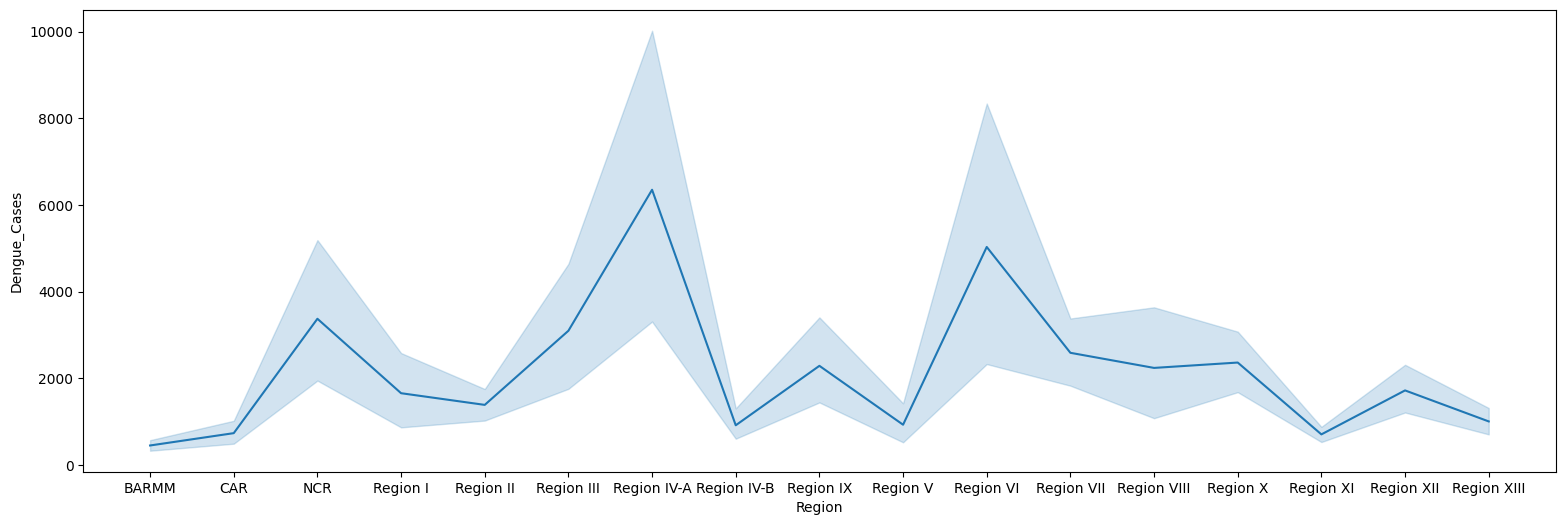

In [19]:
sns.lineplot(data=dengue_2019, y="Dengue_Cases", x="Region")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight no. 7</h1>
<h3>Dengue Cases per Region in the Year 2020</h3>
<h4>Region III (Central Luzon) returned to the top spot, though cases dropped significantly to 15,991, likely influenced by mobility restrictions and intensified health campaigns due to the COVID-19 pandemic.</h4>

In [20]:
dengue_2020.groupby(["Region"])["Dengue_Cases"].sum()

Region
BARMM           1008
CAR              981
NCR             7183
Region I        7171
Region II       1628
Region III     15991
Region IV-A     9721
Region IV-B     5077
Region IX       2684
Region V        1721
Region VI       4131
Region VII     12406
Region VIII     4832
Region X        6225
Region XI       1936
Region XII      4363
Region XIII     3983
Name: Dengue_Cases, dtype: int64

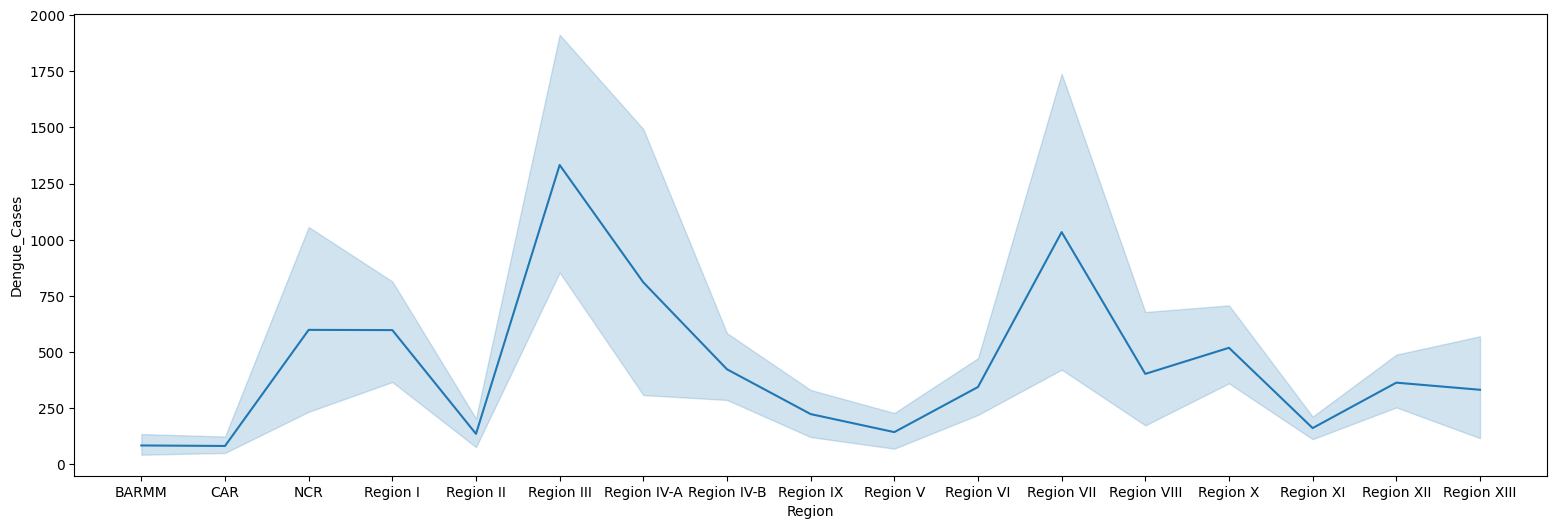

In [21]:
sns.lineplot(data=dengue_2020, y="Dengue_Cases", x="Region")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight no. 8</h1>
<h3>Dengue Deaths per Region in the Year 2016</h3>
<h4>In 2016, the National Capital Region (NCR) faced a severe Dengue outbreak, with 2,987 deaths attributed to the disease.</h4>

In [22]:
dengue_2016.groupby(["Region"])["Dengue_Deaths"].sum()

Region
BARMM           243
CAR             888
NCR            2987
Region I         21
Region II        11
Region III       65
Region IV-A     108
Region IV-B      18
Region IX        41
Region V         16
Region VI        87
Region VII      243
Region VIII      42
Region X         69
Region XI        95
Region XII     2369
Region XIII     824
Name: Dengue_Deaths, dtype: int64

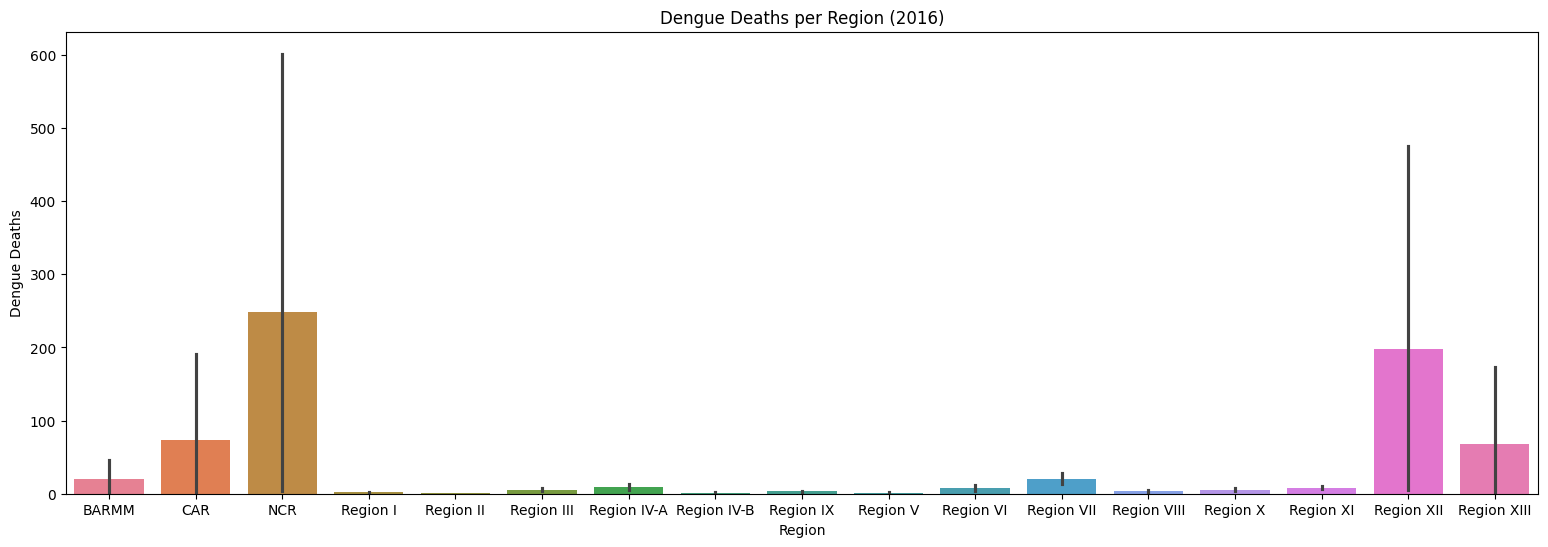

In [23]:
sns.barplot(data=dengue_2016, y="Dengue_Deaths", x="Region", hue="Region")
plt.gcf().set_size_inches(19, 6)
plt.title("Dengue Deaths per Region (2016)")
plt.xlabel("Region")
plt.ylabel("Dengue Deaths")
plt.show()

<h1>Insight no. 9</h1>
<h3>Dengue Deaths per Region in the Year 2017</h3>
<h4>In 2017, Region VI (Western Visayas) experienced a significant public health crisis, with 1,380 Dengue-related deaths.</h4>

In [24]:
dengue_2017.groupby(["Region"])["Dengue_Deaths"].sum()

Region
BARMM             2
CAR              12
NCR             168
Region I         23
Region II        34
Region III       81
Region IV-A     110
Region IV-B      12
Region IX       313
Region V         24
Region VI      1380
Region VII     1189
Region VIII     398
Region X        548
Region XI       209
Region XII       46
Region XIII      14
Name: Dengue_Deaths, dtype: int64

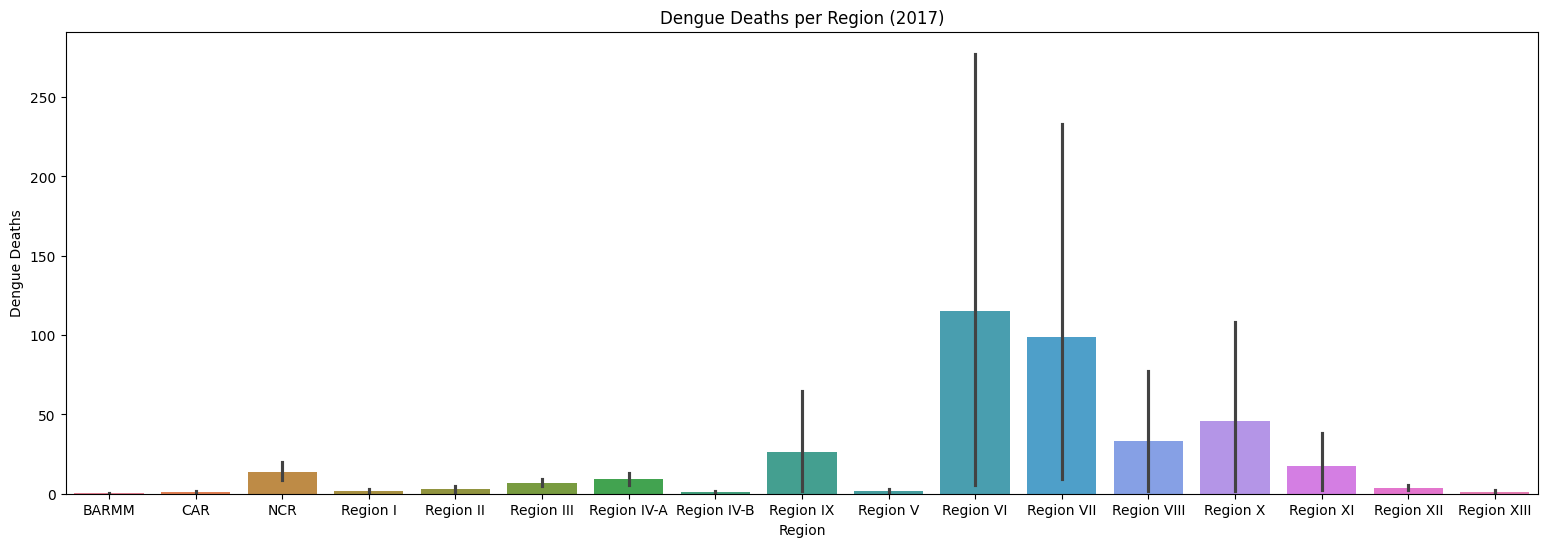

In [25]:
sns.barplot(data=dengue_2017, y="Dengue_Deaths", x="Region", hue="Region")
plt.gcf().set_size_inches(19, 6)
plt.title("Dengue Deaths per Region (2017)")
plt.xlabel("Region")
plt.ylabel("Dengue Deaths")
plt.show()

<h1>Insight no. 10</h1>
<h3>Dengue Deaths per Region in the Year 2018</h3>
<h4>In 2018, the National Capital Region (NCR) reported 180 Dengue-related deaths, which highlights the persistent and serious public health threat posed by Dengue in urbanized areas.</h4>

In [26]:
dengue_2018.groupby(["Region"])["Dengue_Deaths"].sum()

Region
BARMM           33
CAR              8
NCR            180
Region I        53
Region II       62
Region III      85
Region IV-A    157
Region IV-B     51
Region IX       54
Region V        36
Region VI      109
Region VII     131
Region VIII     60
Region X       101
Region XI       22
Region XII      42
Region XIII     42
Name: Dengue_Deaths, dtype: int64

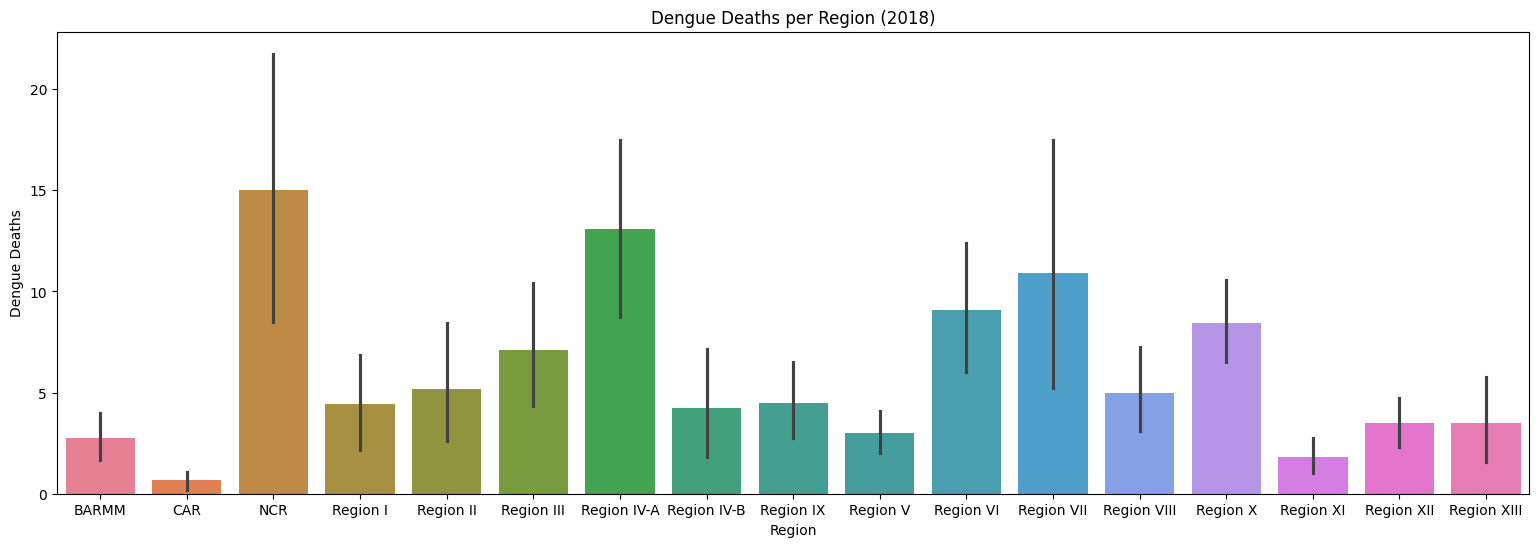

In [27]:
sns.barplot(data=dengue_2018, y="Dengue_Deaths", x="Region", hue="Region")
plt.gcf().set_size_inches(19, 6)
plt.title("Dengue Deaths per Region (2018)")
plt.xlabel("Region")
plt.ylabel("Dengue Deaths")
plt.show()

<h1>Insight no. 11</h1>
<h3>Dengue Deaths per Region in the Year 2019</h3>
<h4>In 2019, Region IV-A (CALABARZON) reported 240 Dengue-related deaths, highlighting the severity of the Dengue outbreak in the region.</h4>

In [28]:
dengue_2019.groupby(["Region"])["Dengue_Deaths"].sum()

Region
BARMM           31
CAR             27
NCR            190
Region I        42
Region II       77
Region III     194
Region IV-A    242
Region IV-B     26
Region IX      108
Region V        88
Region VI      233
Region VII     143
Region VIII     73
Region X        95
Region XI       46
Region XII      91
Region XIII     27
Name: Dengue_Deaths, dtype: int64

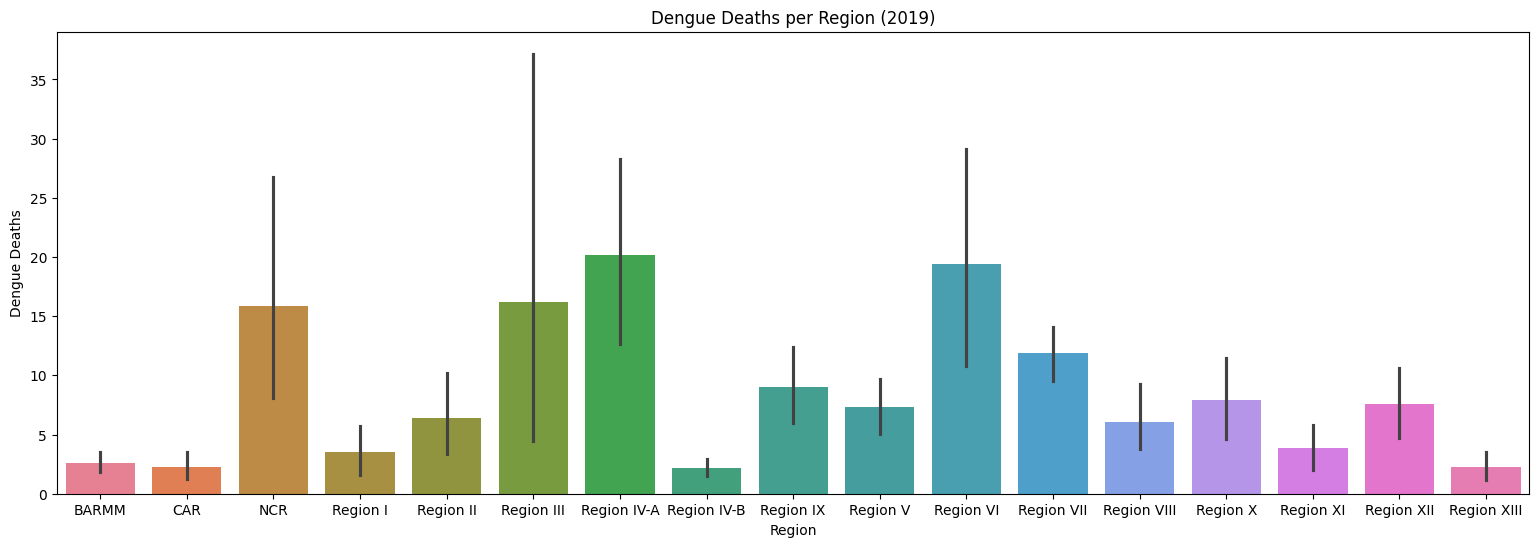

In [29]:
sns.barplot(data=dengue_2019, y="Dengue_Deaths", x="Region", hue="Region")
plt.gcf().set_size_inches(19, 6)
plt.title("Dengue Deaths per Region (2019)")
plt.xlabel("Region")
plt.ylabel("Dengue Deaths")
plt.show()

<h1>Insight no. 12</h1>
<h3>Dengue Deaths per Region in the Year 2020</h3>
<h4>In 2020, Dengue-related deaths in NCR significantly decreased to 483 deaths, a sharp reduction compared to 2,987 deaths in 2016. This result represents a dramatic decline in fatalities, which can be attributed to several factors like COVID-19 pandemic.</h4>

In [30]:
dengue_2020.groupby(["Region"])["Dengue_Deaths"].sum()

Region
BARMM           23
CAR             73
NCR            483
Region I        18
Region II        9
Region III      57
Region IV-A     35
Region IV-B     23
Region IX       16
Region V        21
Region VI       16
Region VII      54
Region VIII     12
Region X        35
Region XI       13
Region XII     248
Region XIII     59
Name: Dengue_Deaths, dtype: int64

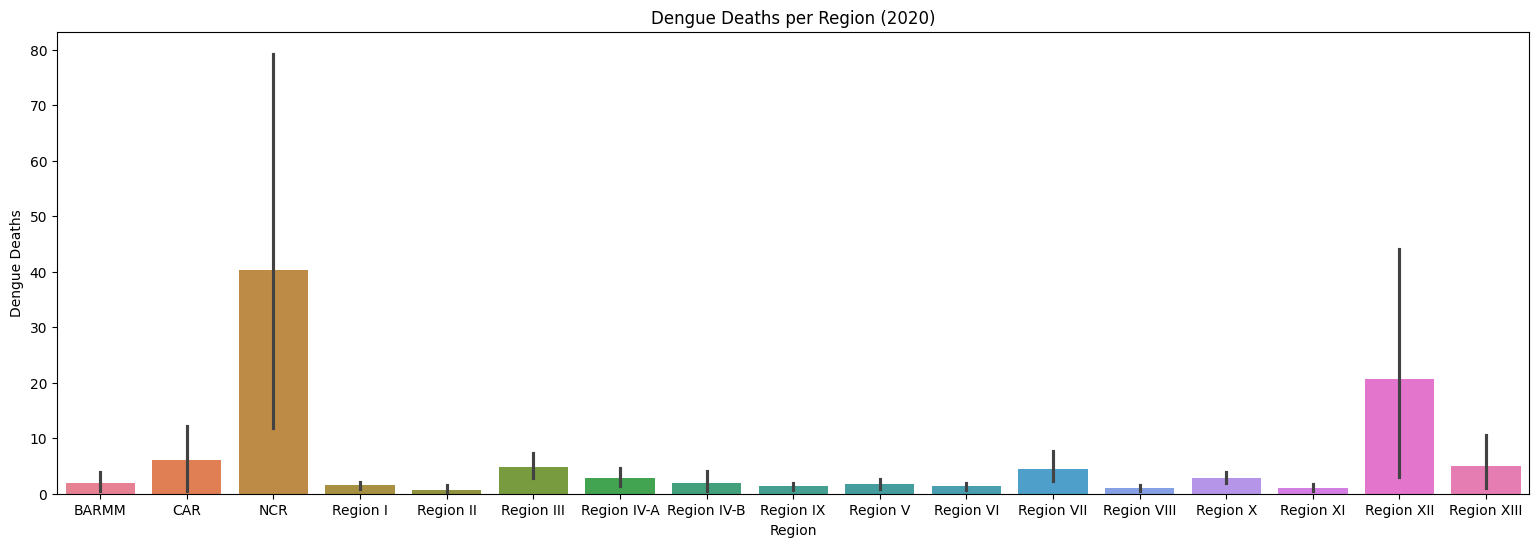

In [31]:
sns.barplot(data=dengue_2020, y="Dengue_Deaths", x="Region", hue="Region")
plt.gcf().set_size_inches(19, 6)
plt.title("Dengue Deaths per Region (2020)")
plt.xlabel("Region")
plt.ylabel("Dengue Deaths")
plt.show()

<h1>Insight no. 13</h1>
<h3>Correlation of Dengue Cases and Deaths</h3>

<h4>0.0383 suggests that Dengue deaths are almost independent of Dengue cases, which means that the number of Dengue cases does not strongly predict or explain the number of Dengue-related deaths.</h4>

In [32]:
dengue["Mortality_Rate"] = np.round((dengue["Dengue_Deaths"] / dengue["Dengue_Cases"]) * 100, 2)

In [33]:
correlation = dengue['Dengue_Cases'].corr(dengue['Dengue_Deaths'])
correlation

np.float64(0.0383221372041949)

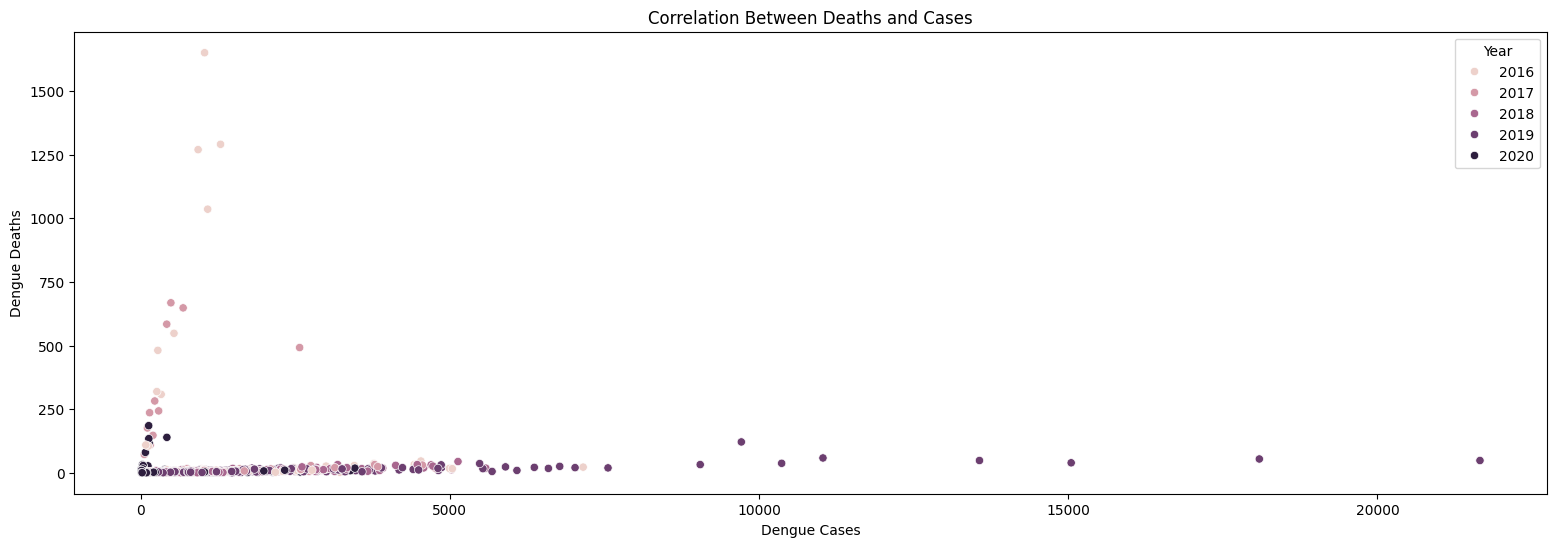

In [34]:
sns.scatterplot(data=dengue, y="Dengue_Deaths", x="Dengue_Cases", hue="Year")
plt.gcf().set_size_inches(19, 6)
plt.title("Correlation Between Deaths and Cases")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()

<h1>Insight no. 14</h1>
<h3>Month with the highest Mortality Rate in Region I</h3>
<h4>In the month of April, Region I exhibited a mortality rate of 6.12 over the 5-year period from 2016 to 2020. This relatively high mortality rate in the region suggests a concerning trend, especially during the early months of the year when Dengue cases tend to rise due to the rainy season and mosquito breeding conditions.</h4>

In [35]:
region1 = dengue[dengue["Region"] == "Region I"]
region1.groupby(["Month"])["Mortality_Rate"].sum()

Month
January      1.58
February     2.27
March        2.51
April        6.30
May          0.92
June         2.87
July         1.52
August       0.82
September    1.18
October      1.36
November     0.70
December     1.25
Name: Mortality_Rate, dtype: float64

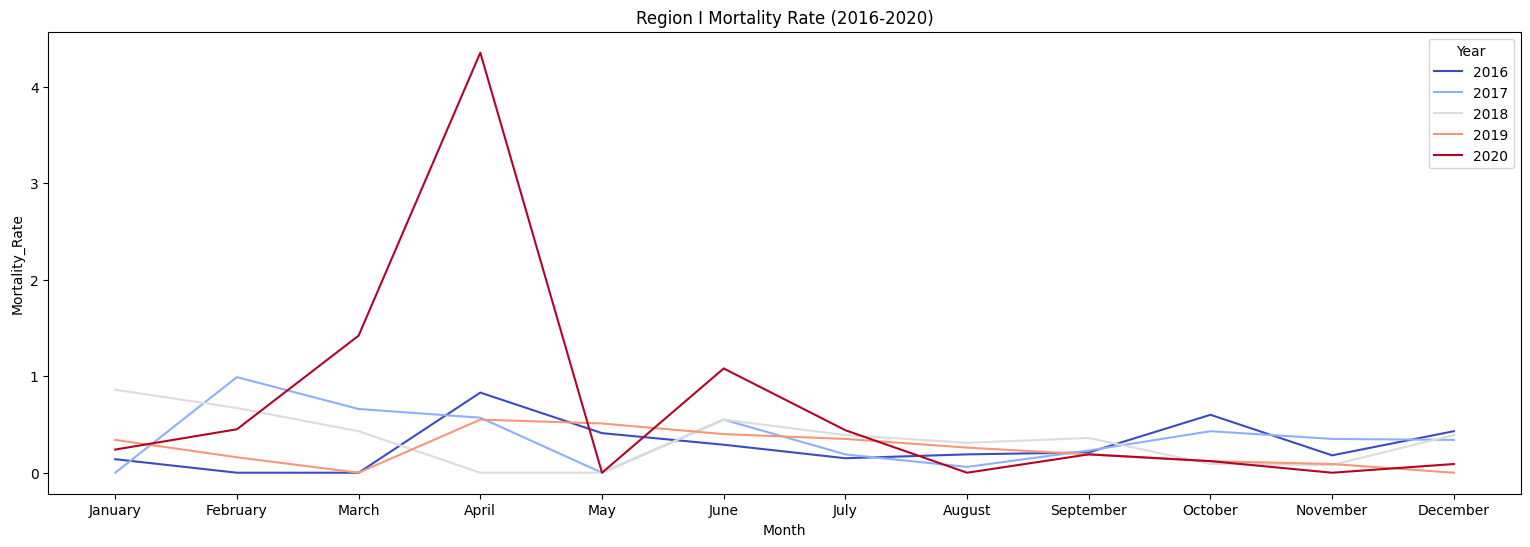

In [36]:
sns.lineplot(data=region1, y="Mortality_Rate", x="Month", hue="Year", palette = "coolwarm")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region I Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 15</h1>
<h3>Month with the highest Mortality Rate in Region II</h3>
<h4>October in Region II has a recorded mortality rate of 4.10 due to Dengue over the 2016-2020 period. This indicates a higher-than-usual Dengue mortality rate in this region during October.</h4>

In [37]:
region2 = dengue[dengue["Region"] == "Region II"]
region2.groupby(["Month"])["Mortality_Rate"].sum()

Month
January      3.39
February     1.52
March        1.00
April        2.68
May          1.40
June         1.57
July         1.46
August       3.43
September    2.38
October      4.10
November     1.86
December     1.07
Name: Mortality_Rate, dtype: float64

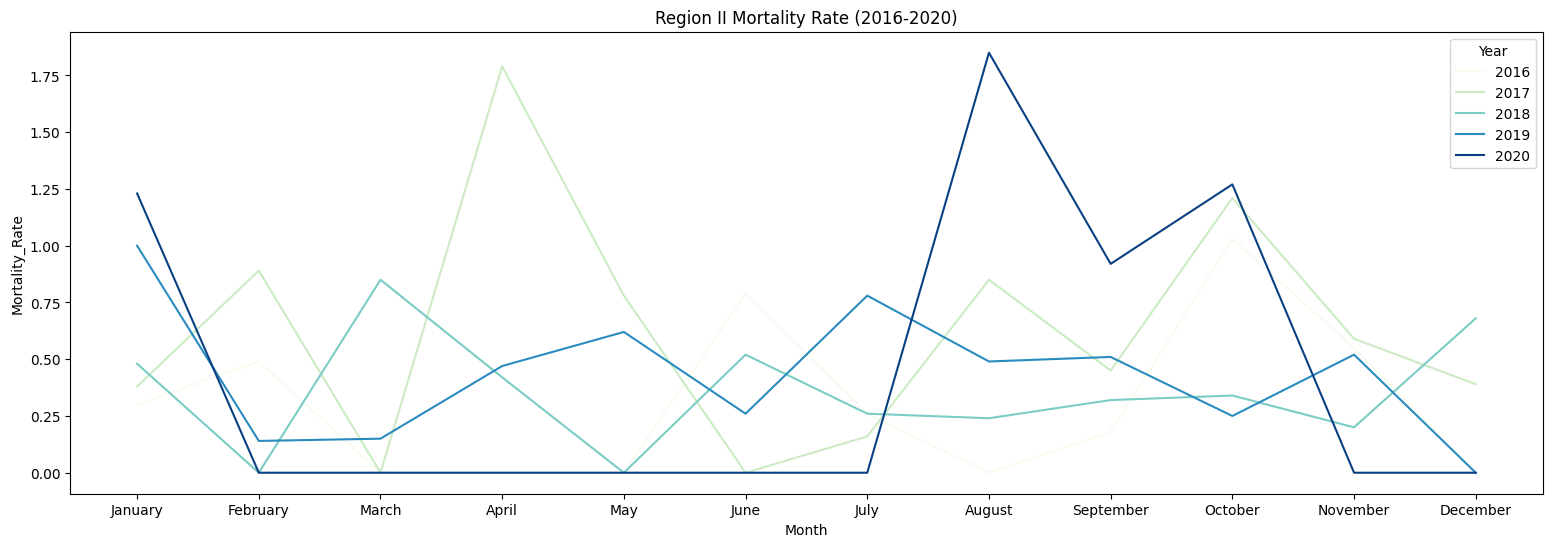

In [38]:
sns.lineplot(data=region2, y="Mortality_Rate", x="Month", hue="Year", palette = "GnBu")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region II Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 16</h1>
<h3>Month with the highest Mortality Rate in Region III</h3>
<h4>In Region III, the recorded Dengue mortality rate of 3.10 in July over the 2016-2020 period indicates a noticeable fatality rate during this month.</h4>

In [39]:
region3 = dengue[dengue["Region"] == "Region III"]
region3.groupby(["Month"])["Mortality_Rate"].sum()

Month
January      1.04
February     1.94
March        1.40
April        0.83
May          0.99
June         2.05
July         3.42
August       1.48
September    2.43
October      1.29
November     1.32
December     1.52
Name: Mortality_Rate, dtype: float64

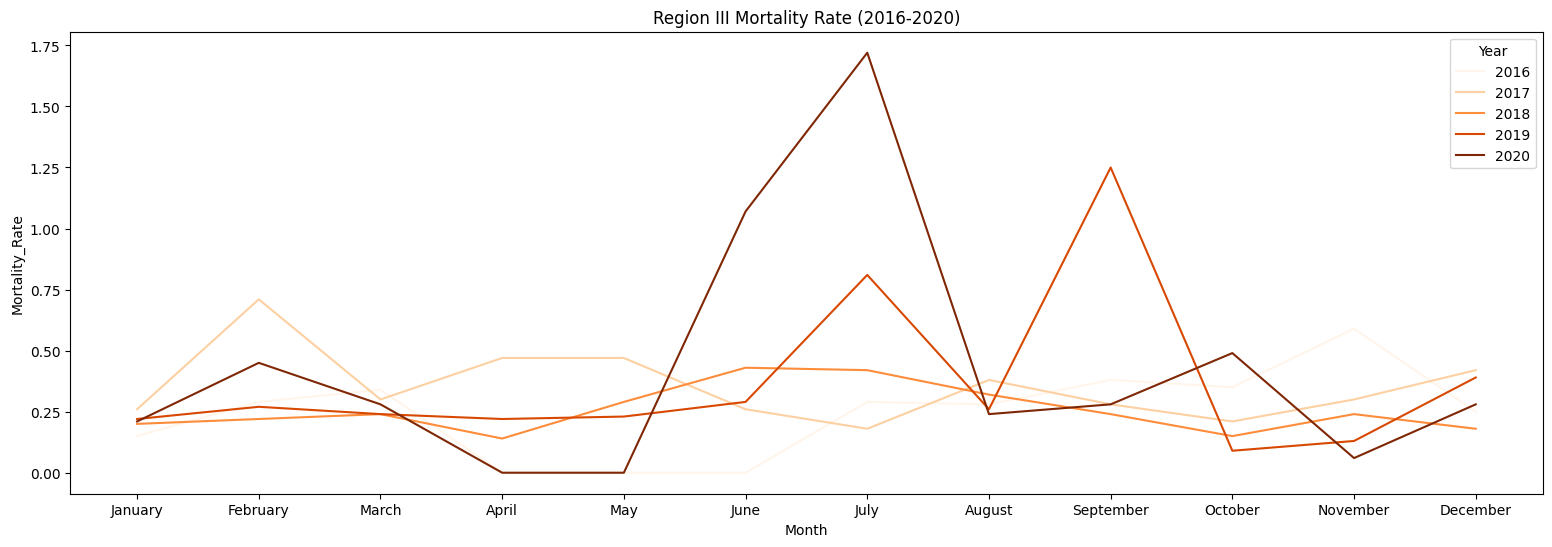

In [40]:
sns.lineplot(data=region3, y="Mortality_Rate", x="Month", hue="Year", palette = "Oranges")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region III Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 17</h1>
<h3>Month with the highest Mortality Rate in Region IV-A</h3>
<h4>The recorded Dengue mortality rate of 3.66 in September in Region IV-A over the 2016-2020 period highlights a significant fatality rate in this month.</h4>

In [41]:
region4A = dengue[dengue["Region"] == "Region IV-A"]
region4A.groupby(["Month"])["Mortality_Rate"].sum()

Month
January      2.58
February     1.66
March        2.55
April        1.52
May          3.25
June         1.64
July         1.38
August       1.68
September    3.66
October      2.79
November     2.68
December     2.40
Name: Mortality_Rate, dtype: float64

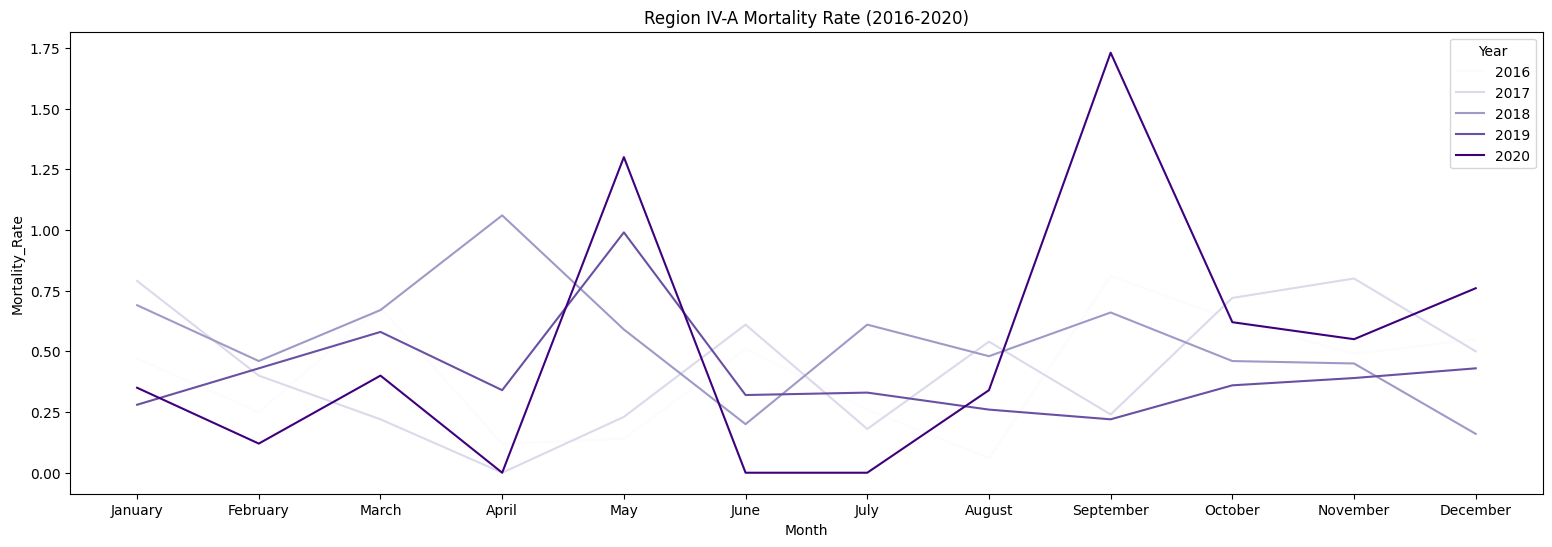

In [42]:
sns.lineplot(data=region4A, y="Mortality_Rate", x="Month", hue="Year", palette = "Purples")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region IV-A Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 18</h1>
<h3>Month with the highest Mortality Rate in Region IV-B</h3>
<h4>The recorded Dengue mortality rate of 4.82 in November in Region IV-B over the 2016-2020 period suggests that November is a critical month in terms of Dengue-related fatalities in this region.</h4>

In [43]:
region4B = dengue[dengue["Region"] == "Region IV-B"]
region4B.groupby(["Month"])["Mortality_Rate"].sum()

Month
January      1.65
February     1.33
March        2.08
April        4.11
May          2.88
June         0.53
July         1.00
August       2.25
September    2.23
October      3.77
November     4.82
December     0.87
Name: Mortality_Rate, dtype: float64

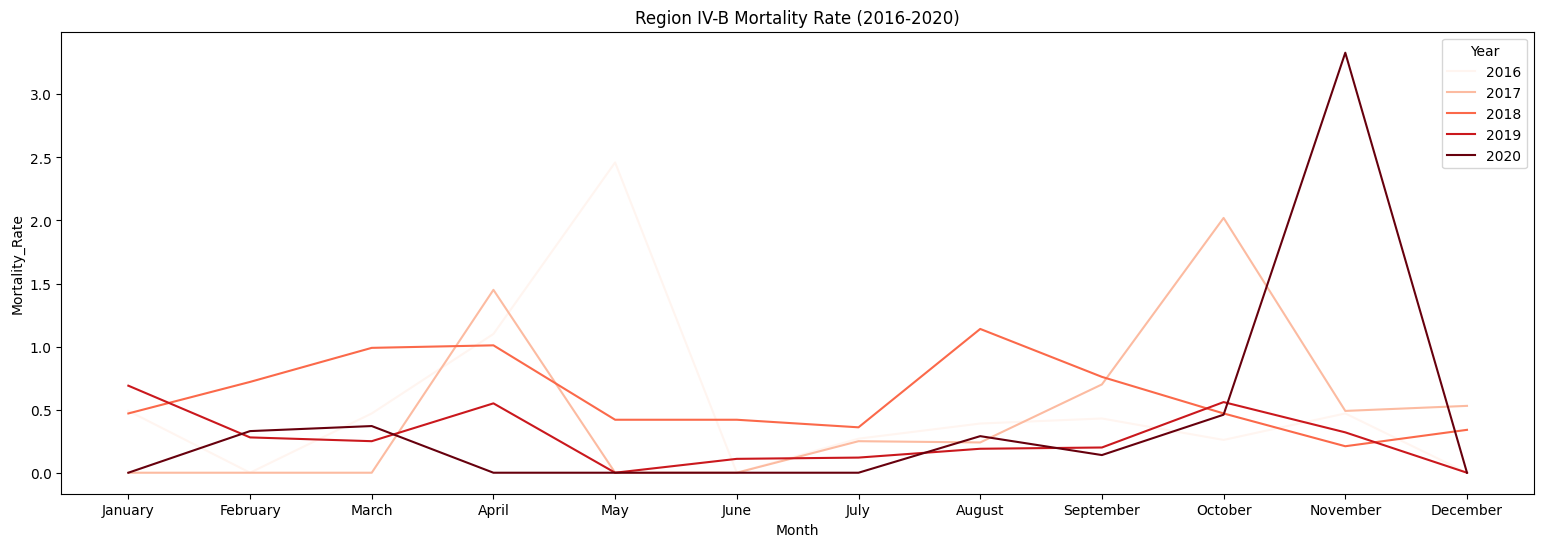

In [44]:
sns.lineplot(data=region4B, y="Mortality_Rate", x="Month", hue="Year", palette = "Reds")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region IV-B Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 19</h1>
<h3>Month with the highest Mortality Rate in Region V</h3>
<h4>The recorded Dengue mortality rate of 7.06 in June in Region V over the 2016-2020 period is notably high and suggests a significant public health challenge.</h4>

In [45]:
region5 = dengue[dengue["Region"] == "Region V"]
region5.groupby(["Month"])["Mortality_Rate"].sum()

Month
January      2.52
February     4.84
March        4.79
April        6.80
May          3.72
June         7.06
July         4.68
August       6.95
September    4.46
October      3.40
November     4.97
December     4.30
Name: Mortality_Rate, dtype: float64

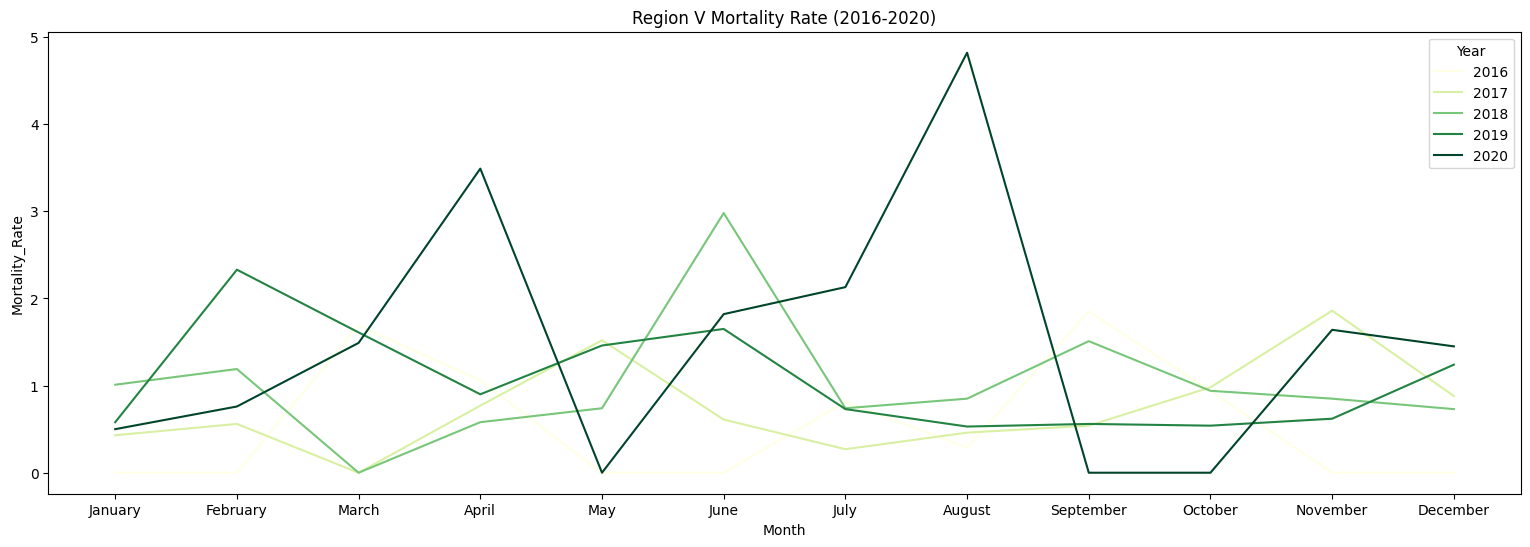

In [46]:
sns.lineplot(data=region5, y="Mortality_Rate", x="Month", hue="Year", palette = "YlGn")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region V Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 20</h1>
<h3>Month with the highest Mortality Rate in Region VI</h3>
<h4>The recorded Dengue mortality rate of 138.93 in October in Region VI is extraordinarily high and signals a severe public health concern. This value suggests a major outbreak and requires an immediate and thorough investigation of the possible contributing factors, along with targeted actions to address such a high fatality rate.</h4>

In [47]:
region6 = dengue[dengue["Region"] == "Region VI"]
region6.groupby(["Month"])["Mortality_Rate"].sum()

Month
January        1.89
February       2.45
March          3.25
April          3.73
May            2.99
June           3.43
July           2.53
August         2.51
September     97.05
October      138.93
November       3.50
December       2.08
Name: Mortality_Rate, dtype: float64

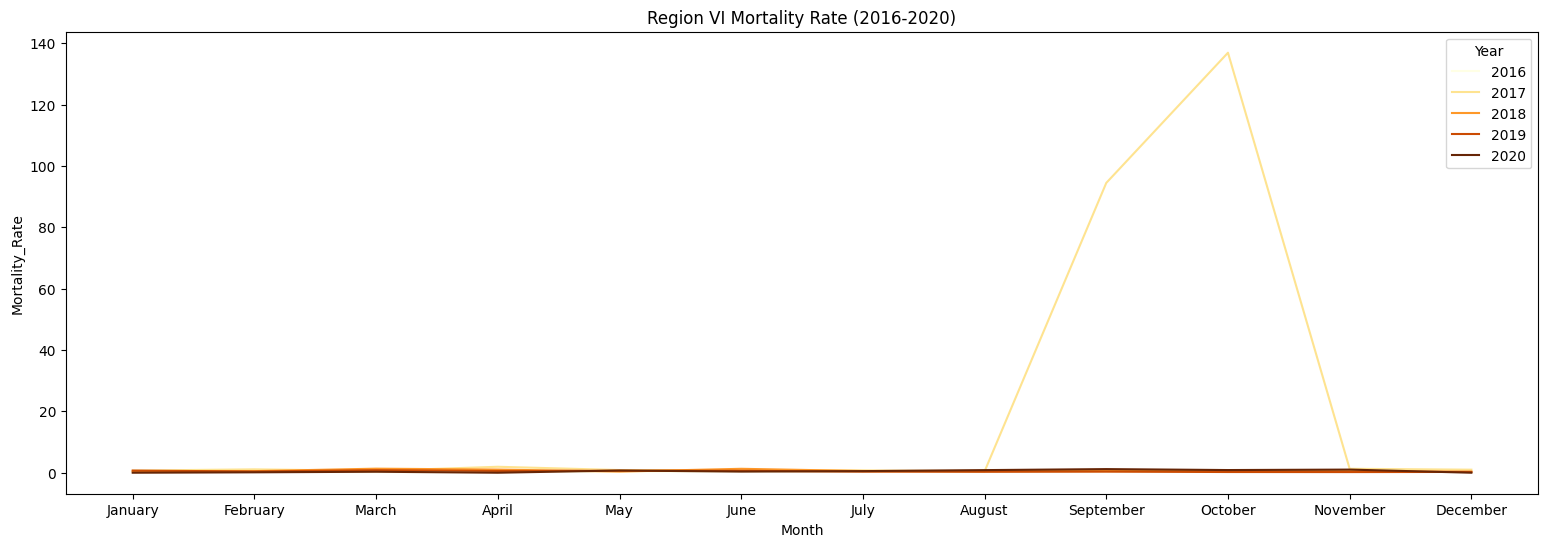

In [48]:
sns.lineplot(data=region6, y="Mortality_Rate", x="Month", hue="Year", palette = "YlOrBr")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region VI Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 21</h1>
<h3>Month with the highest Mortality Rate in Region VII</h3>
<h4>The Dengue mortality rate of 140.92 in October in Region VII is extraordinarily high, indicating a significant outbreak with potentially devastating consequences.</h4>

In [49]:
region7 = dengue[dengue["Region"] == "Region VII"]
region7.groupby(["Month"])["Mortality_Rate"].sum()

Month
January        3.15
February       2.70
March          3.68
April          4.95
May            4.99
June           4.52
July           3.44
August         2.71
September     21.16
October      140.92
November       4.04
December       2.78
Name: Mortality_Rate, dtype: float64

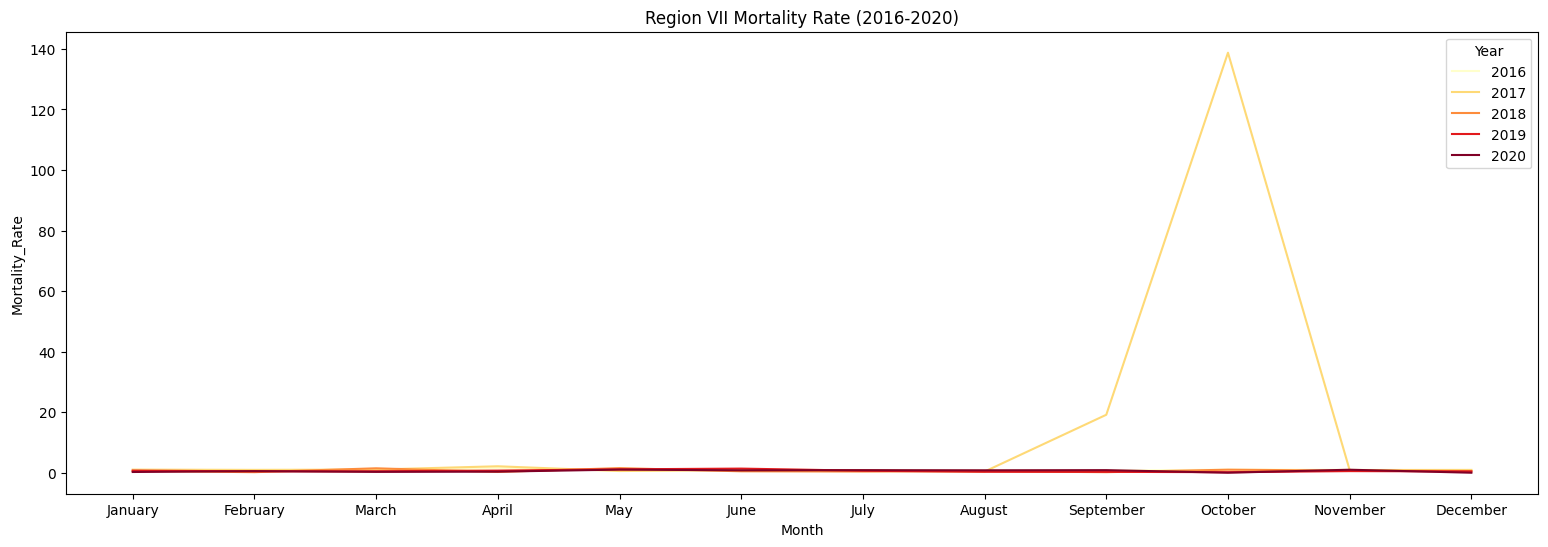

In [50]:
sns.lineplot(data=region7, y="Mortality_Rate", x="Month", hue="Year", palette = "YlOrRd")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region VII Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 22</h1>
<h3>Month with the highest Mortality Rate in Region VIII</h3>
<h4>The Dengue mortality rate of 164.23 in October in Region VIII represents an alarmingly high fatality rate and signals a severe public health challenge during this particular month. This unusually high rate requires urgent attention to understand the underlying causes and to implement preventive measures to reduce mortality in future outbreaks.</h4>

In [51]:
region8 = dengue[dengue["Region"] == "Region VIII"]
region8.groupby(["Month"])["Mortality_Rate"].sum()

Month
January        2.57
February       2.17
March          2.99
April          2.03
May            2.74
June           5.40
July           2.26
August         1.44
September     76.38
October      164.23
November       2.99
December       2.79
Name: Mortality_Rate, dtype: float64

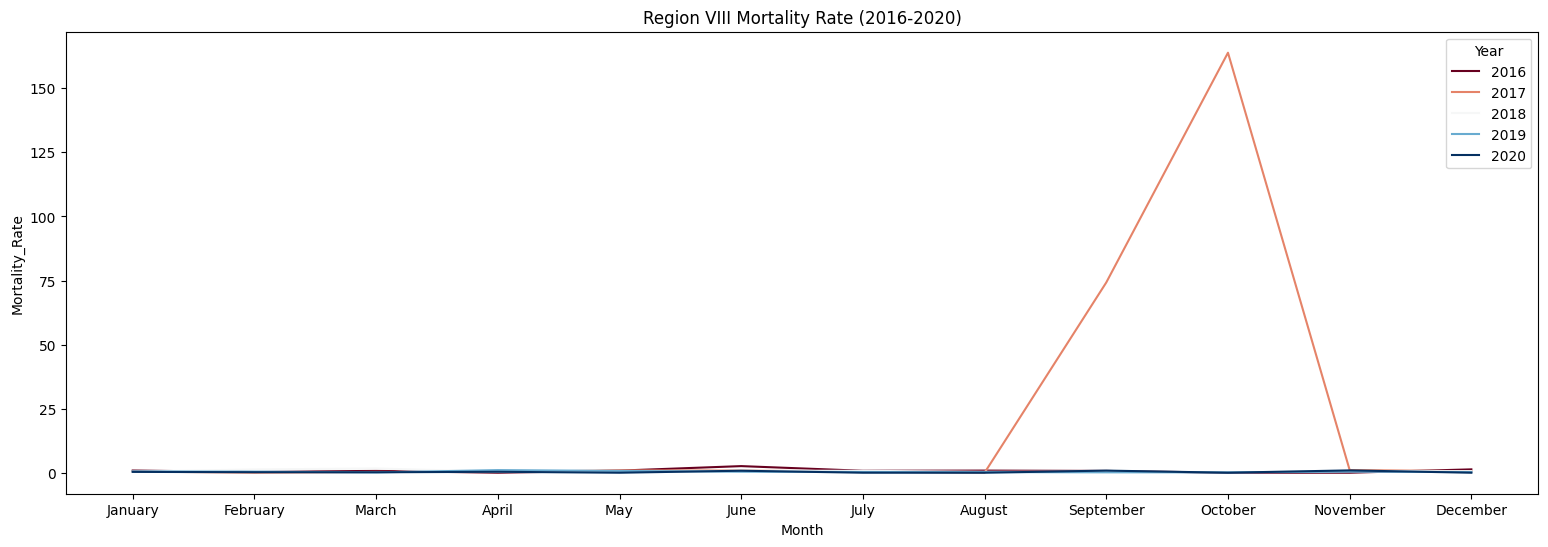

In [52]:
sns.lineplot(data=region8, y="Mortality_Rate", x="Month", hue="Year", palette = "RdBu")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region VIII Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 23</h1>
<h3>Month with the highest Mortality Rate in Region IX</h3>
<h4>The Dengue mortality rate of 165.18 in October in Region IX is notably high and signals a severe outbreak during this period. This alarming figure highlights the urgent need for more effective public health measures, preparedness, and immediate intervention to prevent further fatalities in future Dengue outbreaks.</h4>

In [53]:
region9 = dengue[dengue["Region"] == "Region IX"]
region9.groupby(["Month"])["Mortality_Rate"].sum()

Month
January        3.52
February       2.56
March          2.79
April          3.25
May            2.75
June           3.16
July           1.90
August         2.74
September    104.98
October      165.18
November       3.94
December       4.16
Name: Mortality_Rate, dtype: float64

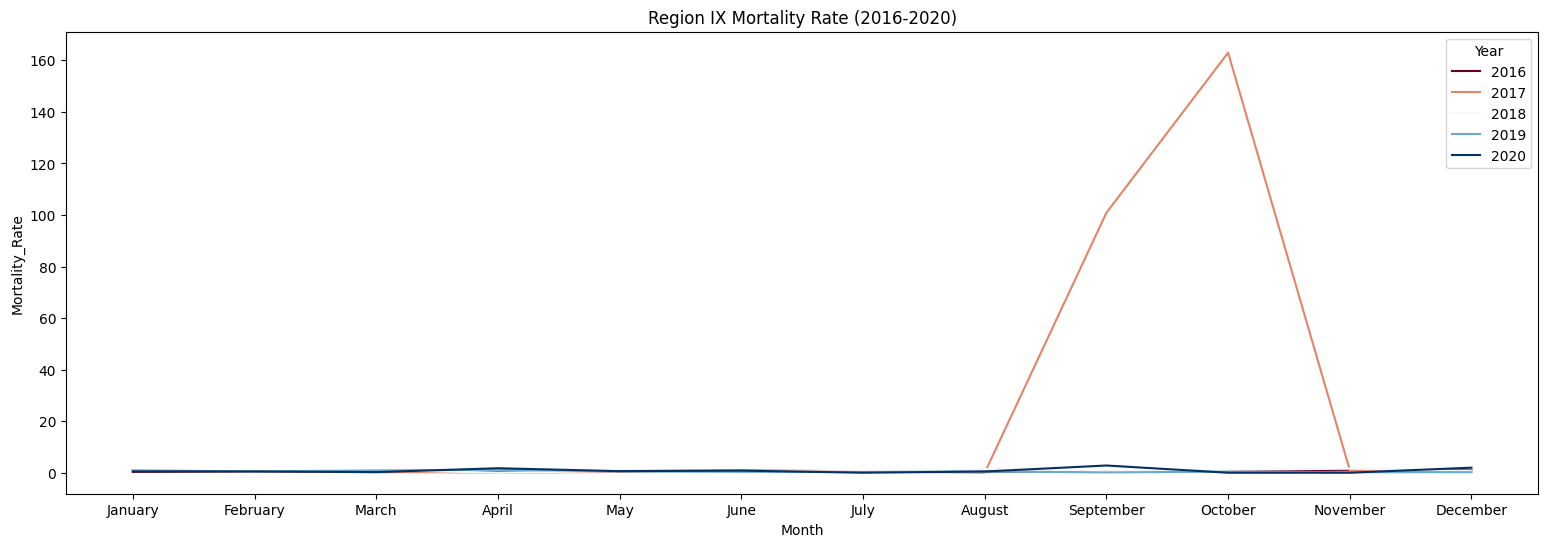

In [54]:
sns.lineplot(data=region9, y="Mortality_Rate", x="Month", hue="Year", palette = "RdBu")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region IX Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 24</h1>
<h3>Month with the highest Mortality Rate in Region X</h3>
<h4>The Dengue mortality rate of 127.70 in October in Region X is significantly high, indicating a substantial outbreak of severe Dengue cases during this month. This underscores the urgent need for enhanced vector control measures, healthcare system preparedness, and public health interventions to mitigate the impact of Dengue outbreaks in the region.</h4>

In [55]:
region10 = dengue[dengue["Region"] == "Region X"]
region10.groupby(["Month"])["Mortality_Rate"].sum()

Month
January        2.20
February       1.81
March          3.86
April          3.31
May            2.01
June           1.53
July           2.50
August         2.09
September     85.58
October      127.70
November       2.26
December       1.16
Name: Mortality_Rate, dtype: float64

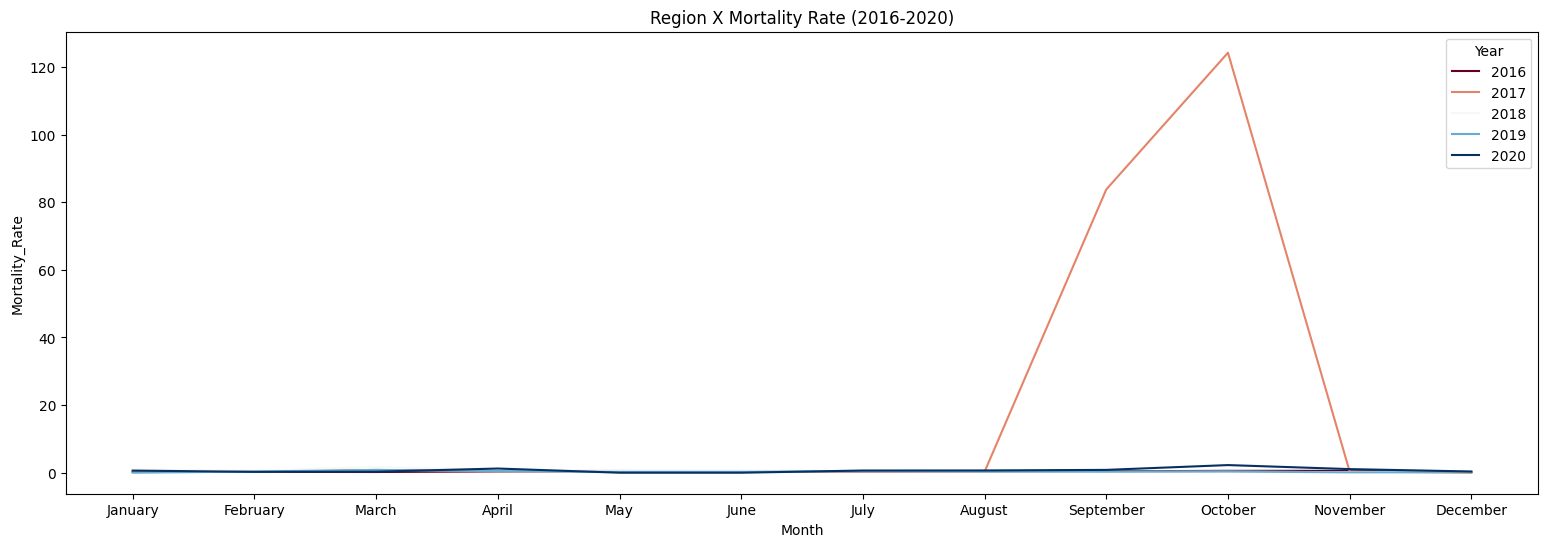

In [56]:
sns.lineplot(data=region10, y="Mortality_Rate", x="Month", hue="Year", palette = "RdBu")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region X Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 25</h1>
<h3>Month with the highest Mortality Rate in Region XI</h3>
<h4>The Dengue mortality rate of 126.78 in October in Region XI is notably high, suggesting a significant number of severe Dengue cases that contributed to the increase in fatalities.</h4>

In [57]:
region11 = dengue[dengue["Region"] == "Region XI"]
region11.groupby(["Month"])["Mortality_Rate"].sum()

Month
January        2.85
February       2.54
March          3.18
April          1.46
May            1.67
June           3.56
July           4.42
August         4.17
September     74.84
October      126.78
November       1.79
December       1.75
Name: Mortality_Rate, dtype: float64

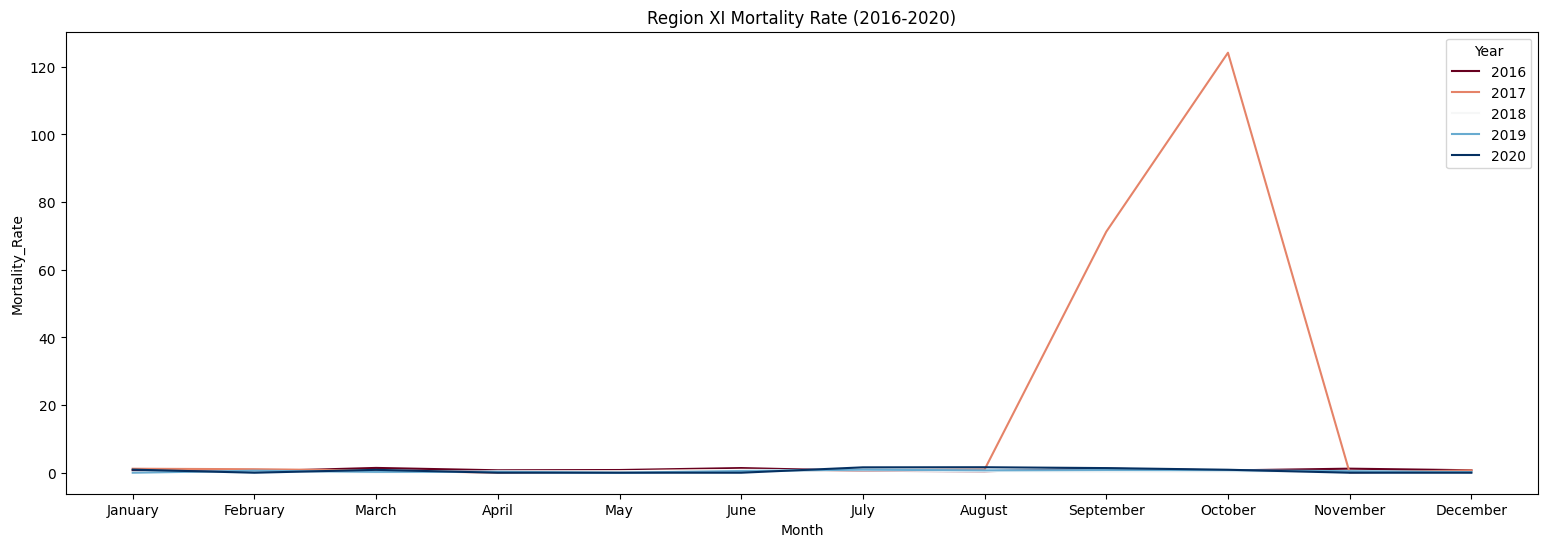

In [58]:
sns.lineplot(data=region11, y="Mortality_Rate", x="Month", hue="Year", palette = "RdBu")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region XI Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 26</h1>
<h3>Month with the highest Mortality Rate in Region XII</h3>
<h4>The Dengue mortality rate of 243.61 in October in Region XII is alarmingly high, indicating a severe outbreak of Dengue during this period. This number reflects a significant public health crisis, as it shows that the region experienced a major increase in Dengue-related fatalities, likely due to a surge in severe Dengue cases that overwhelmed healthcare resources.</h4>

In [59]:
region12 = dengue[dengue["Region"] == "Region XII"]
region12.groupby(["Month"])["Mortality_Rate"].sum()

Month
January        2.64
February       1.59
March          2.33
April          1.65
May            2.97
June           3.01
July           2.10
August         1.95
September    184.38
October      243.61
November      24.07
December       3.21
Name: Mortality_Rate, dtype: float64

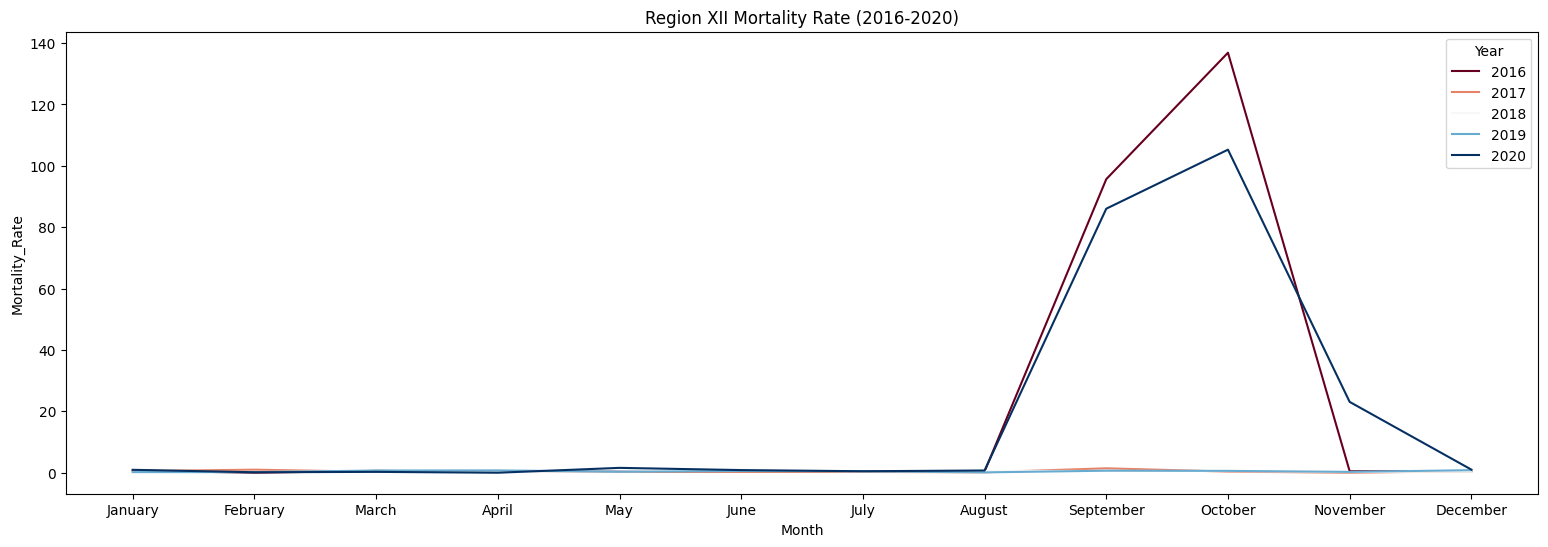

In [60]:
sns.lineplot(data=region12, y="Mortality_Rate", x="Month", hue="Year", palette = "RdBu")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region XII Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 27</h1>
<h3>Month with the highest Mortality Rate in Region XIII</h3>
<h4>The Dengue mortality rate of 314.73 in October in Region XIII is strikingly high, indicating a very severe Dengue outbreak during this period. The high rate suggests that Dengue-related fatalities in this region during October were significantly higher than average, pointing to a serious public health concern.</h4>

In [61]:
region13 = dengue[dengue["Region"] == "Region XIII"]
region13.groupby(["Month"])["Mortality_Rate"].sum()

Month
January        2.06
February       1.61
March          1.36
April          2.47
May            0.80
June           0.33
July           2.29
August         3.46
September    204.56
October      314.73
November      26.46
December       2.00
Name: Mortality_Rate, dtype: float64

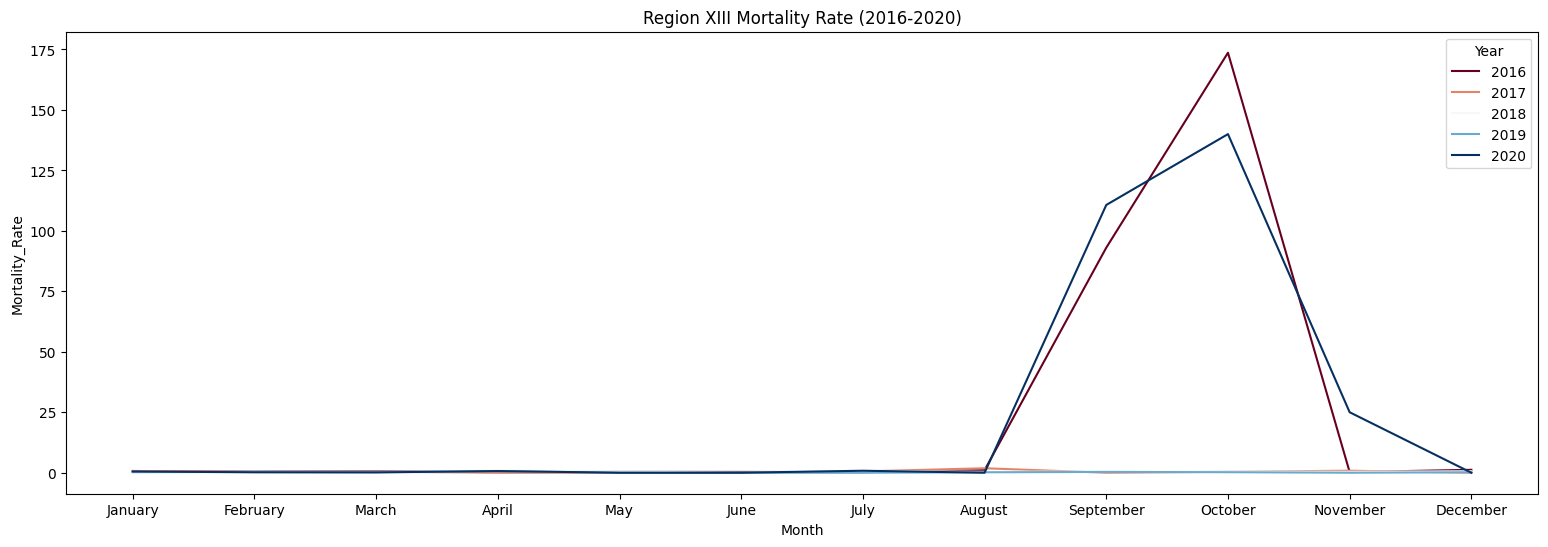

In [62]:
sns.lineplot(data=region13, y="Mortality_Rate", x="Month", hue="Year", palette = "RdBu")
plt.gcf().set_size_inches(19, 6)
plt.title(f"Region XIII Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 28</h1>
<h3>Month with the highest Mortality Rate in CAR</h3>
<h4>The Dengue mortality rate of 192.32 in October in CAR (Cordillera Administrative Region) is a significant concern, indicating a severe Dengue outbreak in this period. This high mortality rate suggests that Dengue-related fatalities were notably high, reflecting a serious public health challenge./h4>

In [63]:
car = dengue[dengue["Region"] == "CAR"]
car.groupby(["Month"])["Mortality_Rate"].sum()

Month
January        1.56
February       2.31
March          0.00
April          5.70
May            0.53
June           0.61
July           0.96
August         1.00
September    169.52
October      192.32
November      40.77
December       3.10
Name: Mortality_Rate, dtype: float64

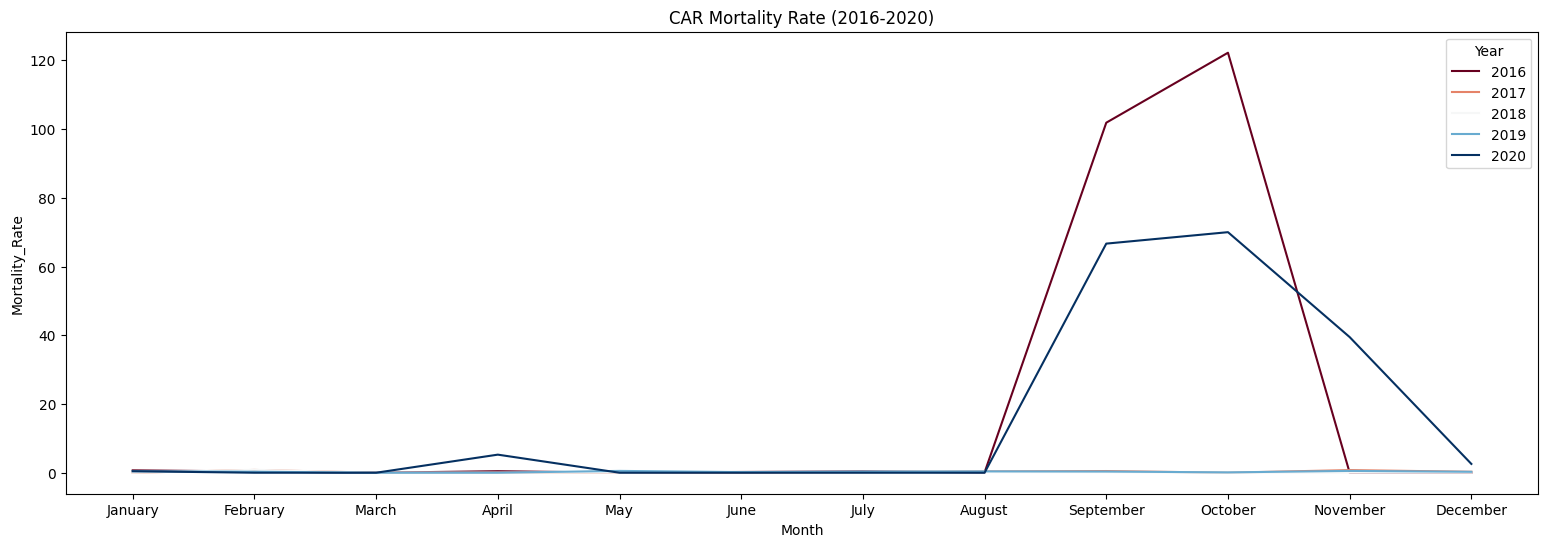

In [64]:
sns.lineplot(data=car, y="Mortality_Rate", x="Month", hue="Year", palette = "RdBu")
plt.gcf().set_size_inches(19, 6)
plt.title(f"CAR Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 29</h1>
<h3>Month with the highest Mortality Rate in BARMM</h3>
<h4>The Dengue mortality rate of 205.83 in October in the BARMM (Bangsamoro Autonomous Region in Muslim Mindanao) indicates a significant Dengue outbreak, leading to a notably high number of fatalities in this region. The mortality rate suggests that Dengue-related deaths were much higher than usual, pointing to a serious public health challenge during the rainy season.</h4>

In [65]:
barmm = dengue[dengue["Region"] == "BARMM"]
barmm.groupby(["Month"])["Mortality_Rate"].sum()

Month
January        4.40
February       6.79
March          7.03
April          6.99
May            3.73
June           5.35
July           1.40
August         2.14
September    137.96
October      205.83
November       9.56
December       3.23
Name: Mortality_Rate, dtype: float64

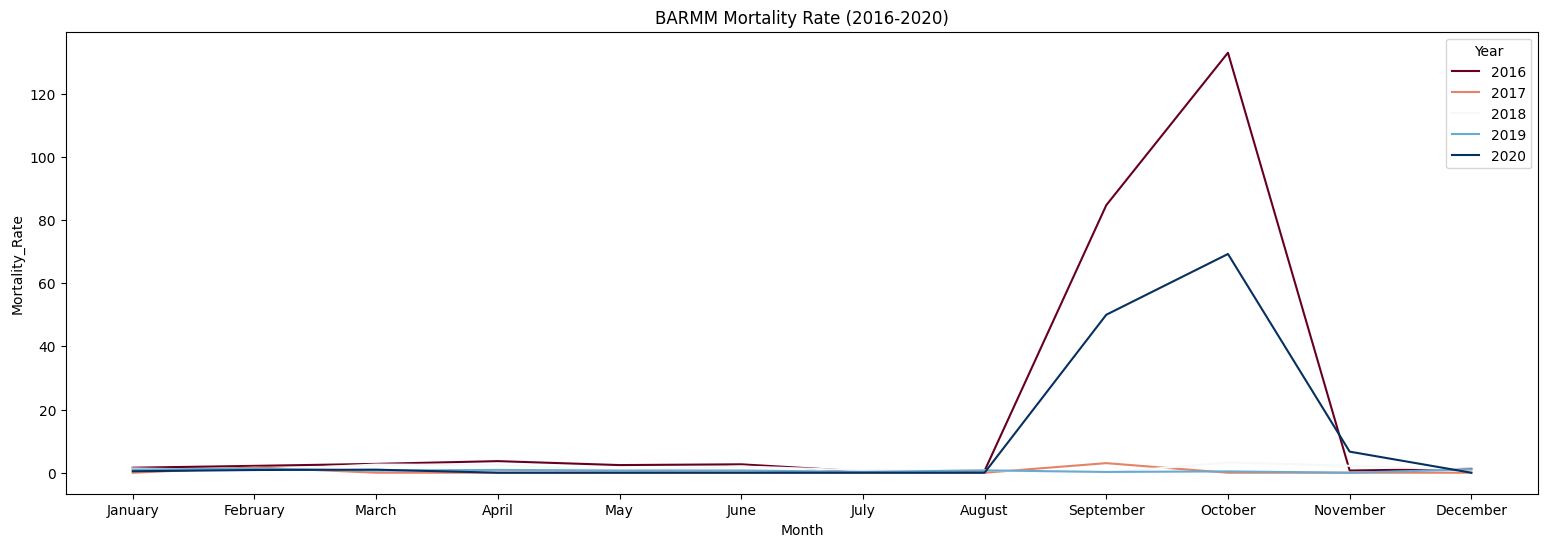

In [66]:
sns.lineplot(data=barmm, y="Mortality_Rate", x="Month", hue="Year", palette = "RdBu")
plt.gcf().set_size_inches(19, 6)
plt.title(f"BARMM Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 30</h1>
<h3>Month with the highest Mortality Rate in NCR</h3>
<h4>The Dengue mortality rate of 304.96 in October in NCR (National Capital Region) highlights an extremely high mortality rate, signaling a severe Dengue outbreak that led to significant fatalities in the region during this period. This alarming mortality rate points to a critical public health situation, with October being a particularly dangerous month for Dengue transmission.</h4>

In [67]:
ncr = dengue[dengue["Region"] == "NCR"]
ncr.groupby(["Month"])["Mortality_Rate"].sum()

Month
January        2.19
February       1.97
March          1.85
April          2.65
May            1.75
June           1.84
July           2.63
August         2.63
September    204.53
October      304.96
November      34.74
December       3.02
Name: Mortality_Rate, dtype: float64

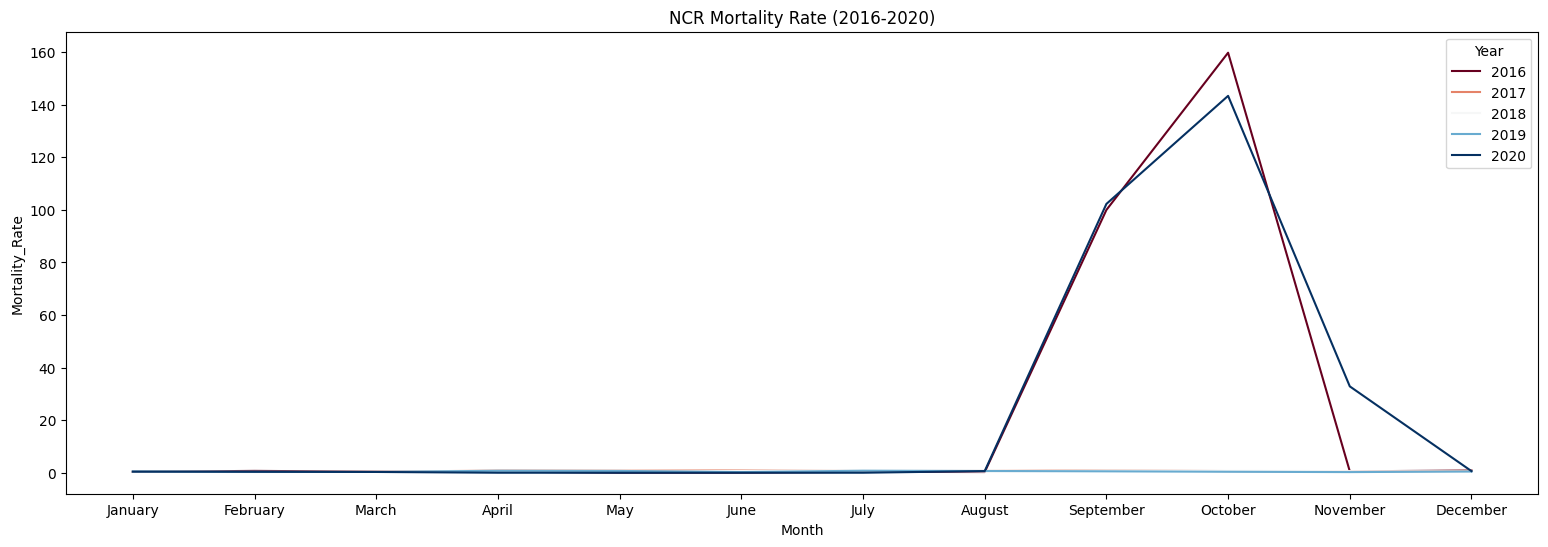

In [68]:
sns.lineplot(data=ncr, y="Mortality_Rate", x="Month", hue="Year", palette = "RdBu")
plt.gcf().set_size_inches(19, 6)
plt.title(f"NCR Mortality Rate (2016-2020)")
plt.show()

<h1>Insight no. 31</h1>
<h2>Dengue Deaths in Region 4A</h2>

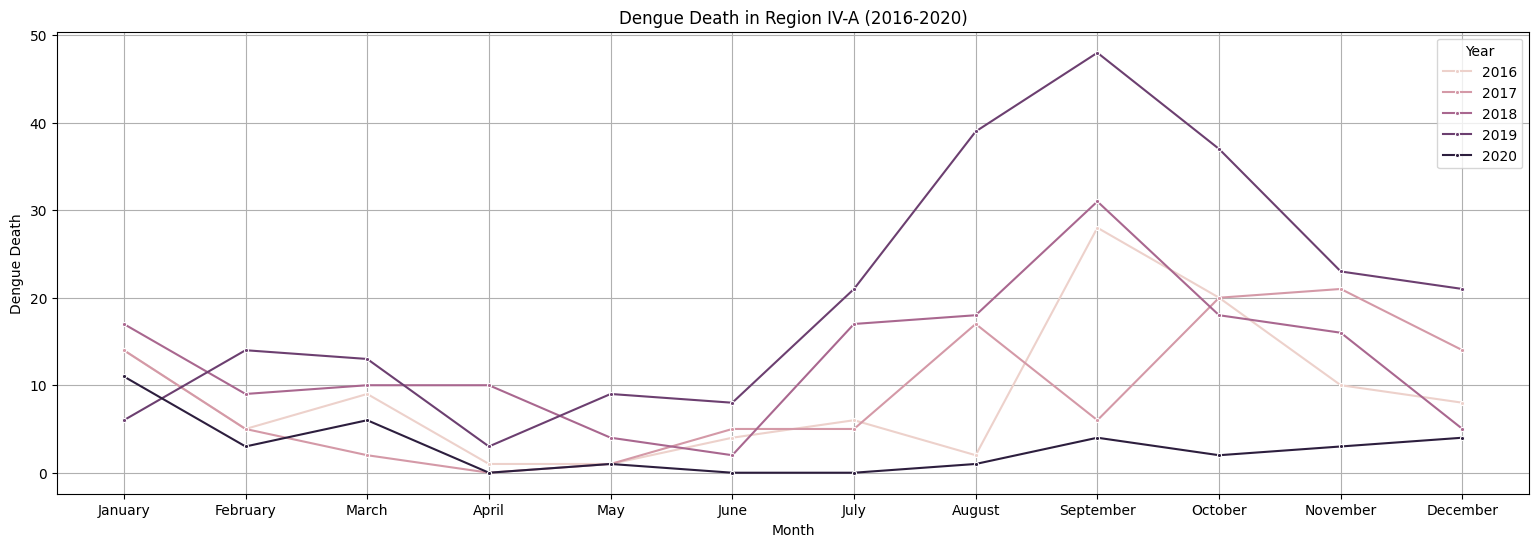

In [69]:
sns.lineplot(data=region4A, y="Dengue_Deaths", x="Month", marker = ".", hue="Year")
plt.gcf().set_size_inches(19, 6)
plt.title("Dengue Death in Region IV-A (2016-2020)")
plt.ylabel("Dengue Death")
plt.xlabel("Month")
plt.xticks(range(0,12), month_order)
plt.grid(True)
plt.show()

<h1>Insight no. 32</h1>
<h2>Dengue Cases in Region 4A</h2>

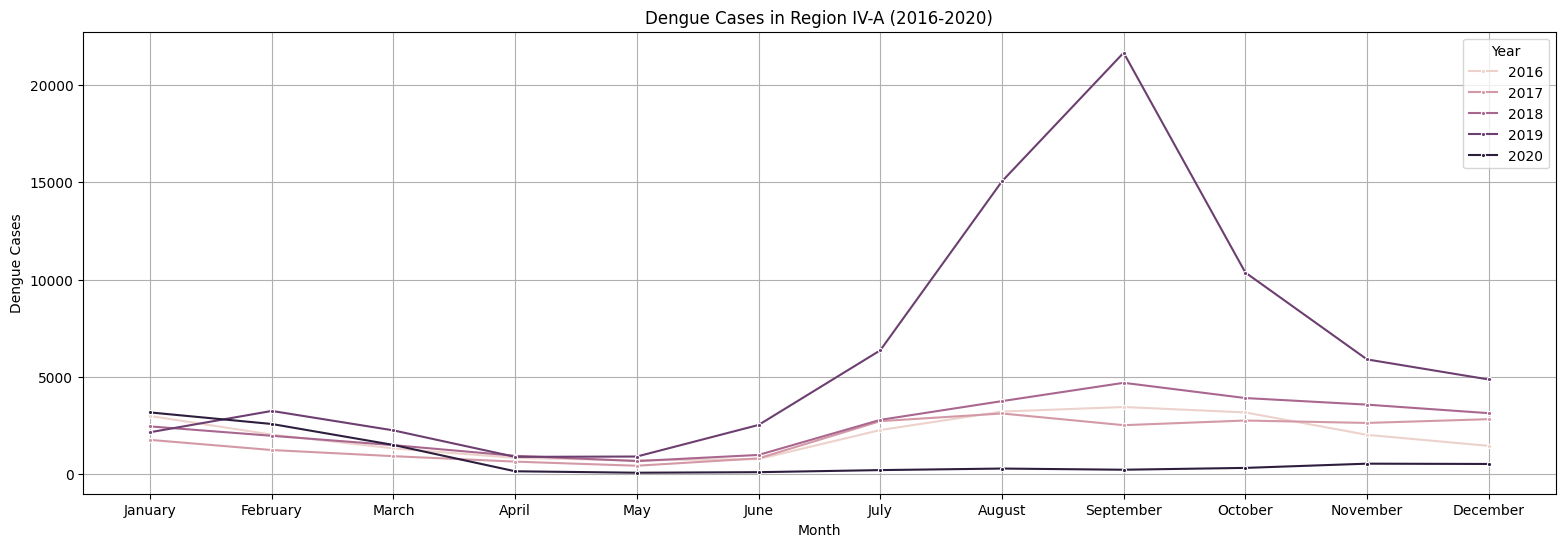

In [70]:
sns.lineplot(data=region4A, y="Dengue_Cases", x="Month", marker = ".", hue="Year")
plt.gcf().set_size_inches(19, 6)
plt.title("Dengue Cases in Region IV-A (2016-2020)")
plt.ylabel("Dengue Cases")
plt.xlabel("Month")
plt.xticks(range(0,12), month_order)
plt.grid(True)
plt.show()

<h1>Insight no. 33</h1>
<h2>Region with record of the highest Dengue Deaths over 5 years (2016-2020)</h2>

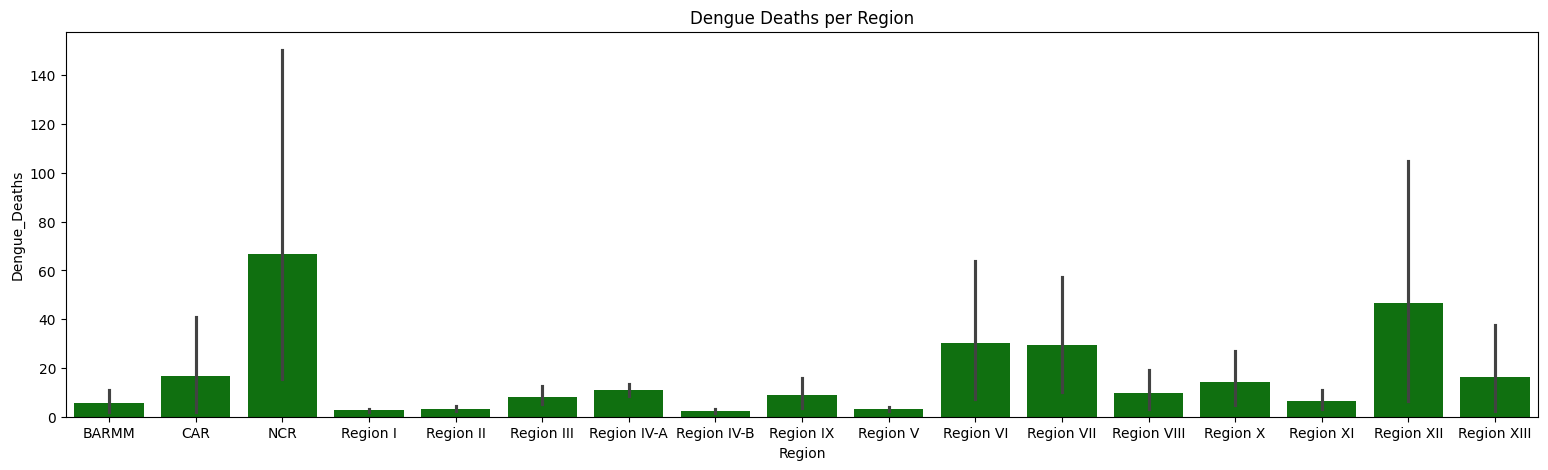

In [89]:
sns.barplot(data=dengue, x="Region", y="Dengue_Deaths", color="green")
plt.gcf().set_size_inches(19, 5) 
plt.title("Dengue Deaths per Region")
plt.show()

<h1>Insight no. 34</h1>
<h2>Region with record of the highest Dengue Case over 5 years (2016-2020)</h2>

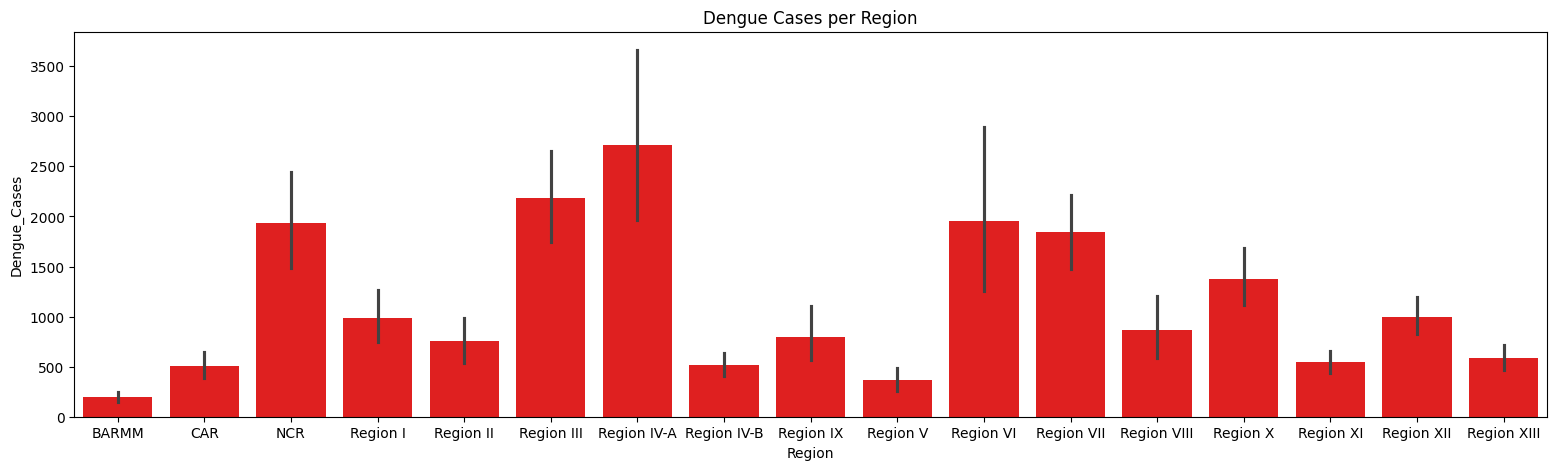

In [88]:
sns.barplot(data=dengue, x="Region", y="Dengue_Cases", color="red")
plt.gcf().set_size_inches(19, 5) 
plt.title("Dengue Cases per Region")
plt.show()

<h1>Insight no. 35</h1>
<h2>Region with record of the highest Mortality Rate over 5 years (2016-2020)</h2>

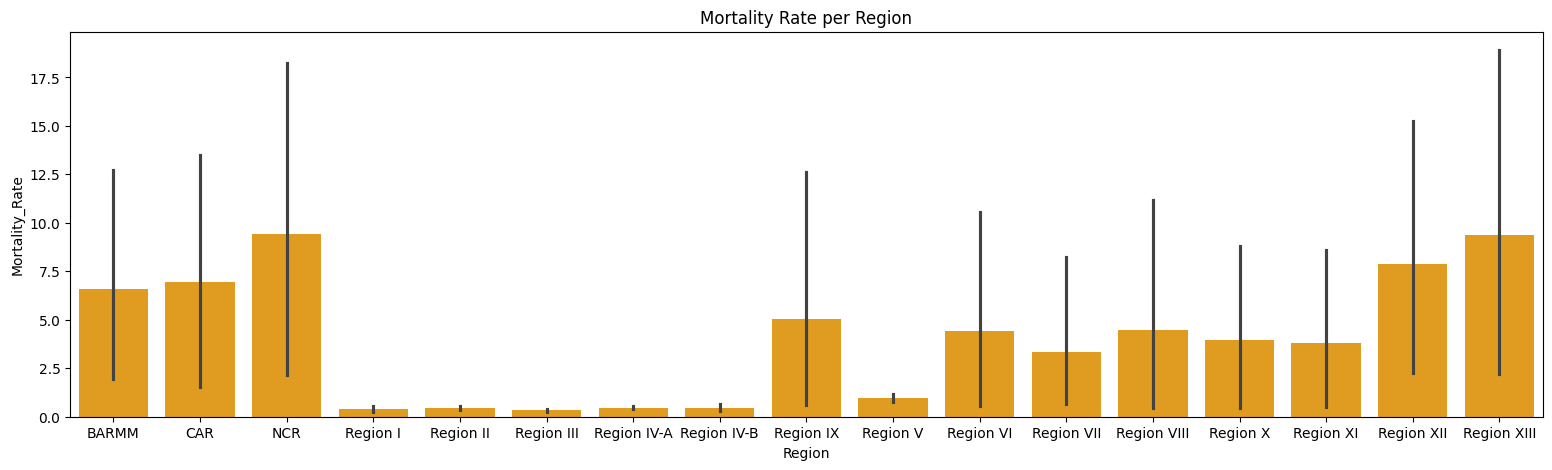

In [87]:
sns.barplot(data=dengue, x="Region", y="Mortality_Rate", color="orange")
plt.gcf().set_size_inches(19, 5) 
plt.title("Mortality Rate per Region")
plt.show()

<h1>Visualization of Dengue Deaths in All Regions (2016-2020)</h1>

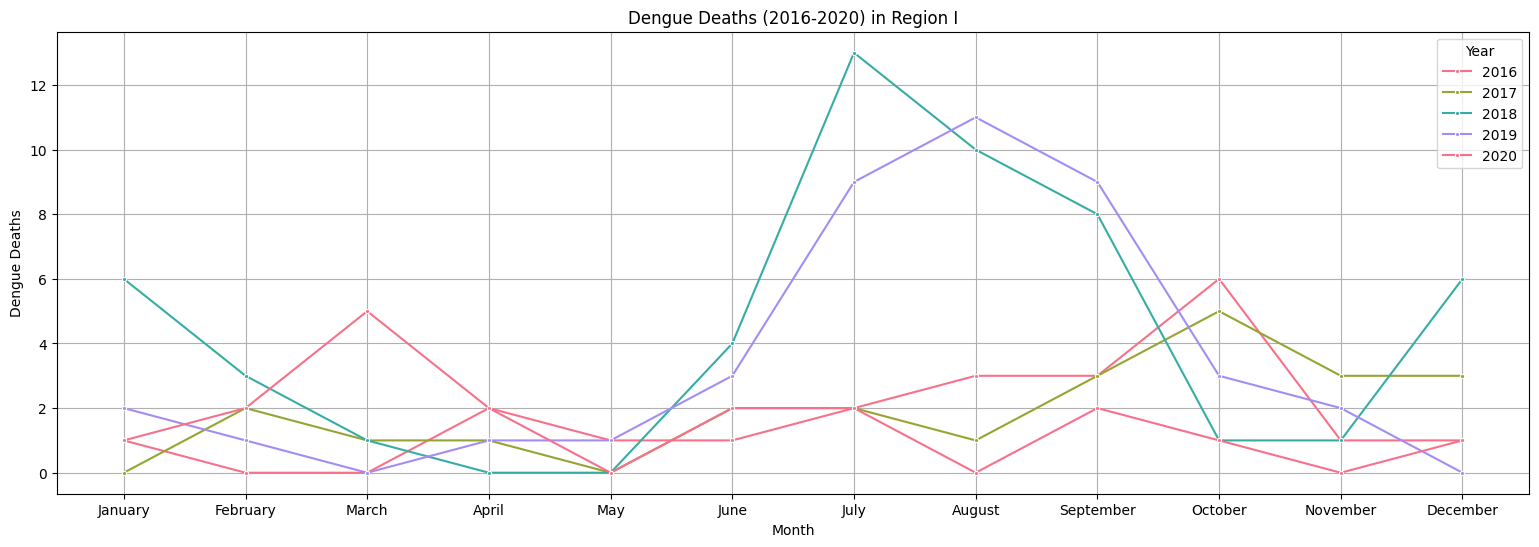

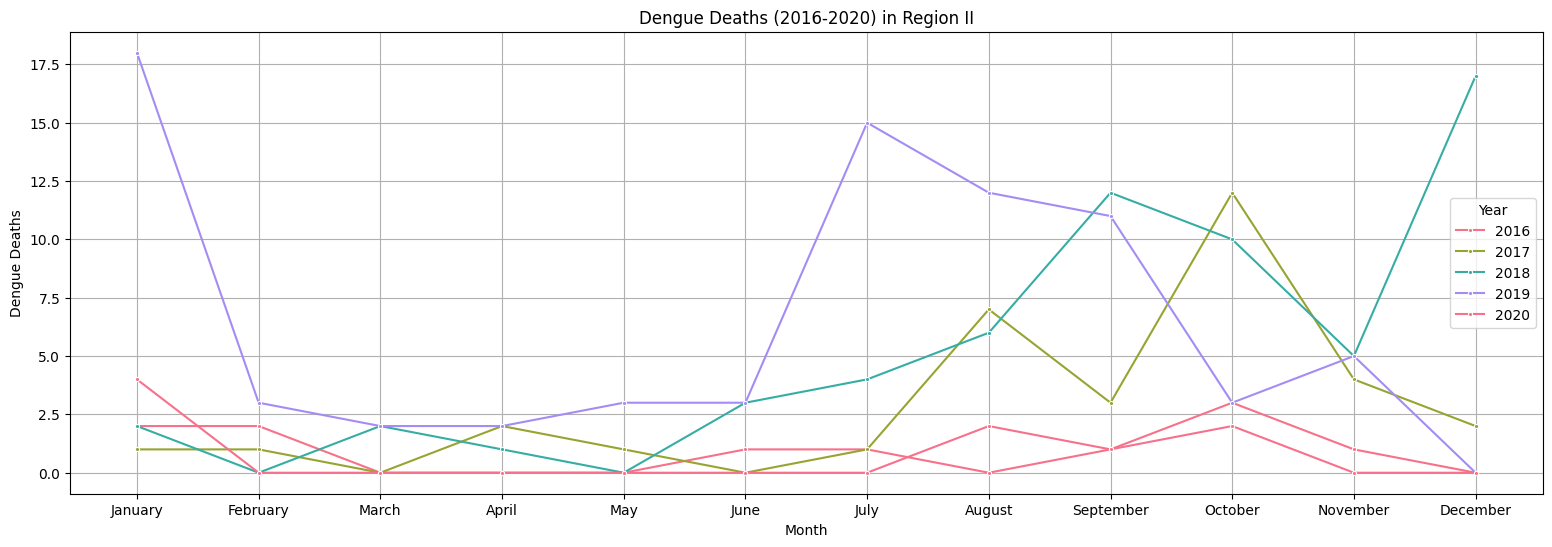

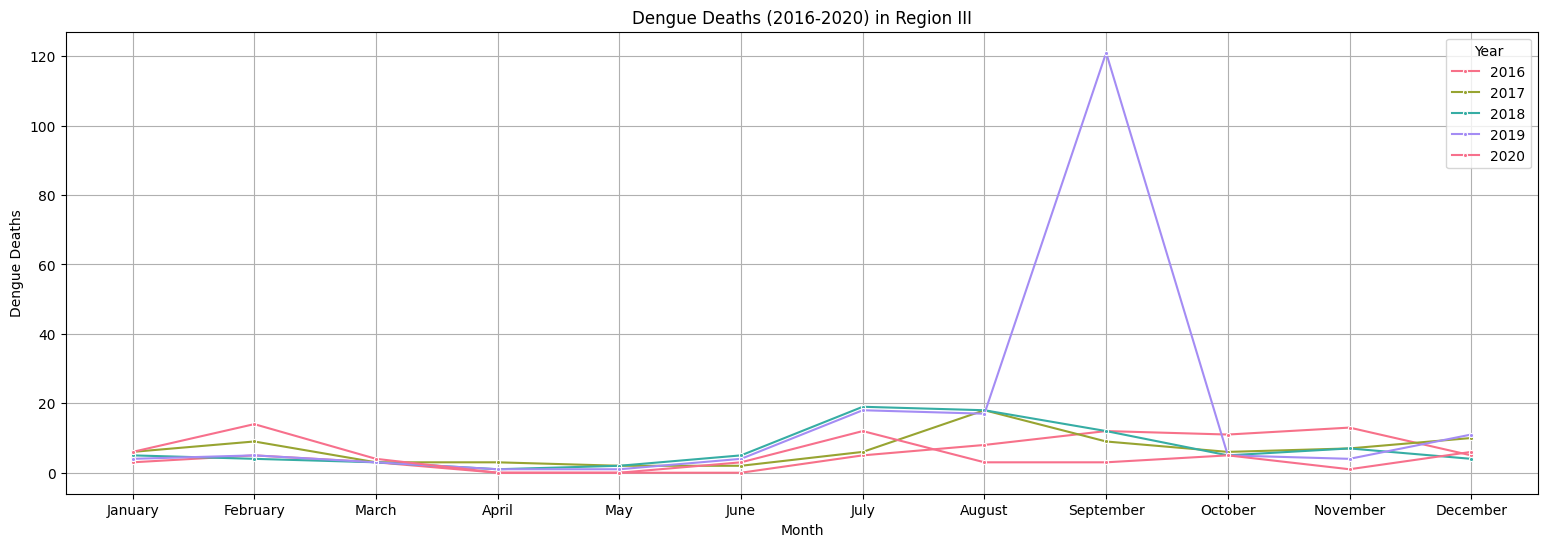

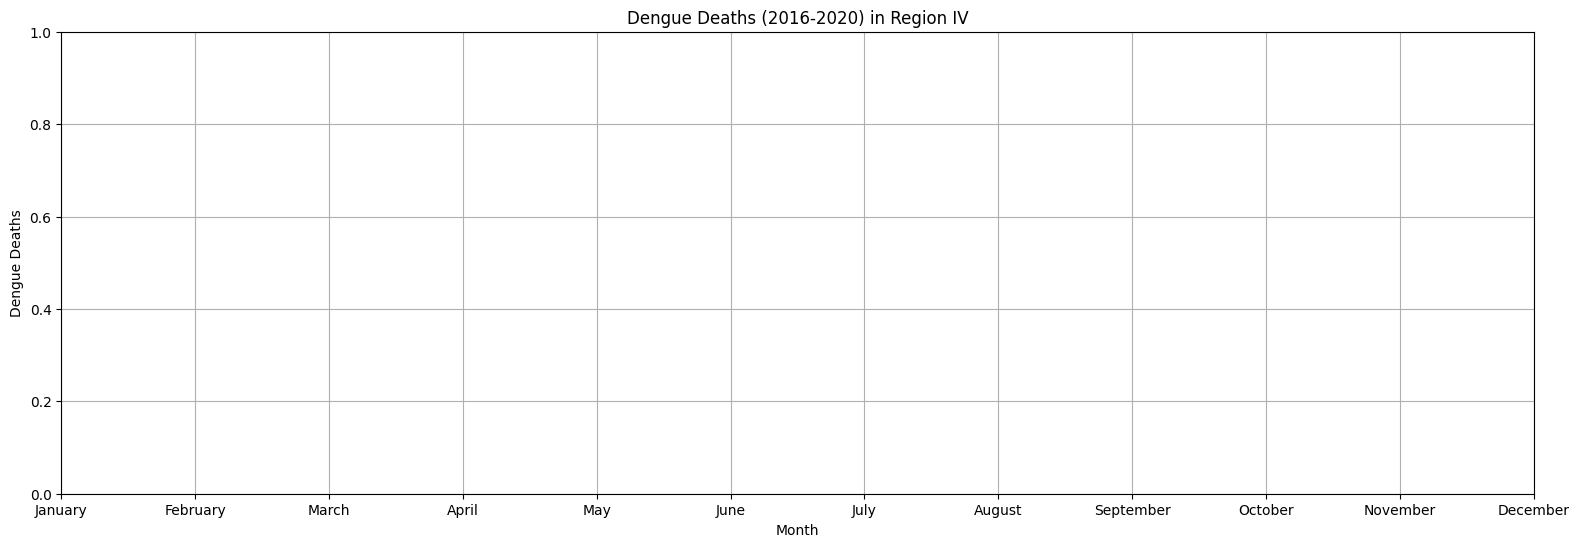

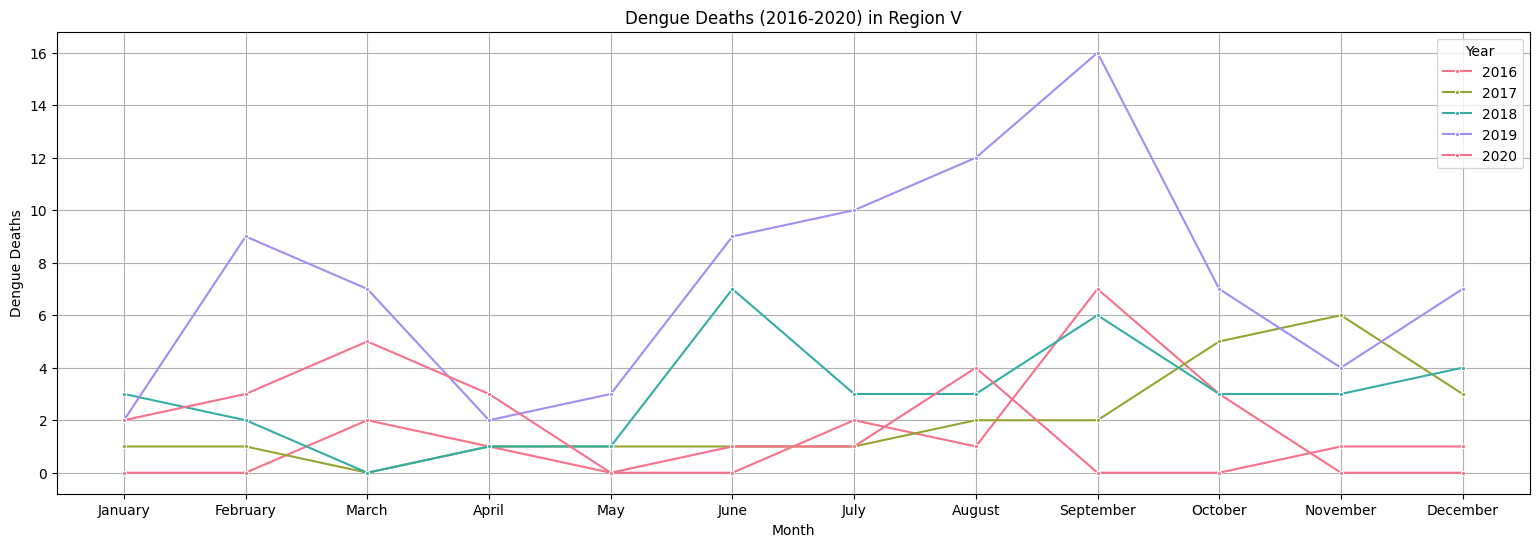

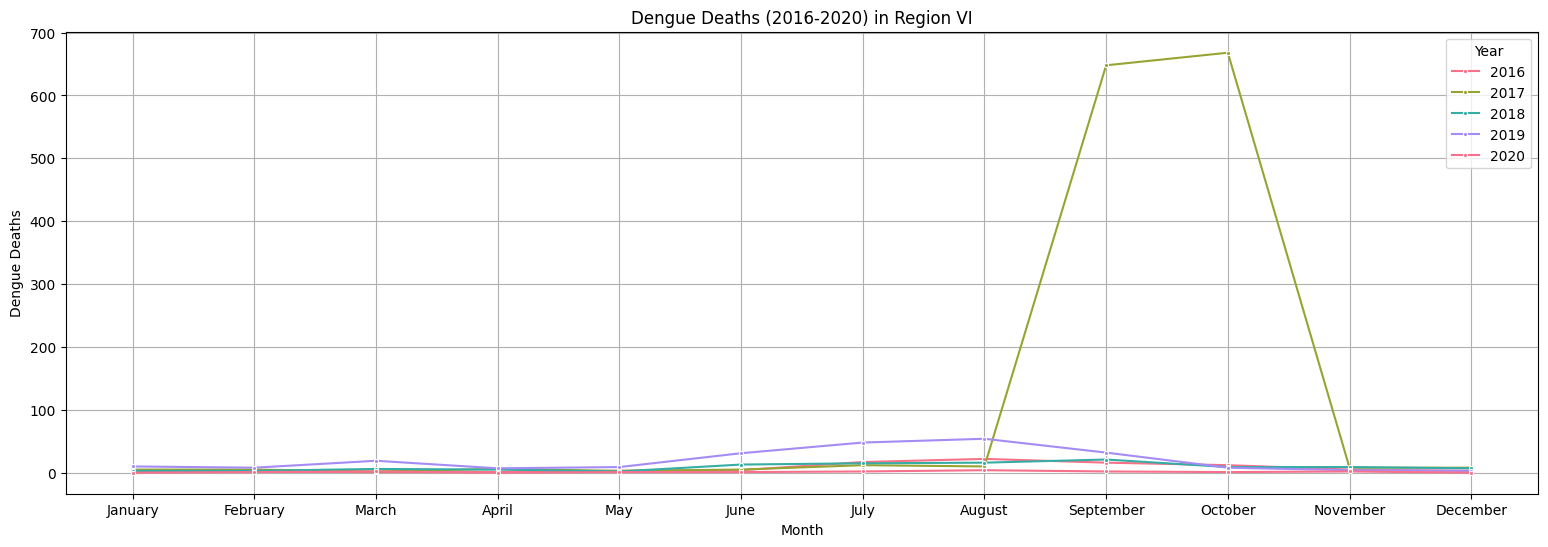

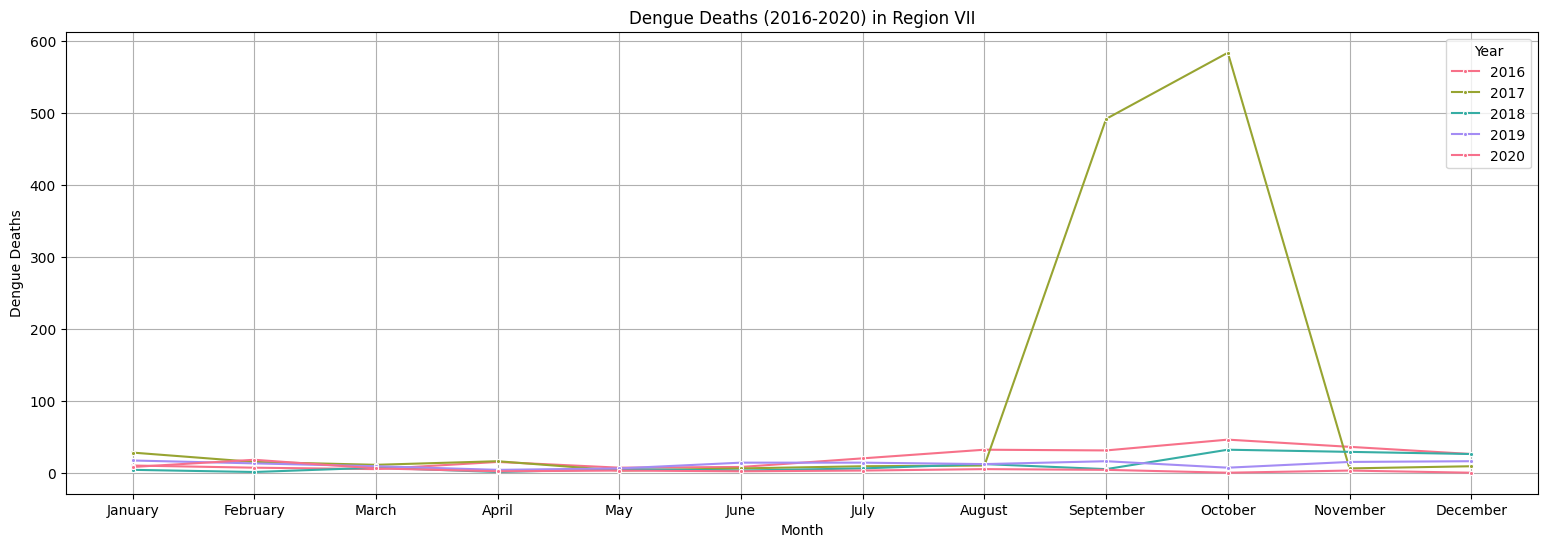

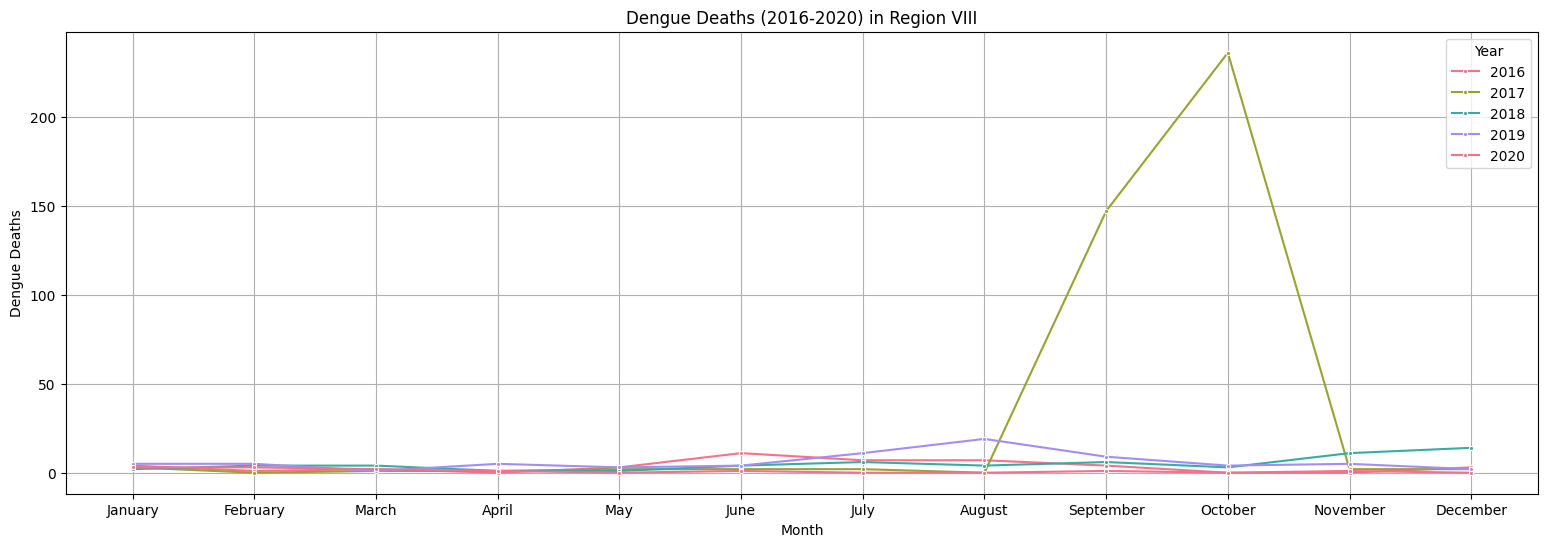

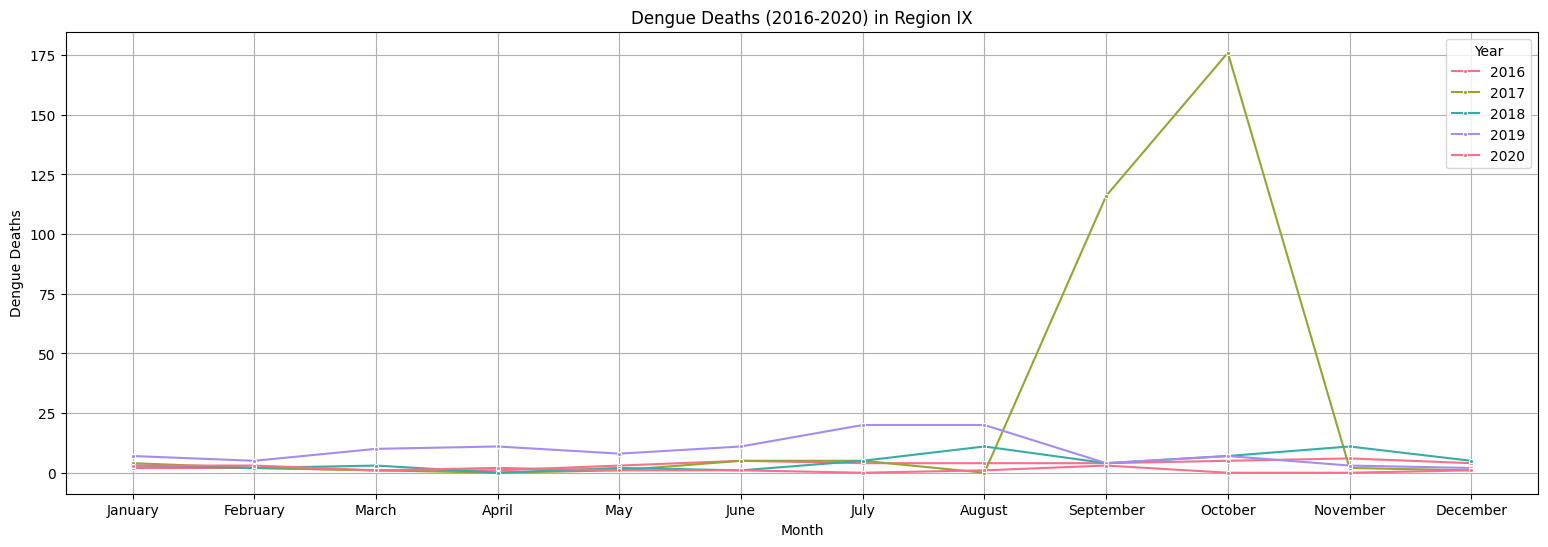

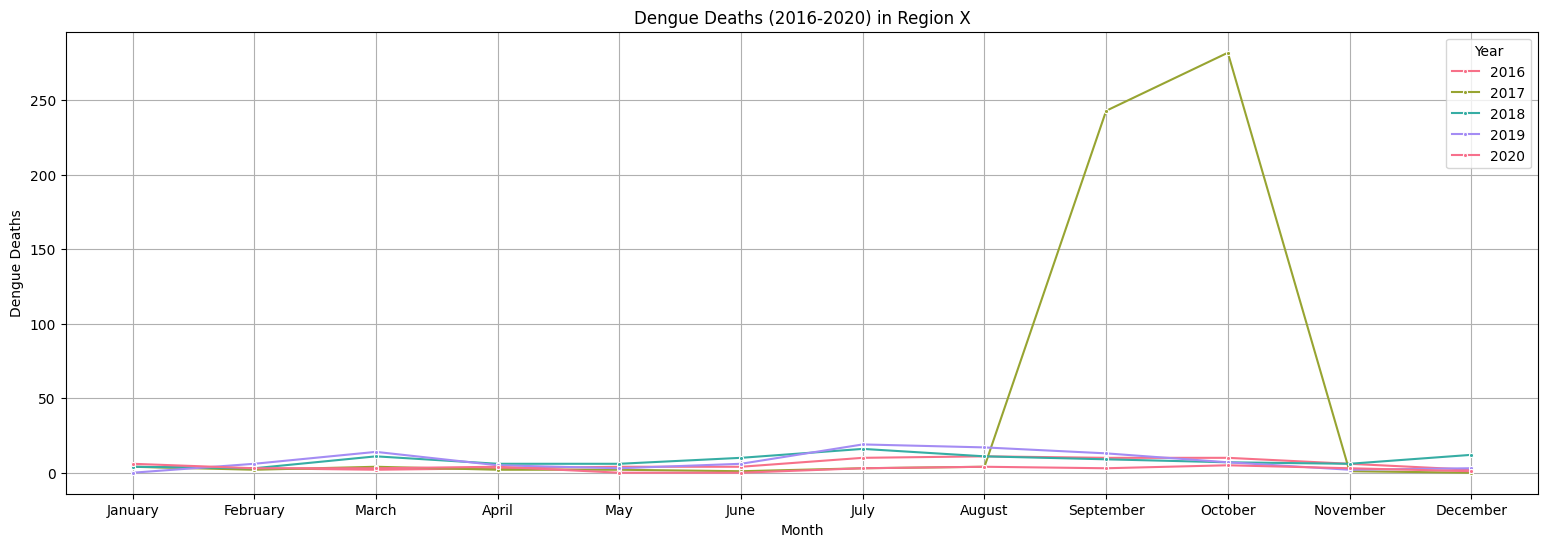

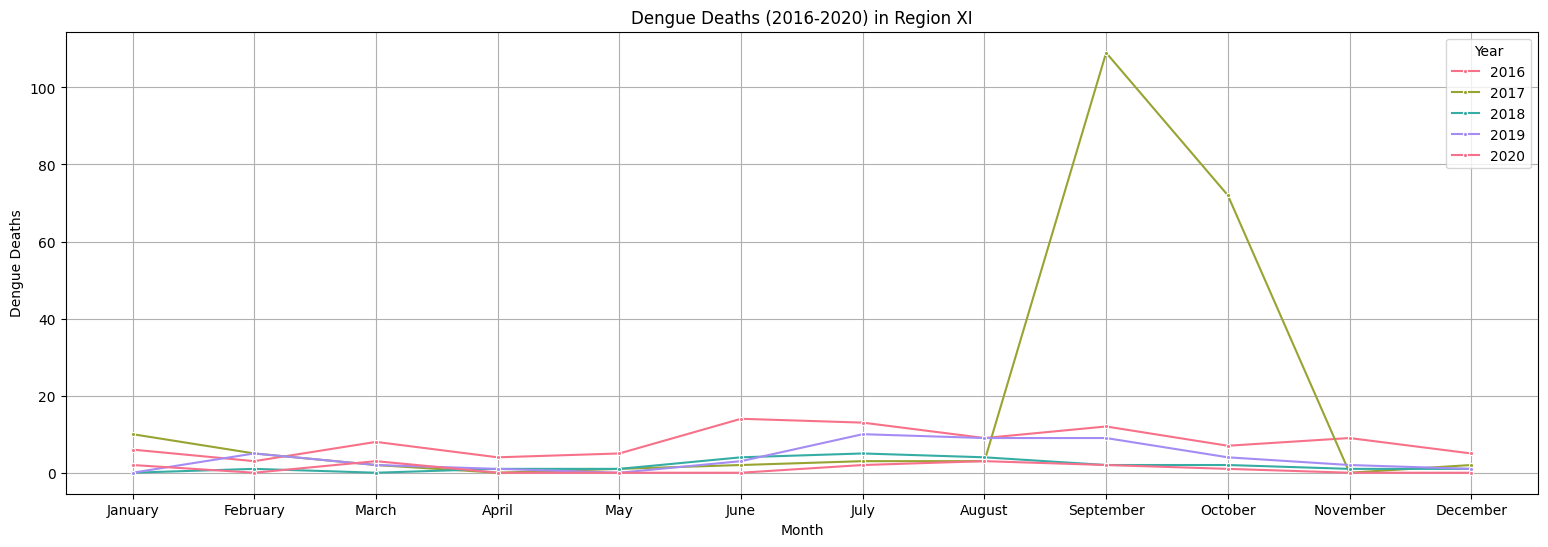

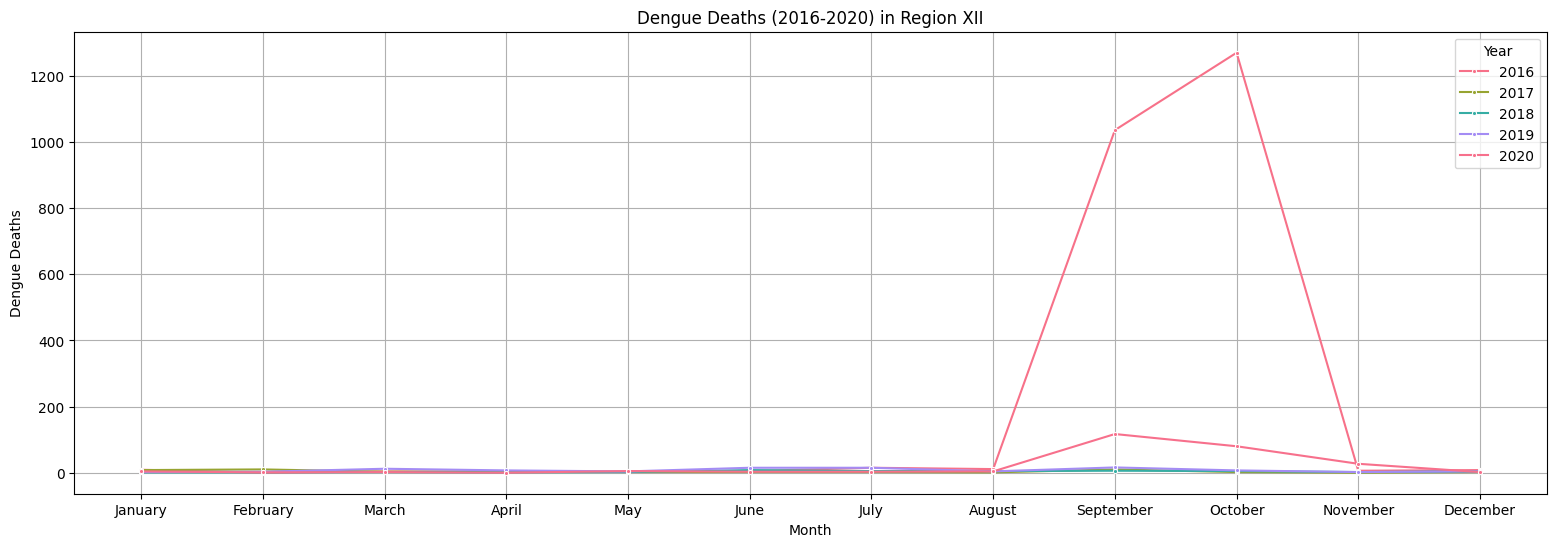

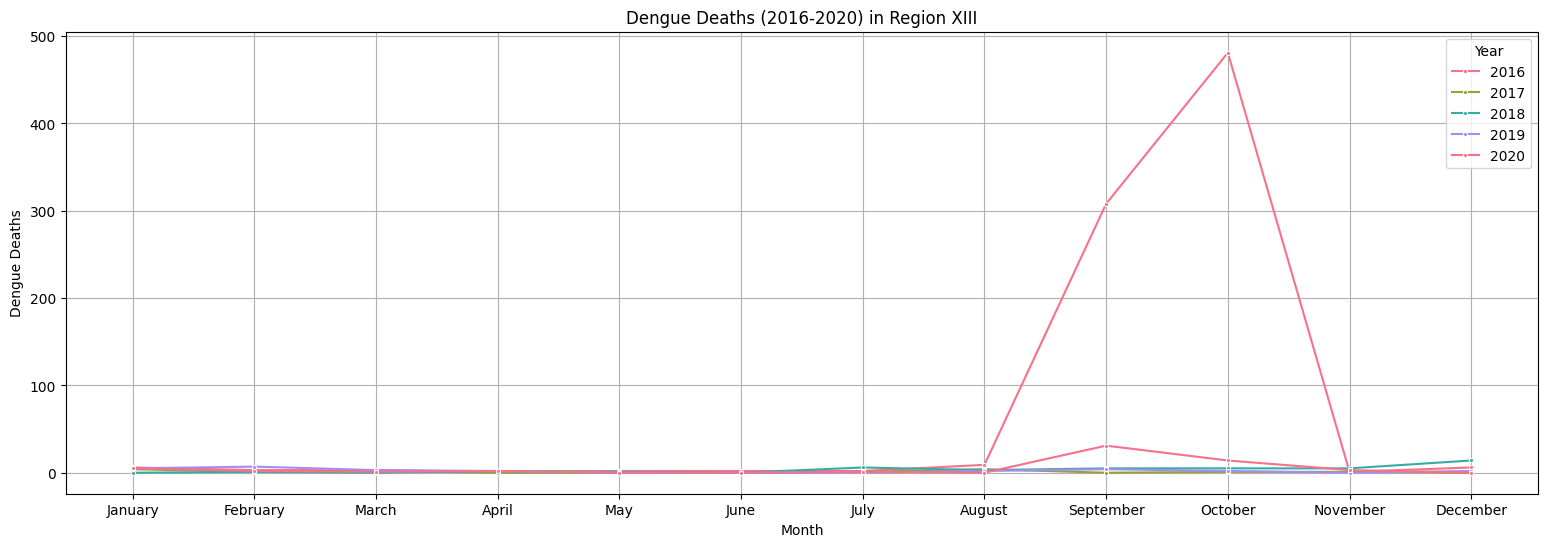

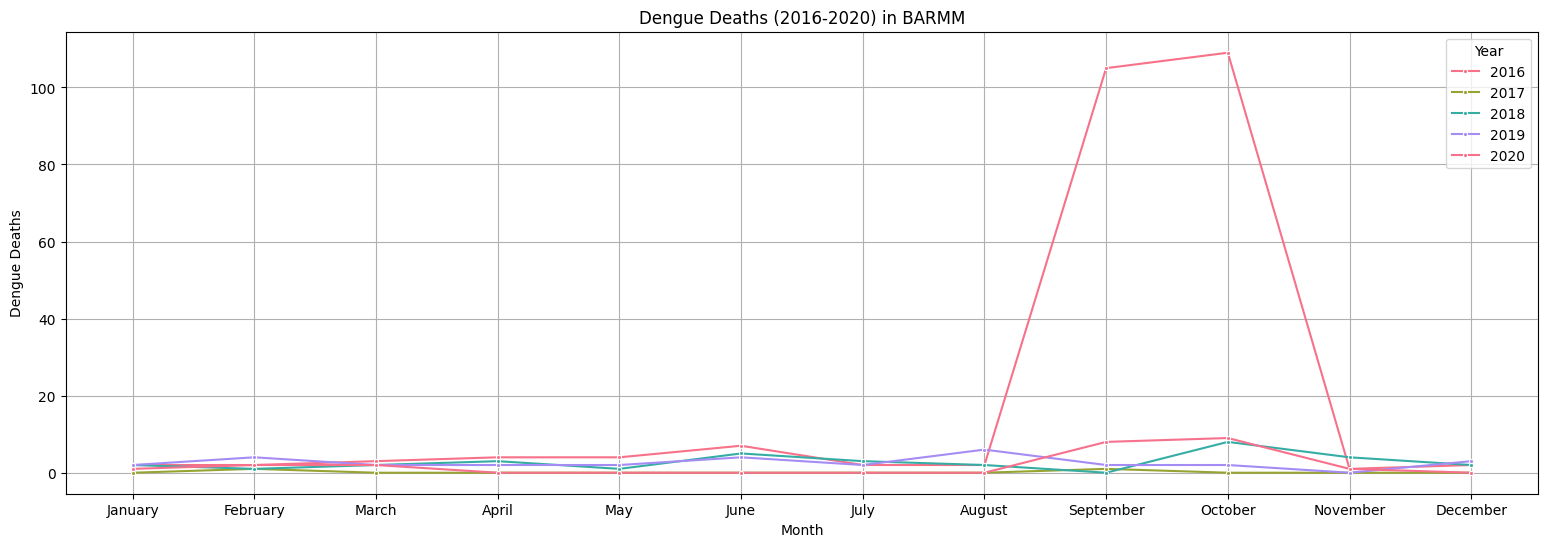

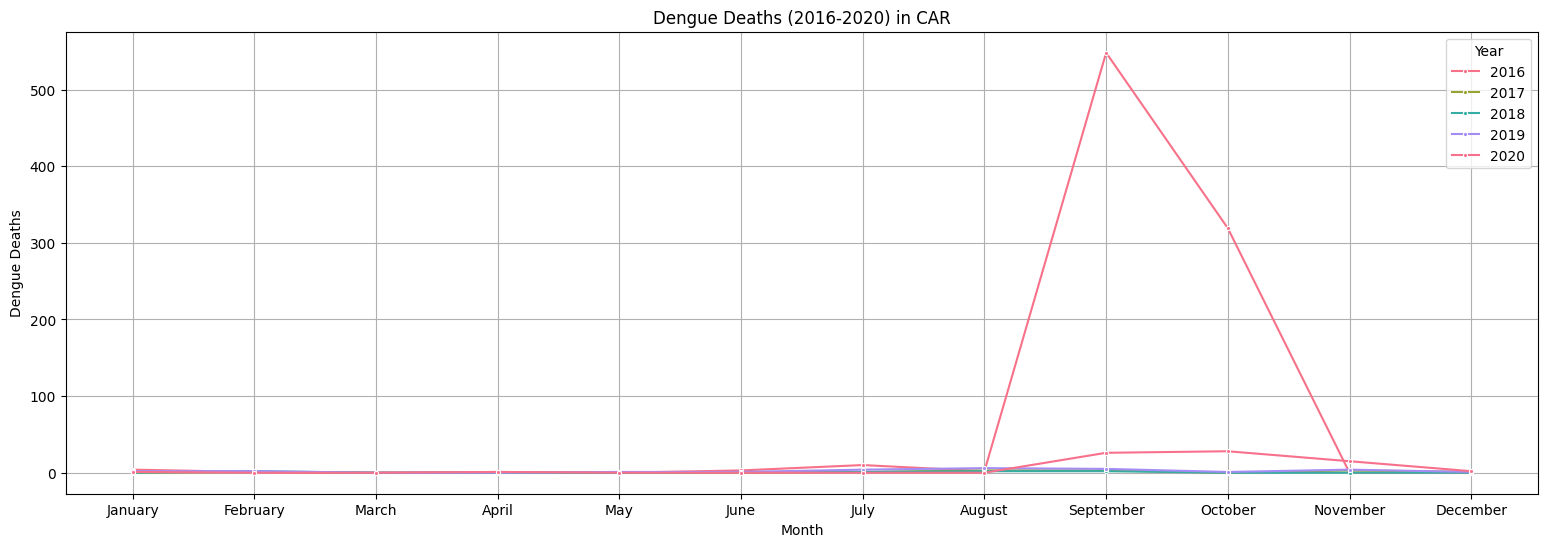

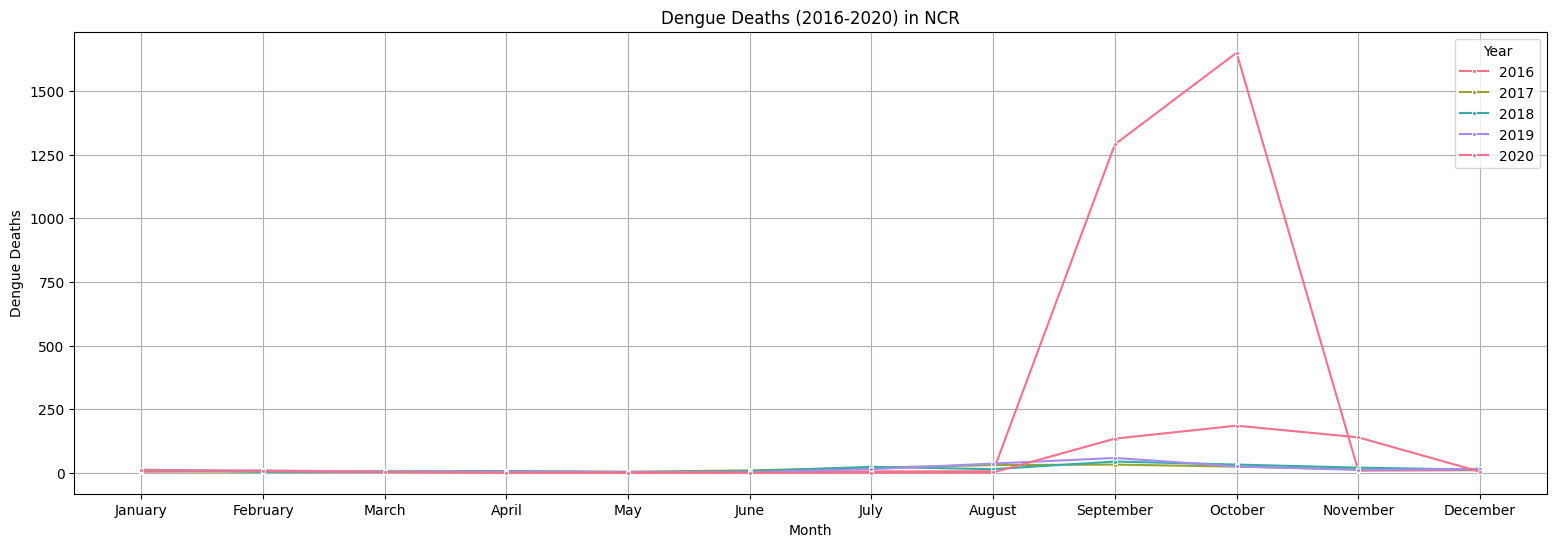

In [94]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

regions = ["Region I", "Region II", "Region III", "Region IV", "Region V", "Region VI","Region VII", "Region VIII",
          "Region IX", "Region X","Region XI", "Region XII","Region XIII", "BARMM","CAR", "NCR"]

for region in regions:
    region_data = dengue[dengue["Region"] == region]

    sns.lineplot(data=region_data, y="Dengue_Deaths", x="Month", marker = ".", hue="Year", palette="husl")
    plt.gcf().set_size_inches(19, 6)
    plt.title(f'Dengue Deaths (2016-2020) in {region}')
    plt.ylabel("Dengue Deaths")
    plt.xlabel("Month")
    plt.xticks(range(0,12), month_order)
    plt.grid(True)
    plt.show()

<h1>Visualization of Dengue Cases in All Regions (2016-2020)</h1>

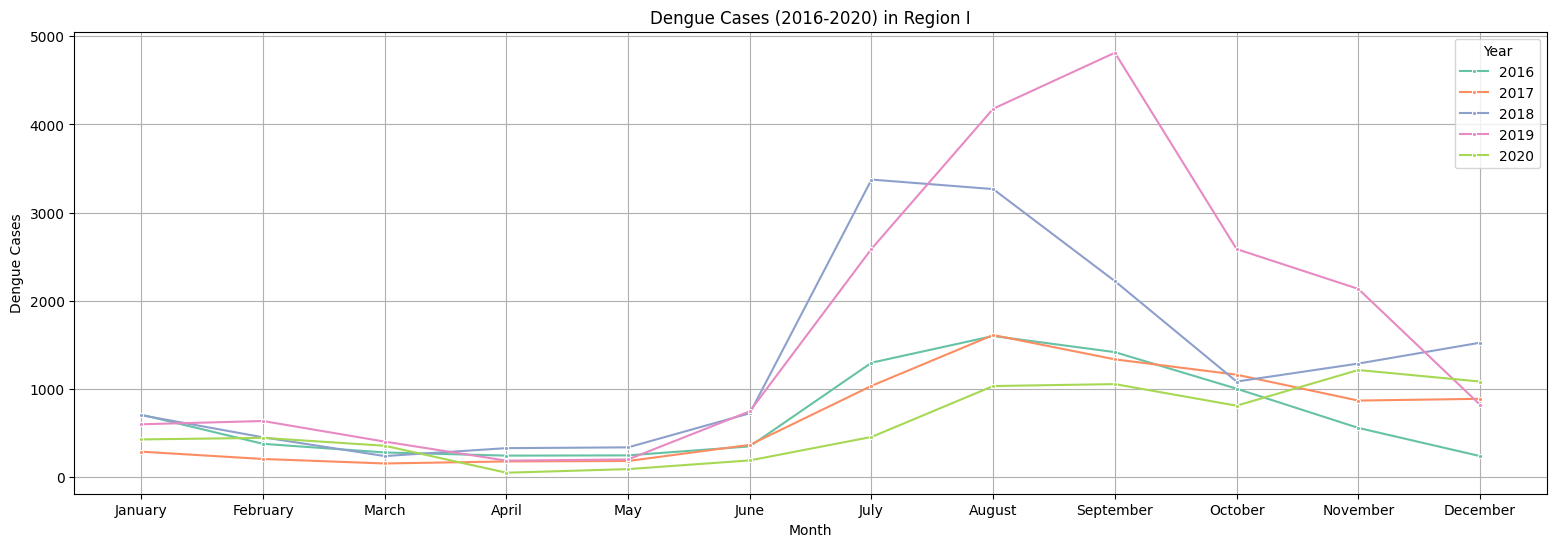

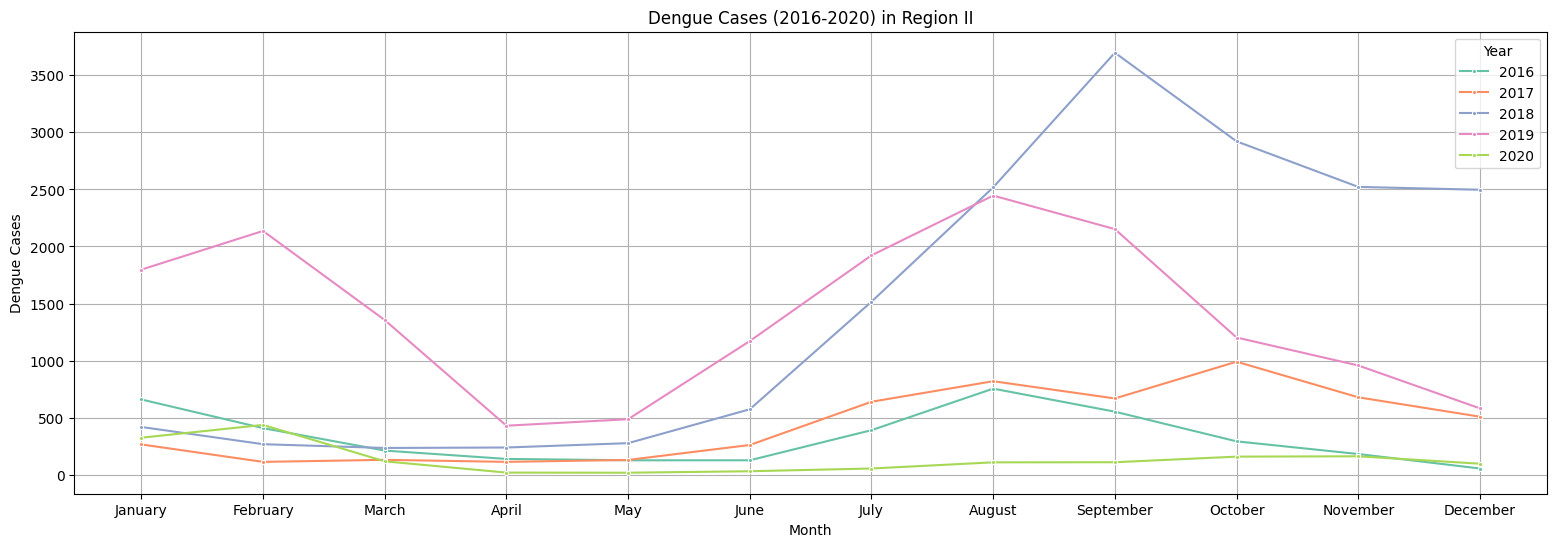

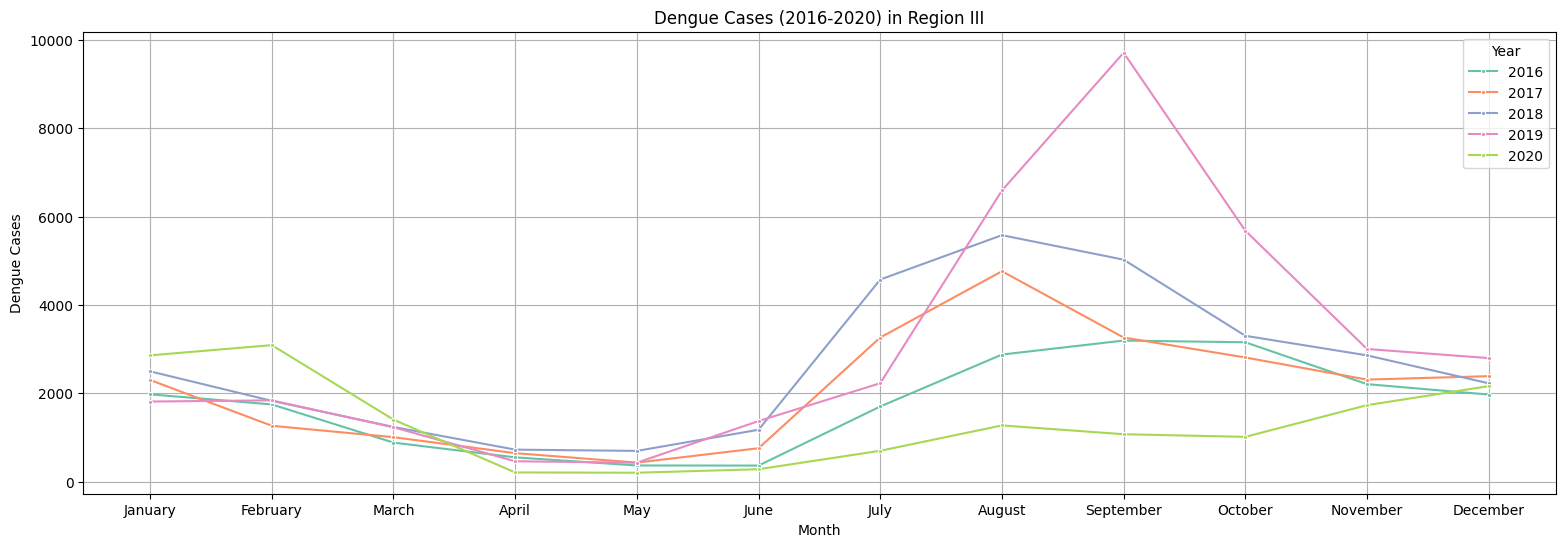

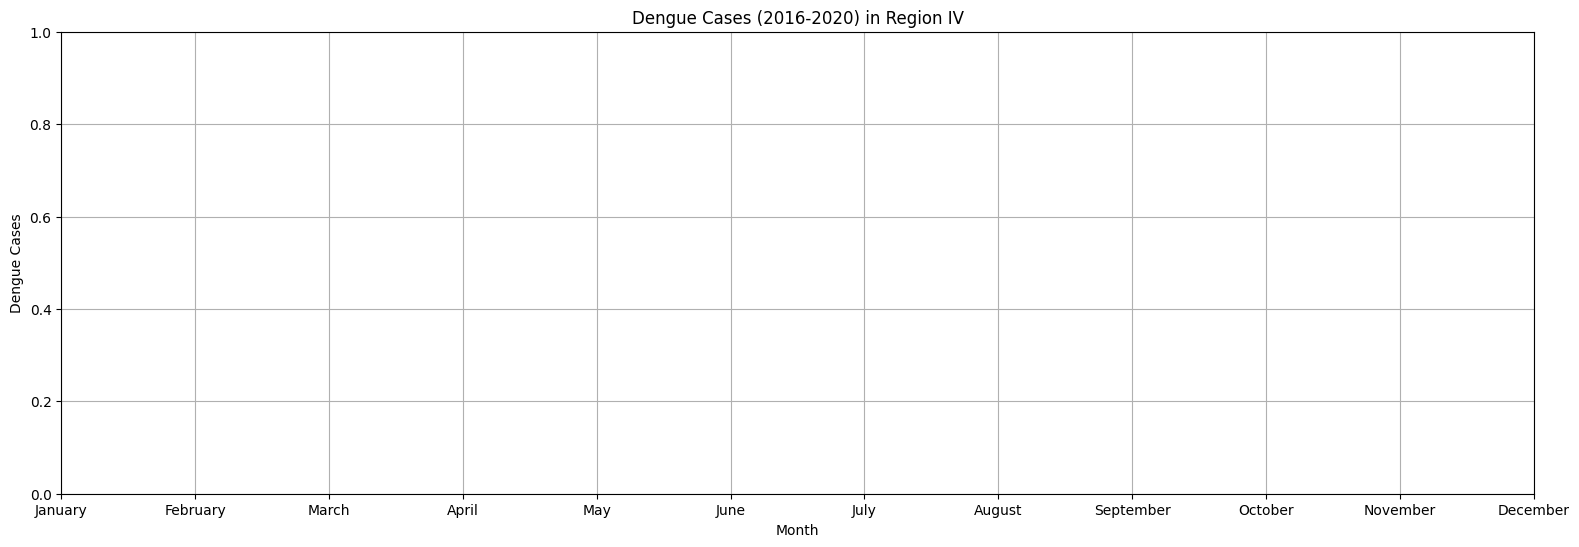

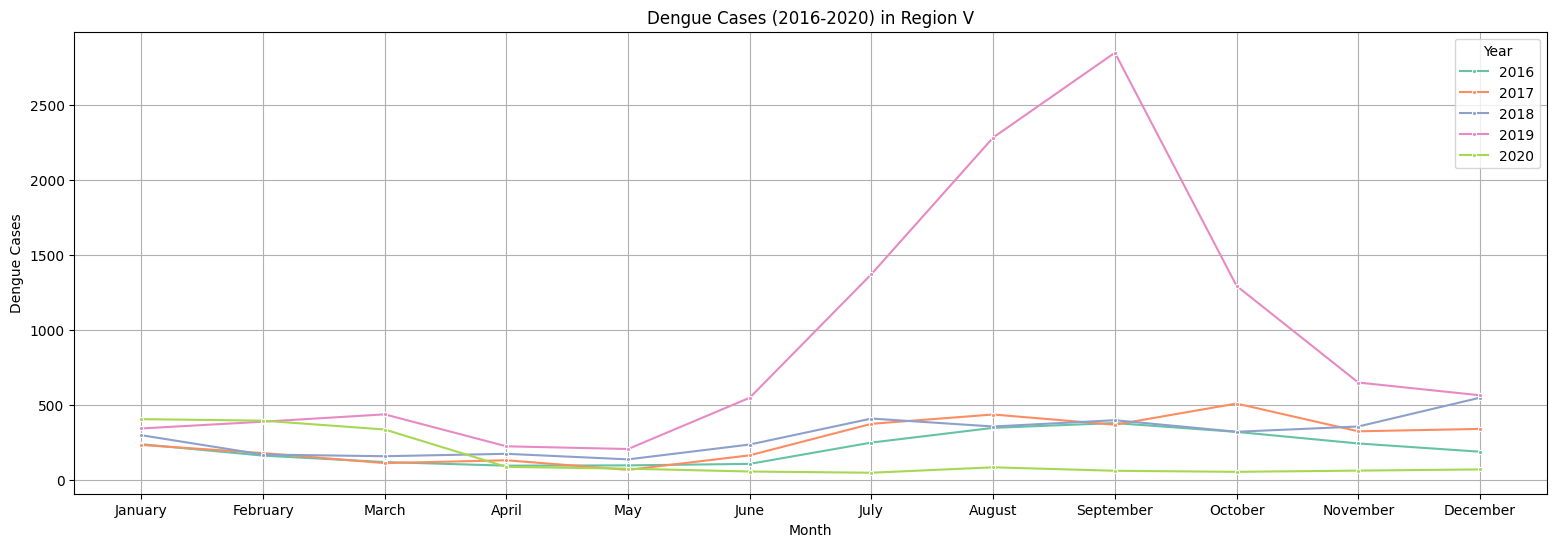

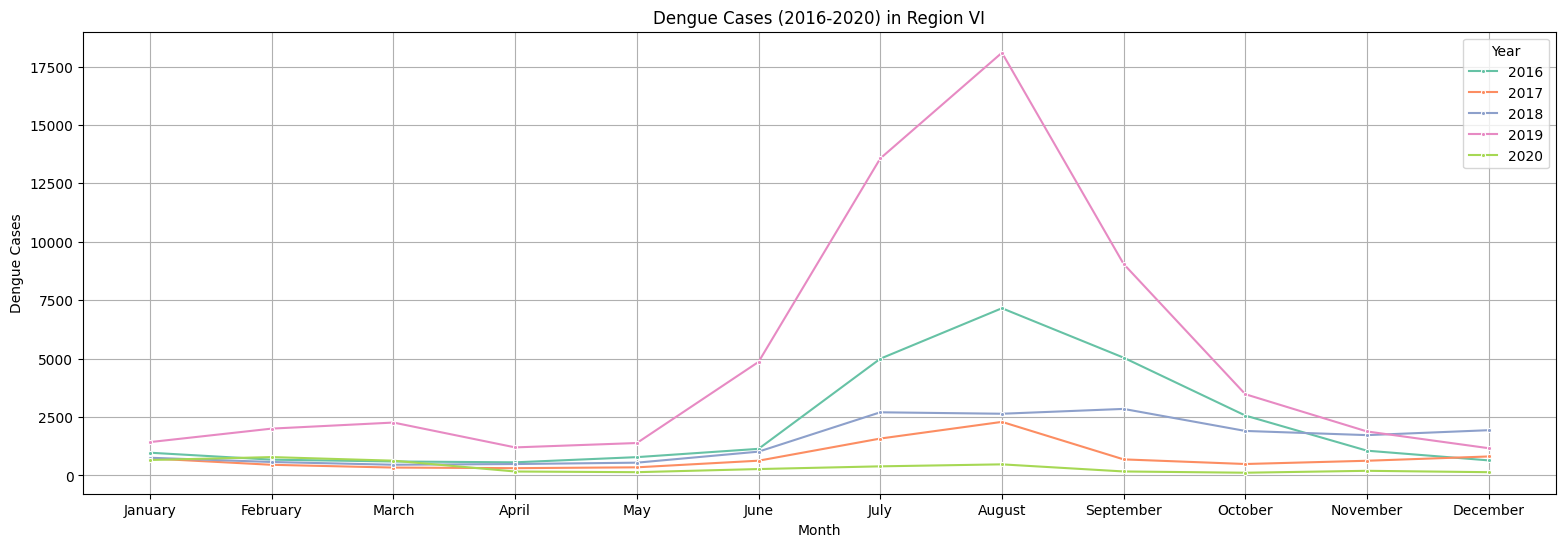

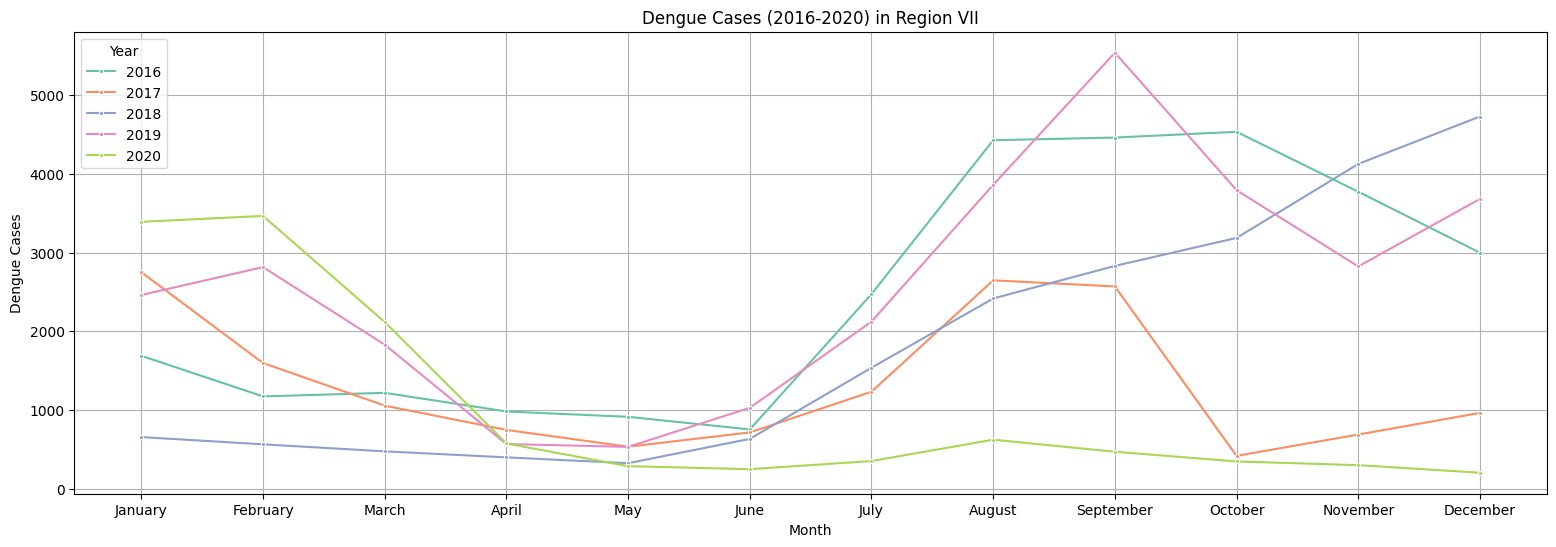

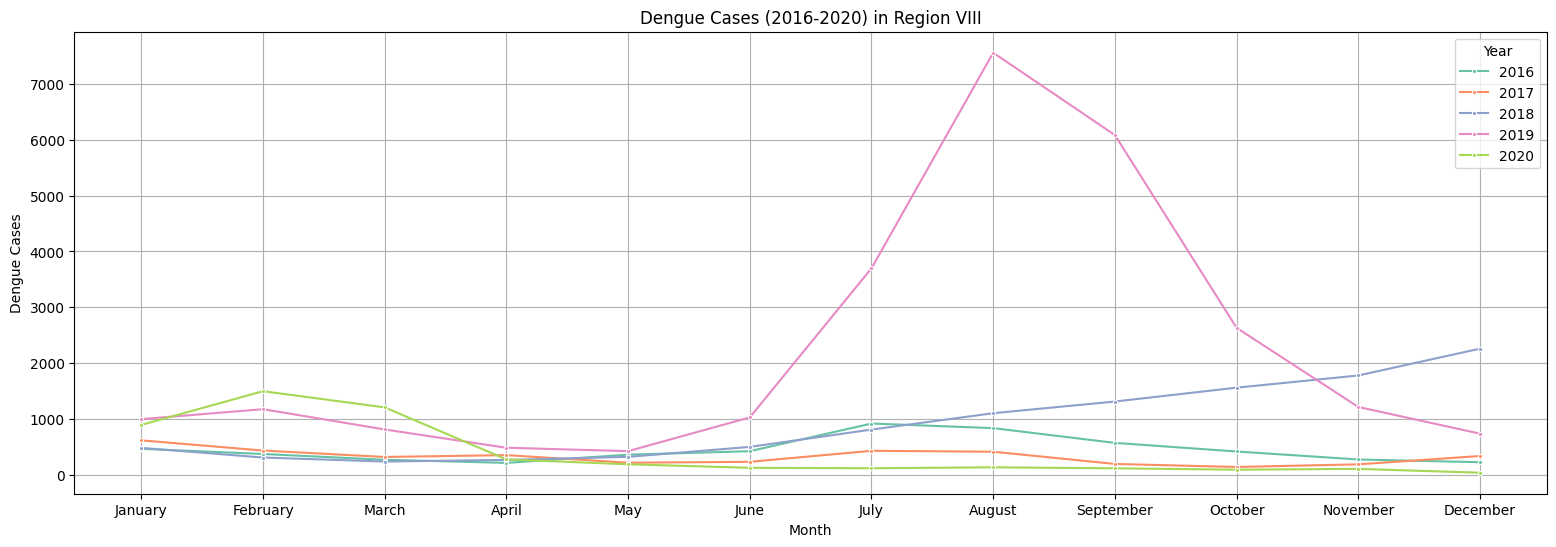

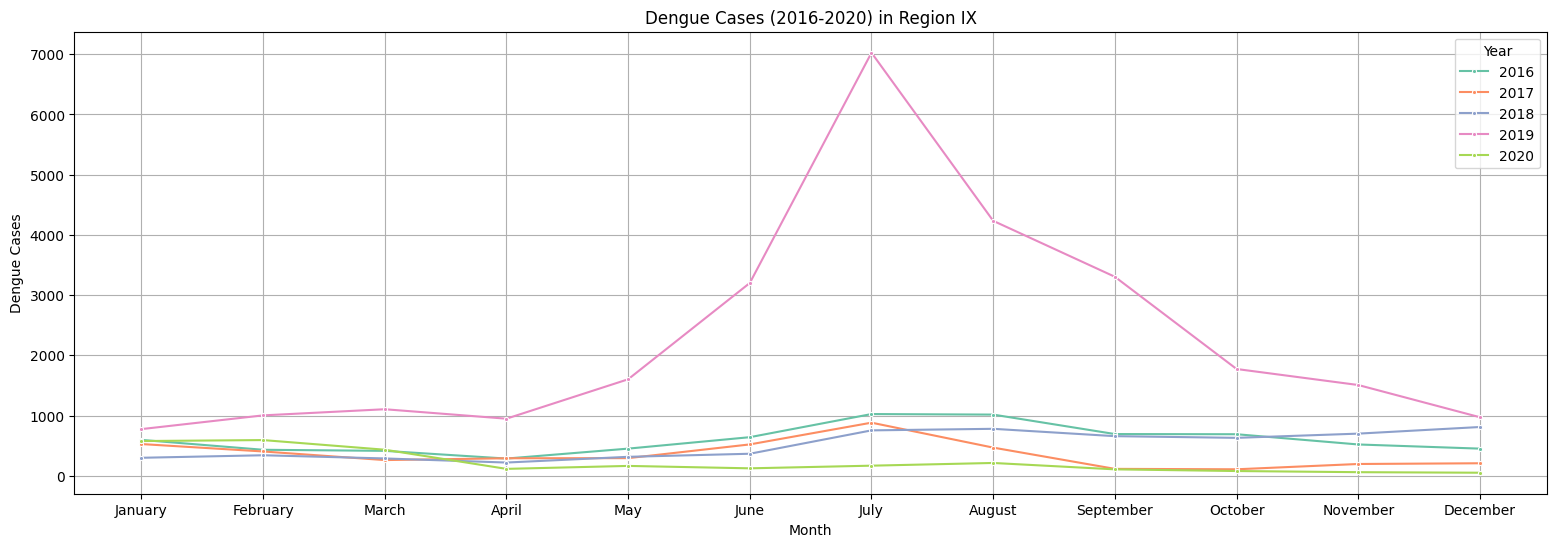

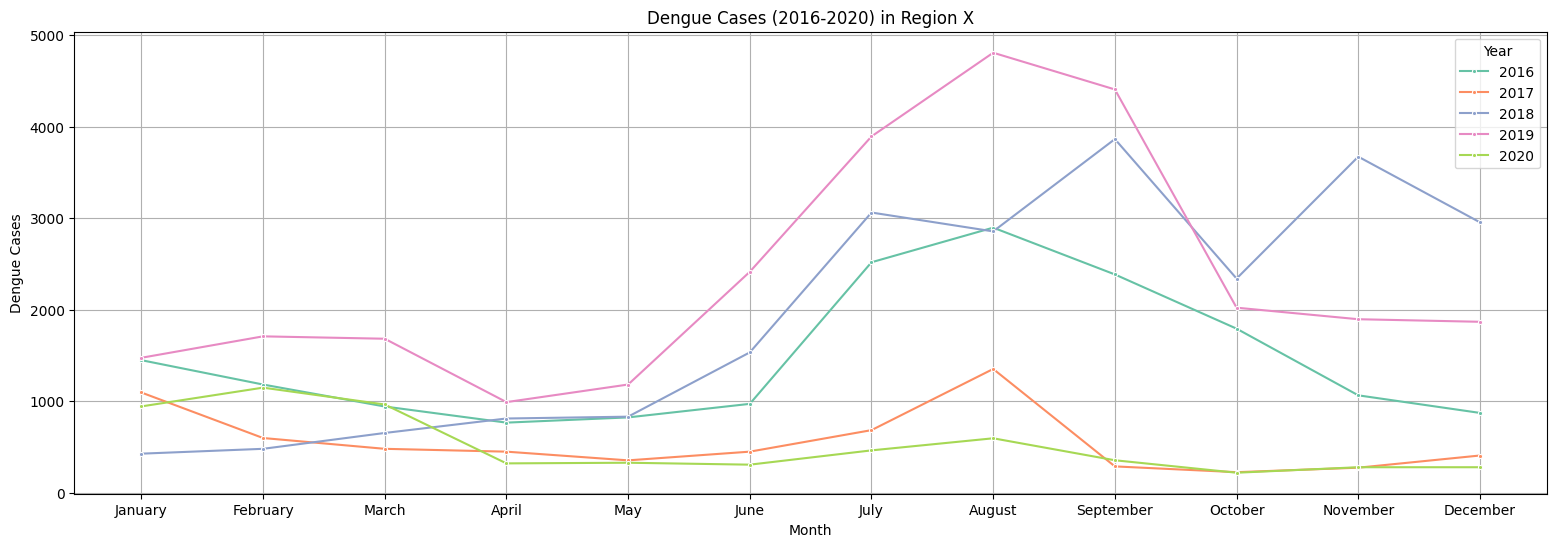

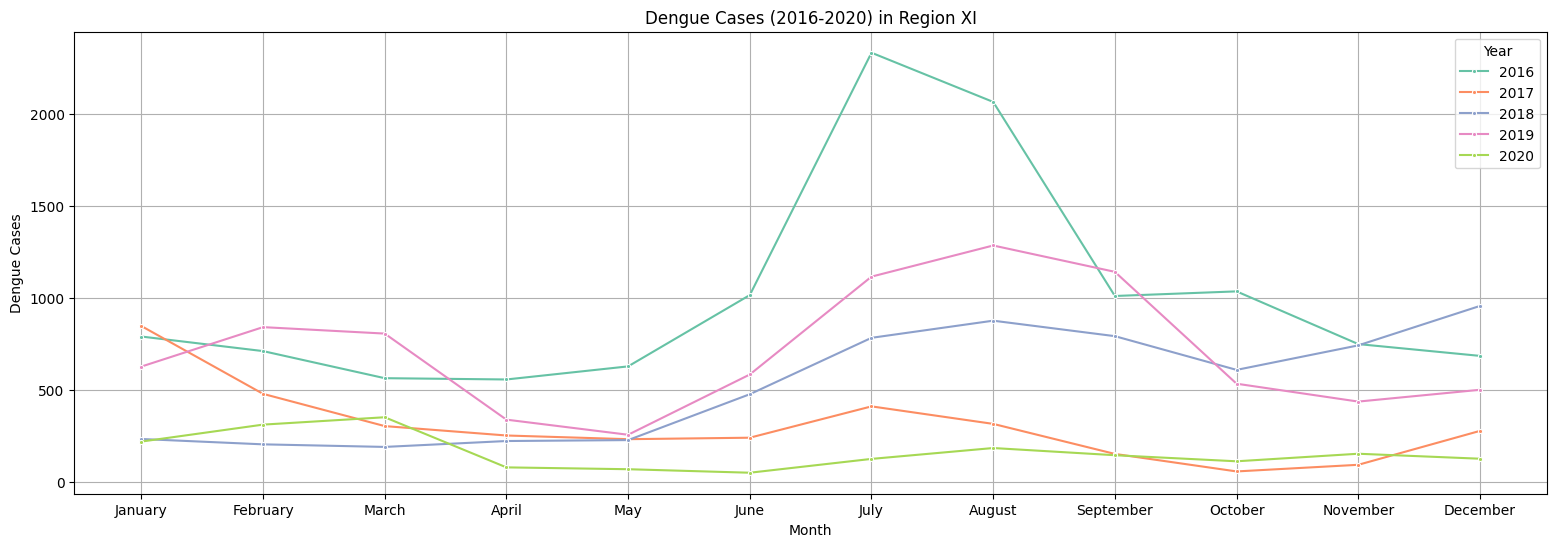

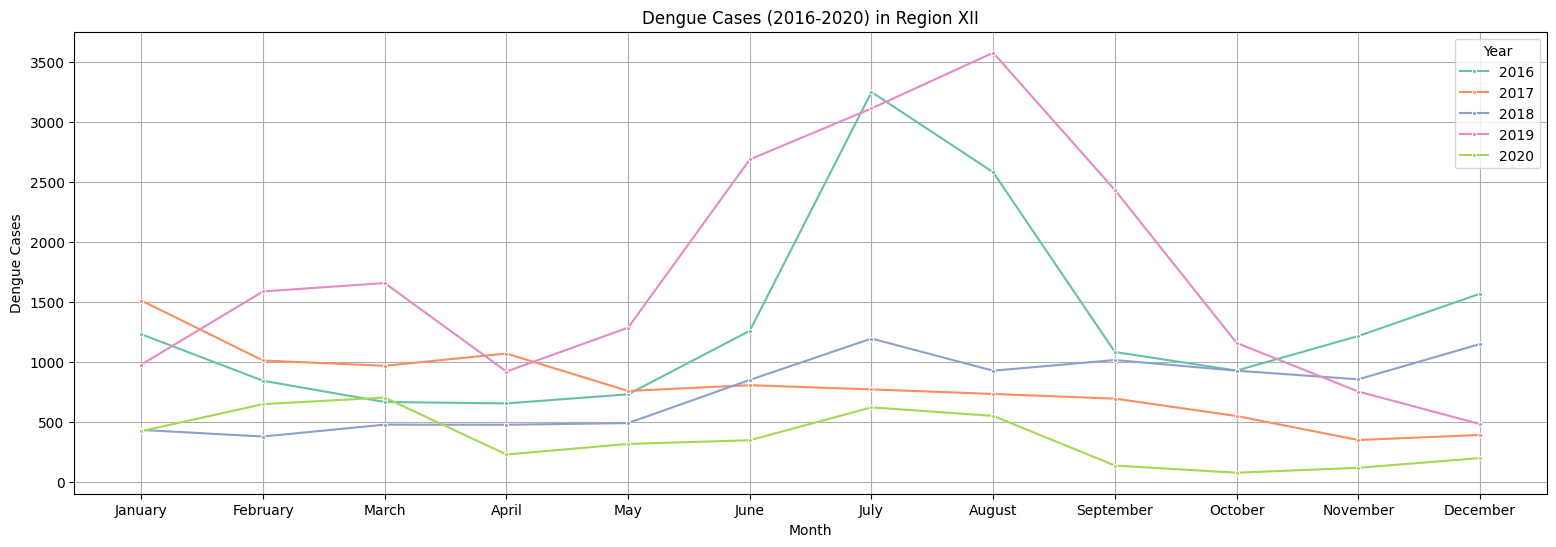

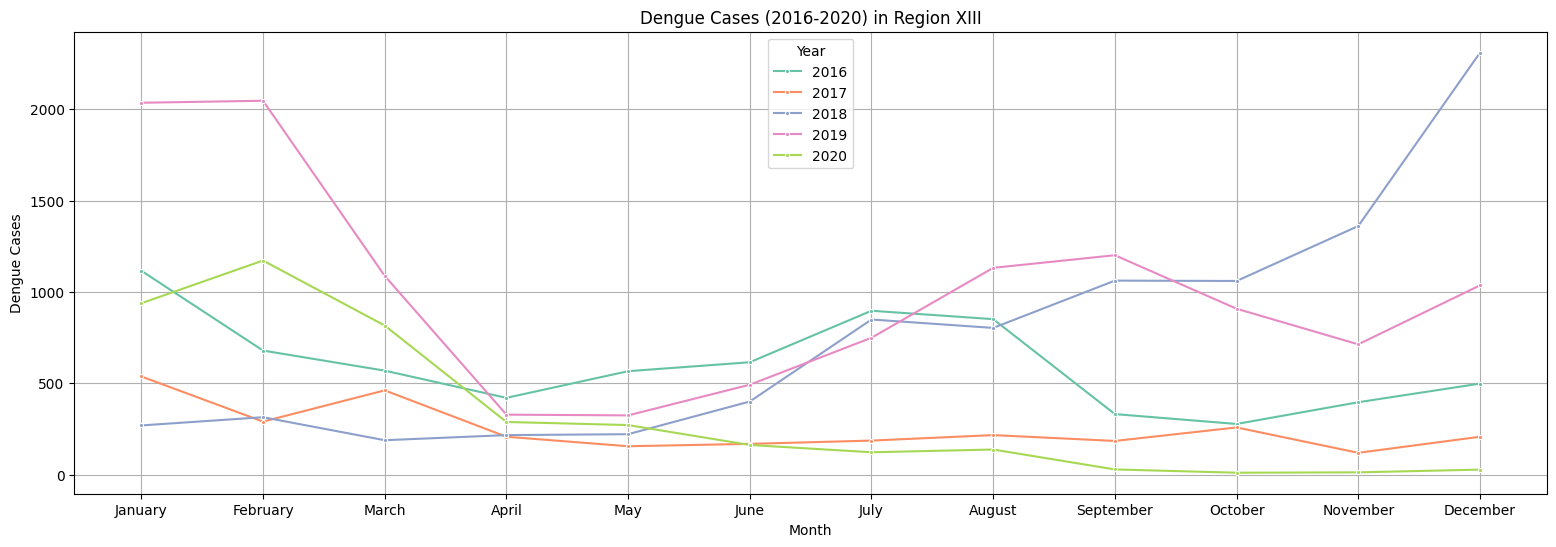

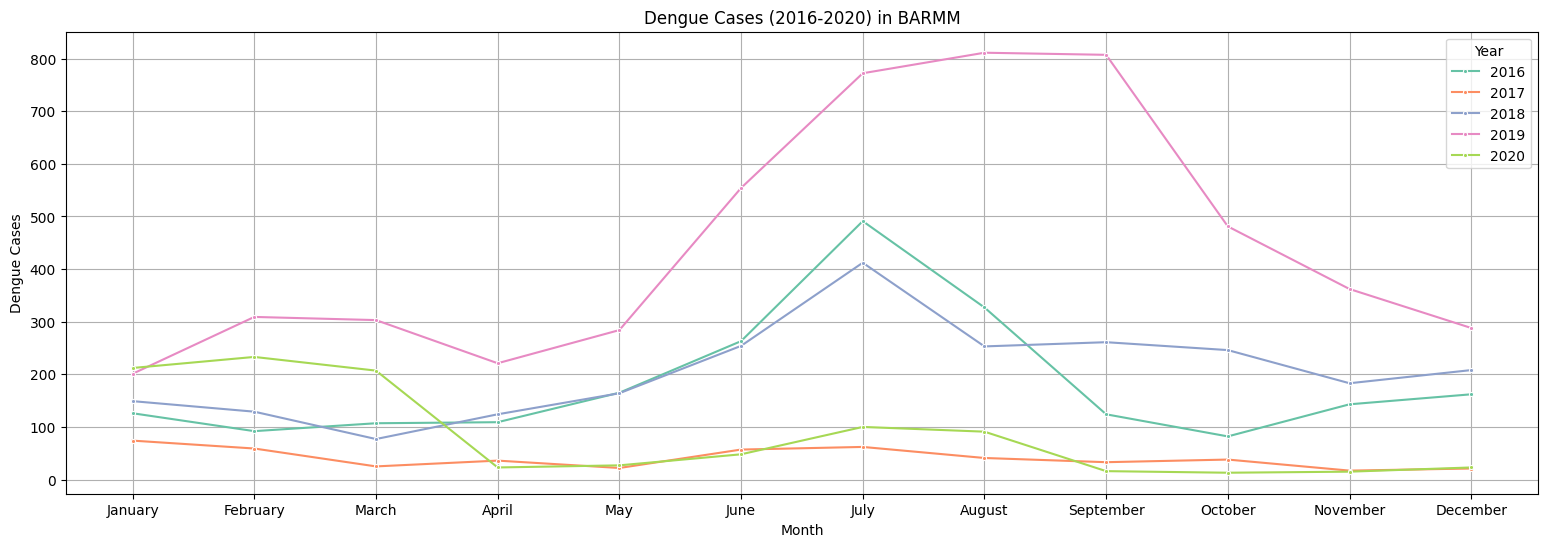

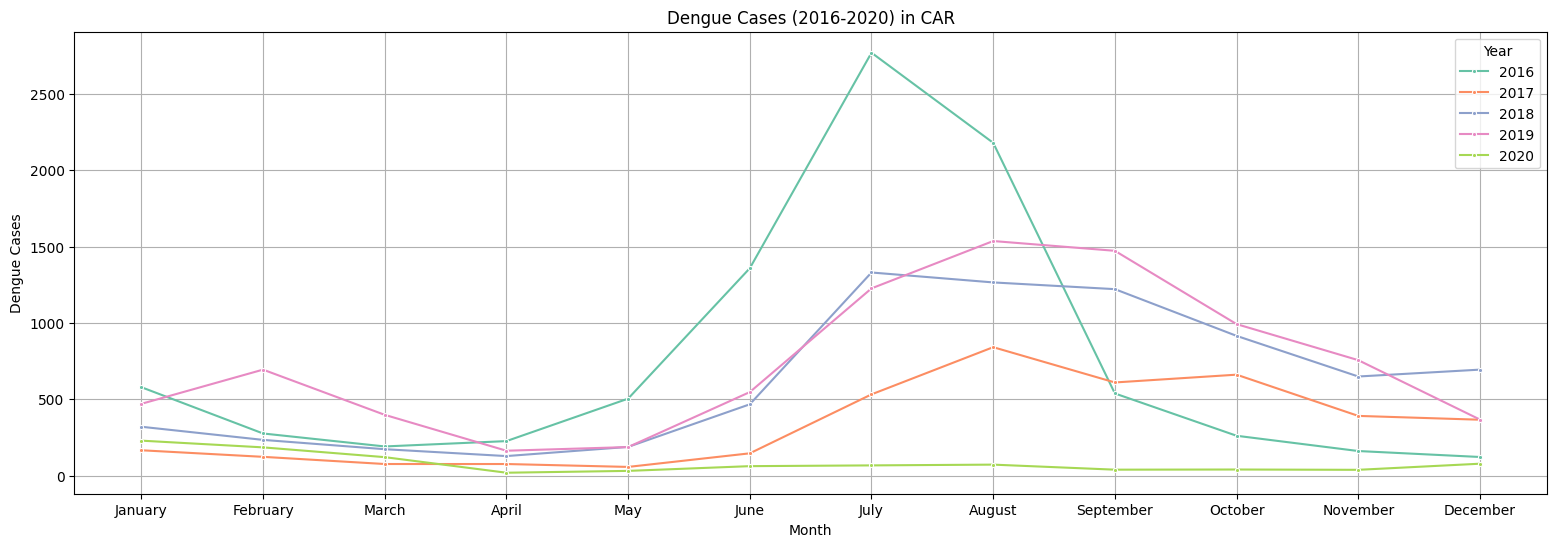

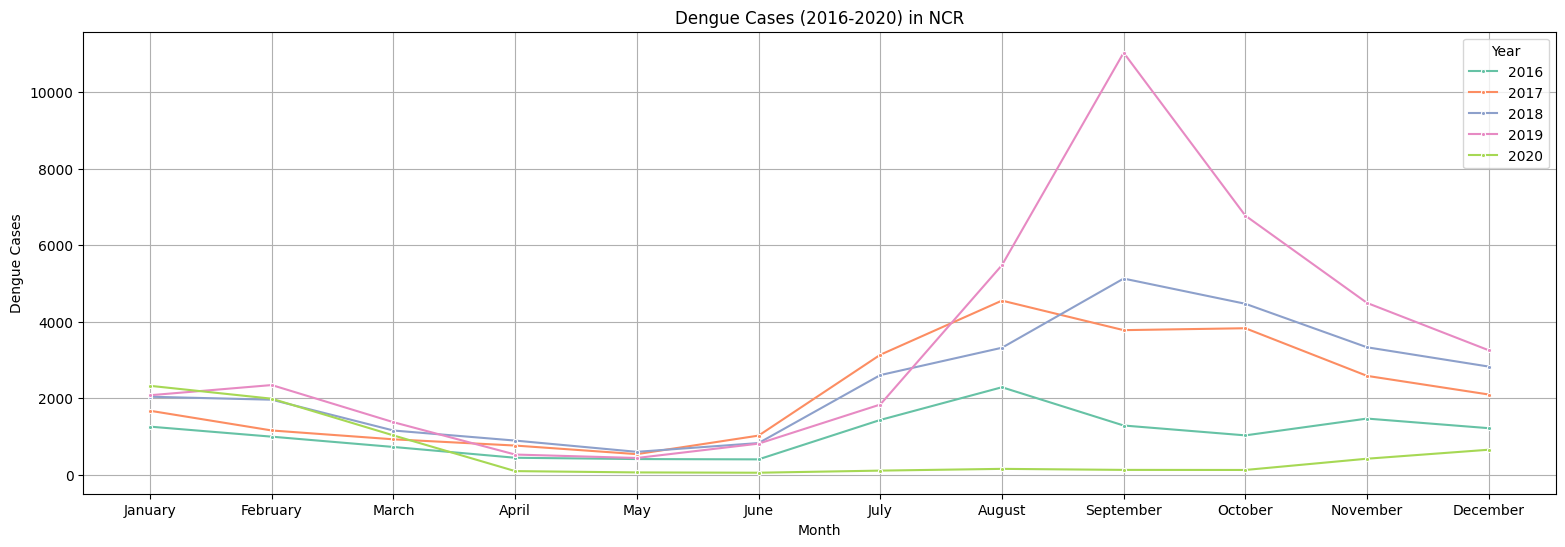

In [95]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

regions = ["Region I", "Region II", "Region III", "Region IV", "Region V", "Region VI","Region VII", "Region VIII",
          "Region IX", "Region X","Region XI", "Region XII","Region XIII", "BARMM","CAR", "NCR"]

for region in regions:
    region_data = dengue[dengue["Region"] == region]

    sns.lineplot(data=region_data, y="Dengue_Cases", x="Month", marker = ".", hue="Year", palette="Set2")
    plt.gcf().set_size_inches(19, 6)
    plt.title(f'Dengue Cases (2016-2020) in {region}')
    plt.ylabel("Dengue Cases")
    plt.xlabel("Month")
    plt.xticks(range(0,12), month_order)
    plt.grid(True)
    plt.show()

<h1>Visualization of Mortality Rate in All Regions (2016-2020)</h1>

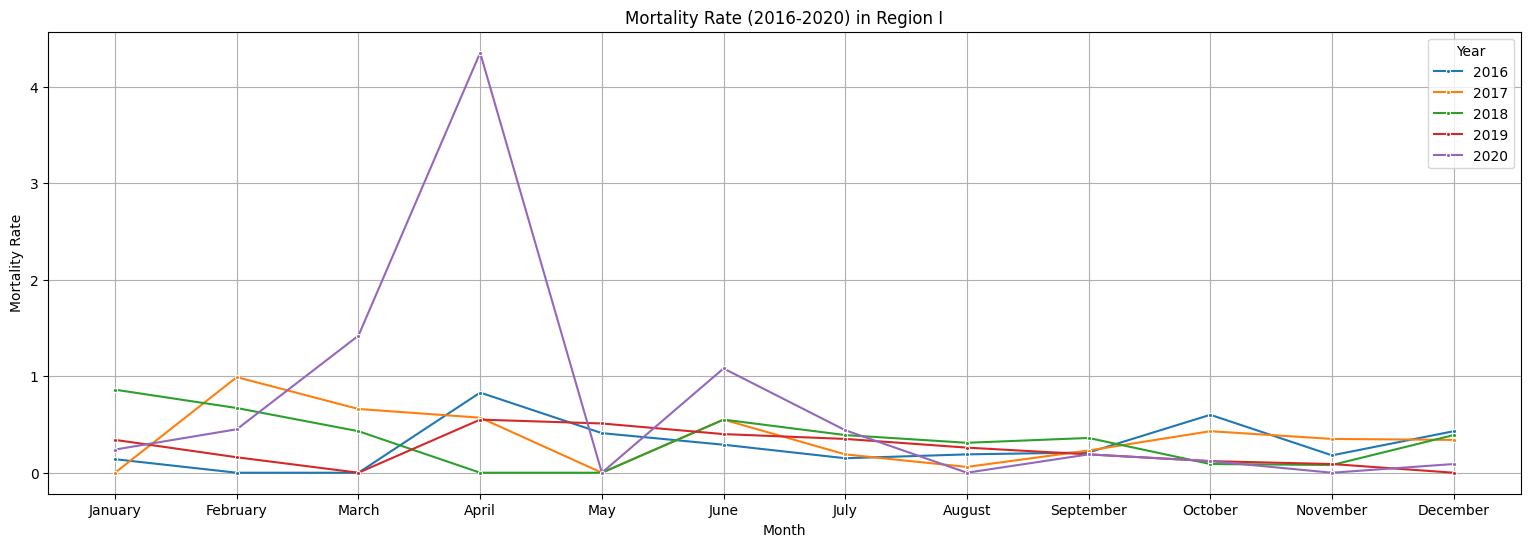

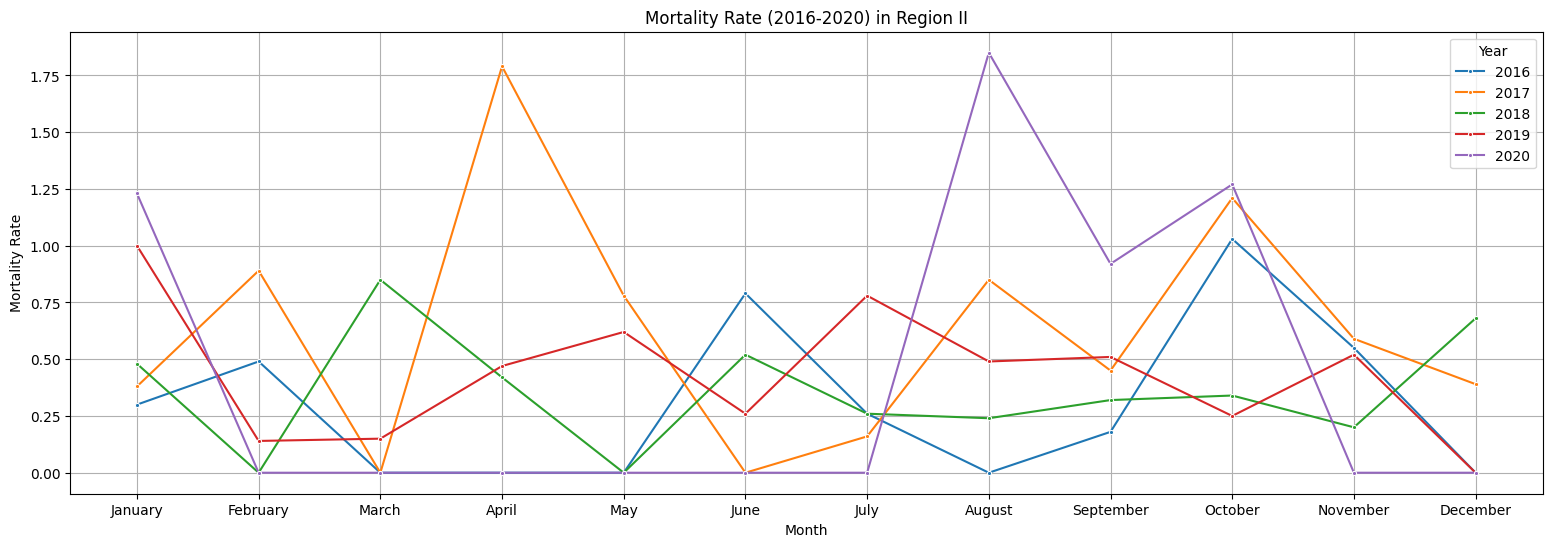

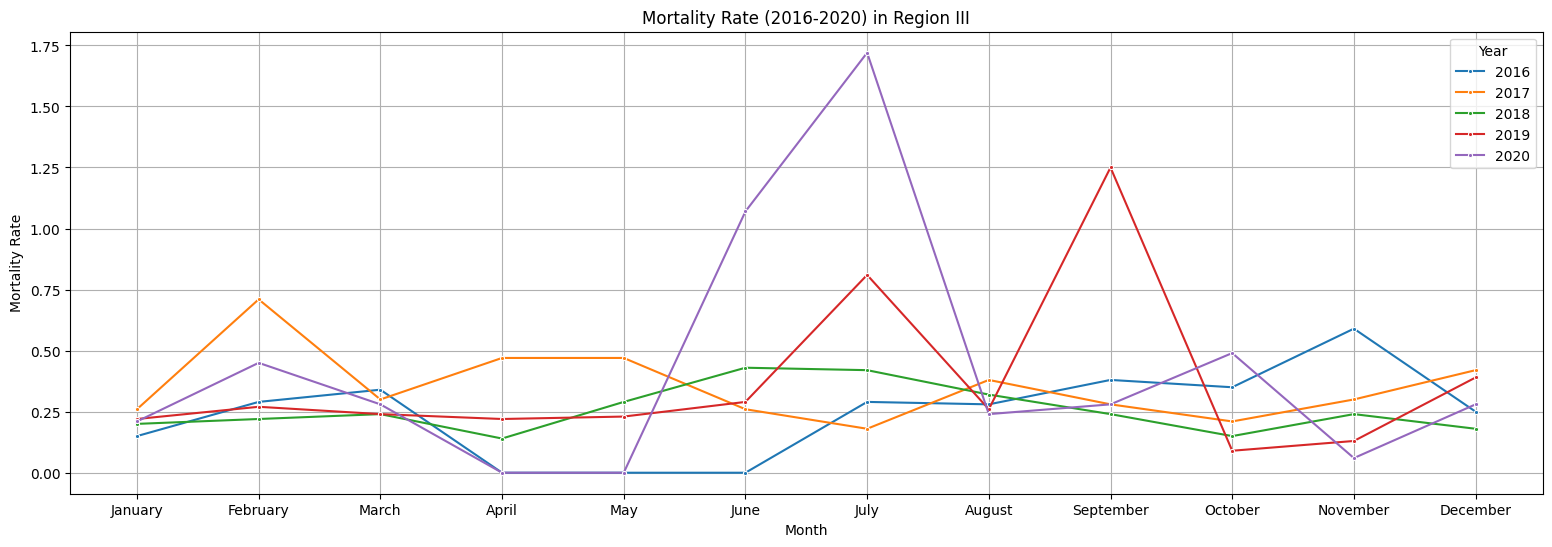

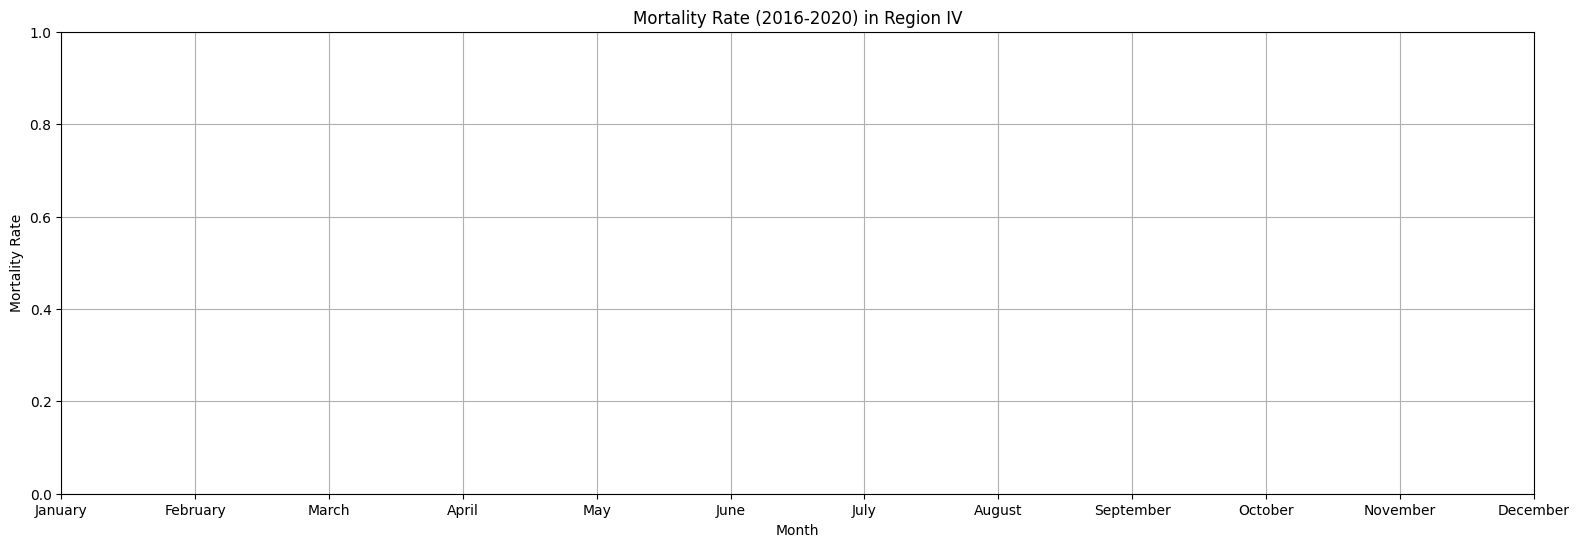

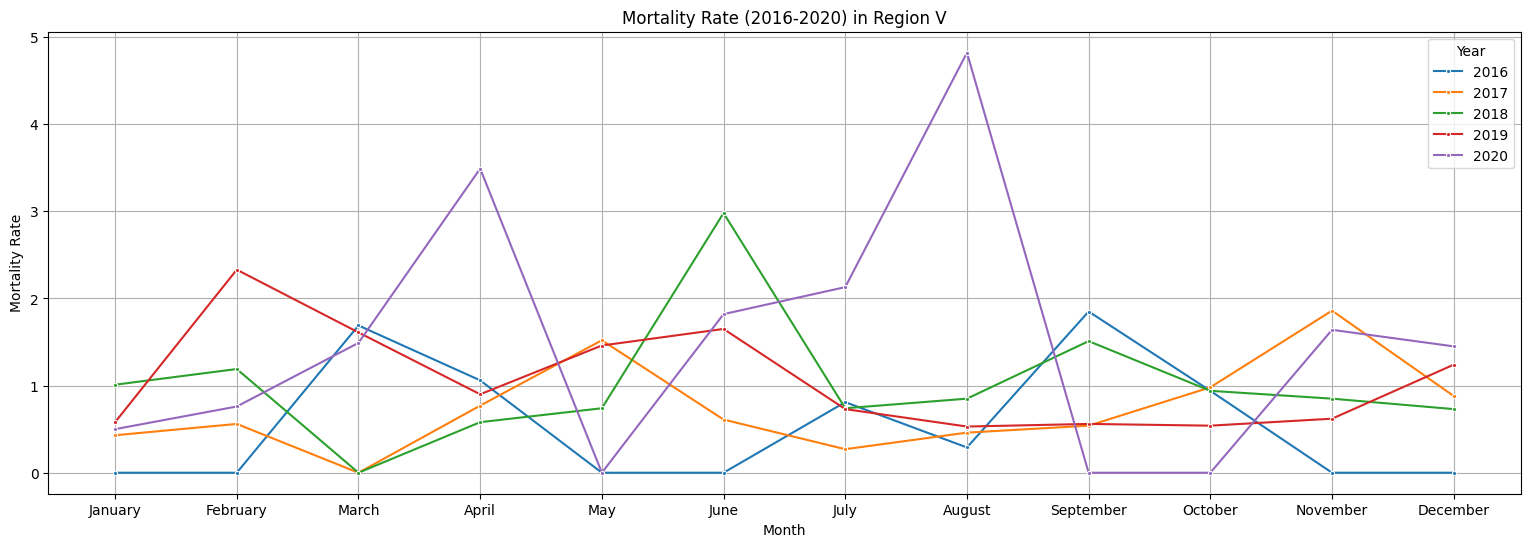

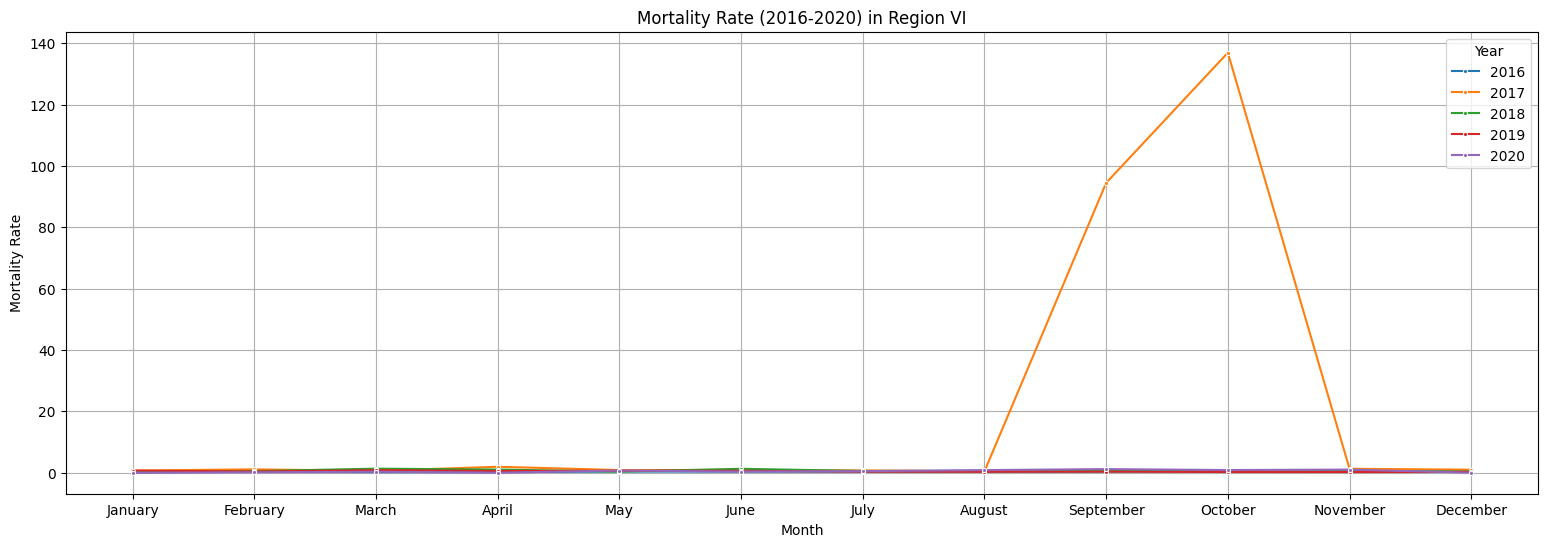

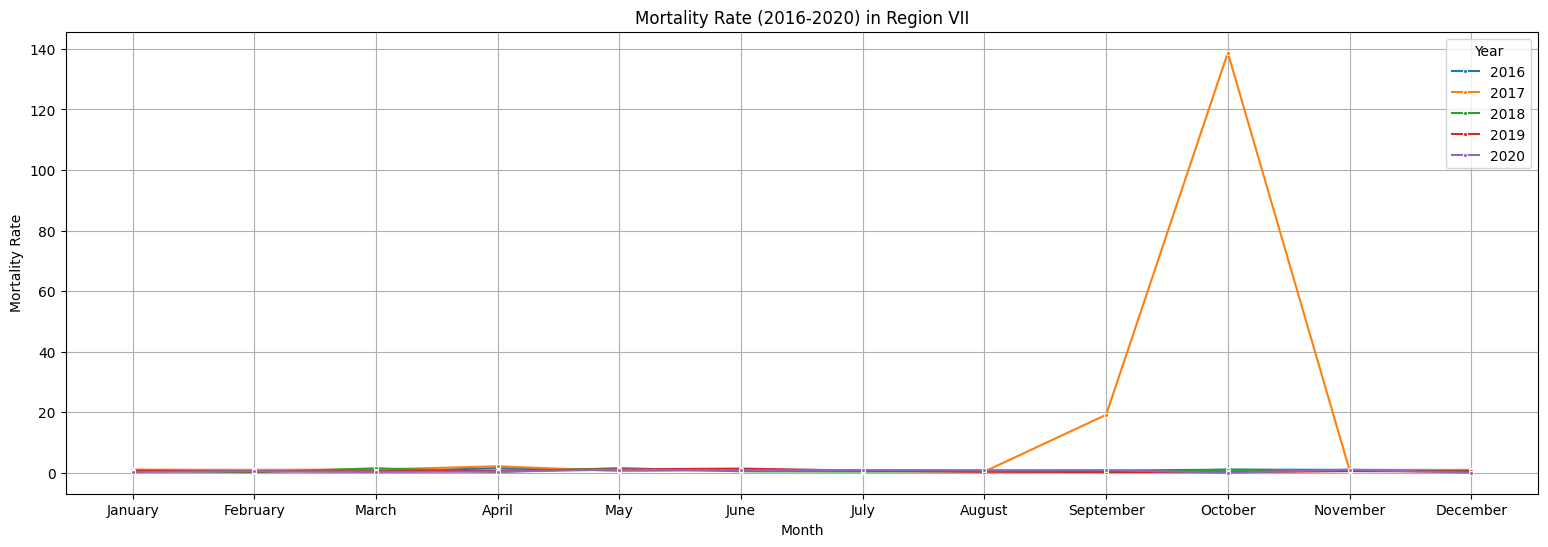

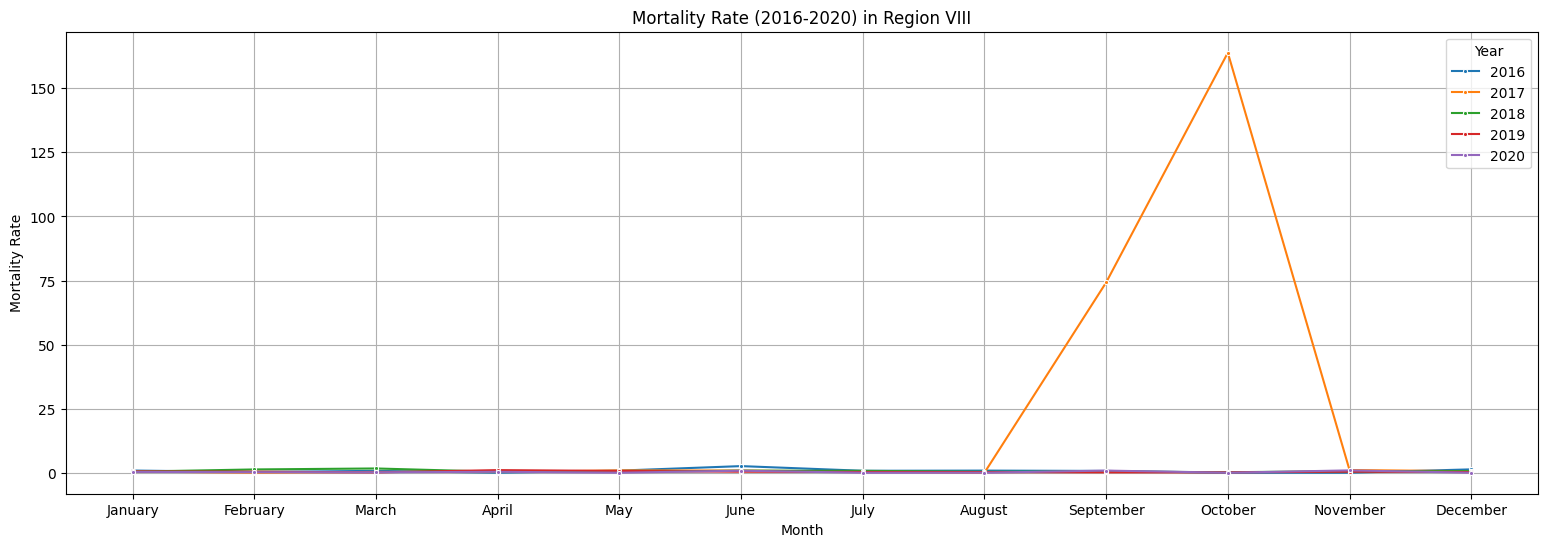

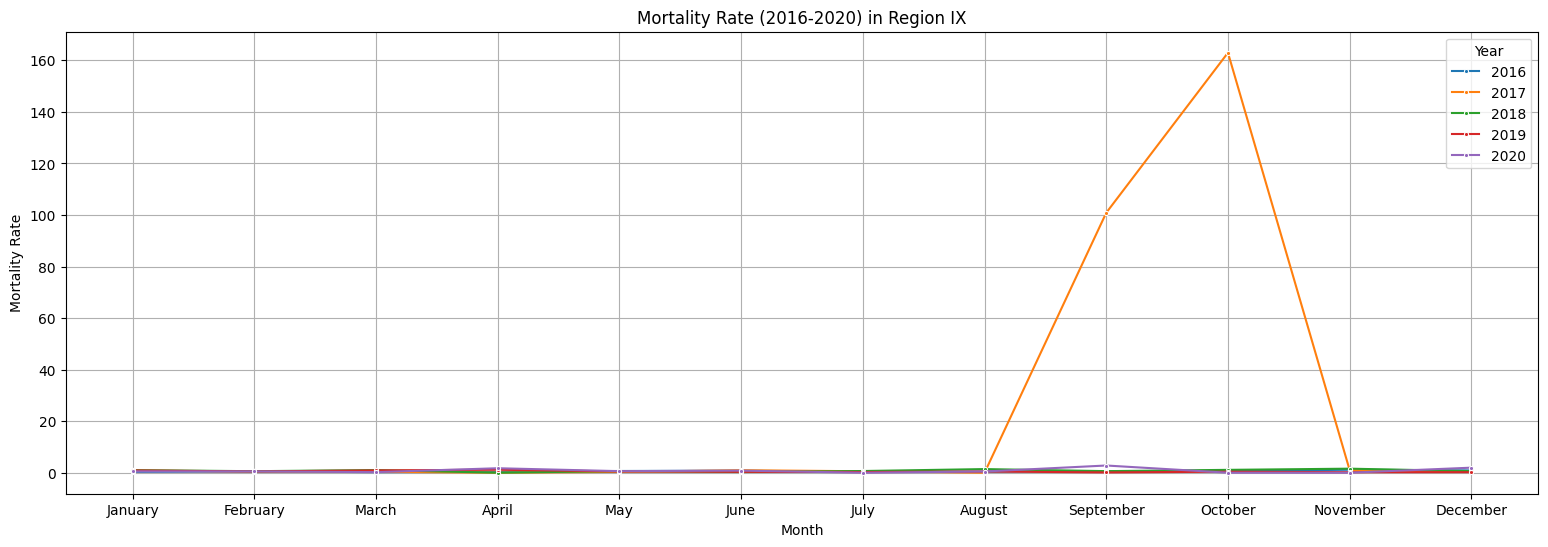

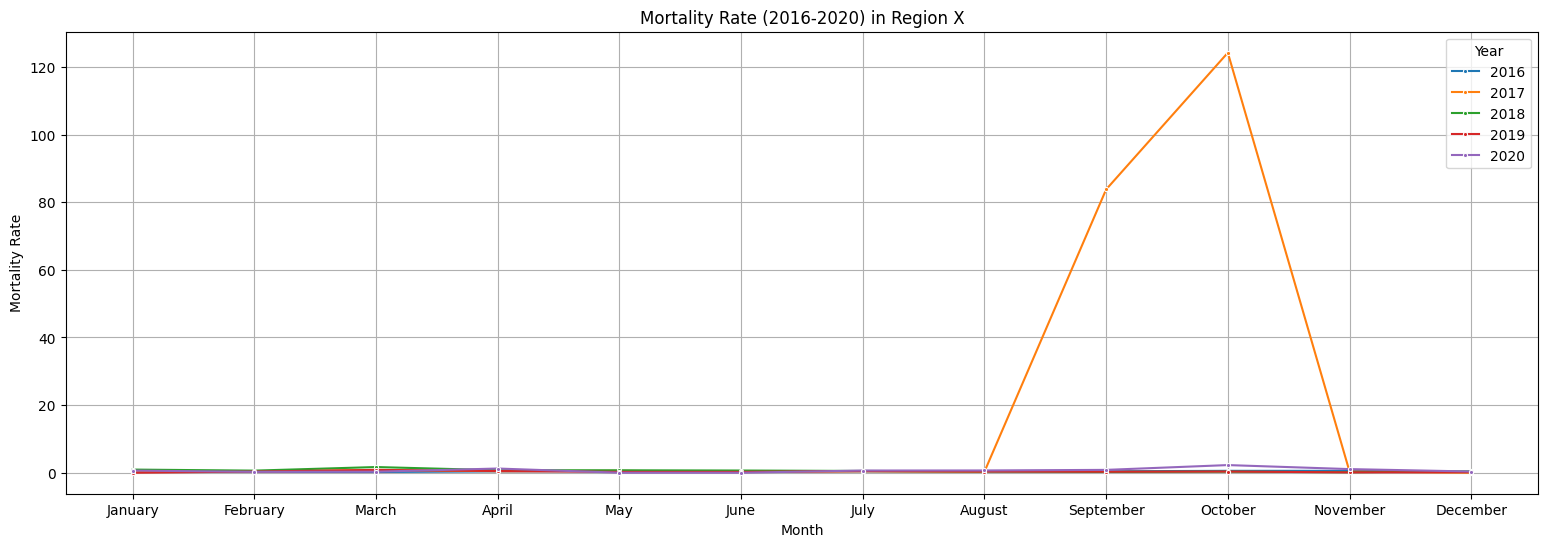

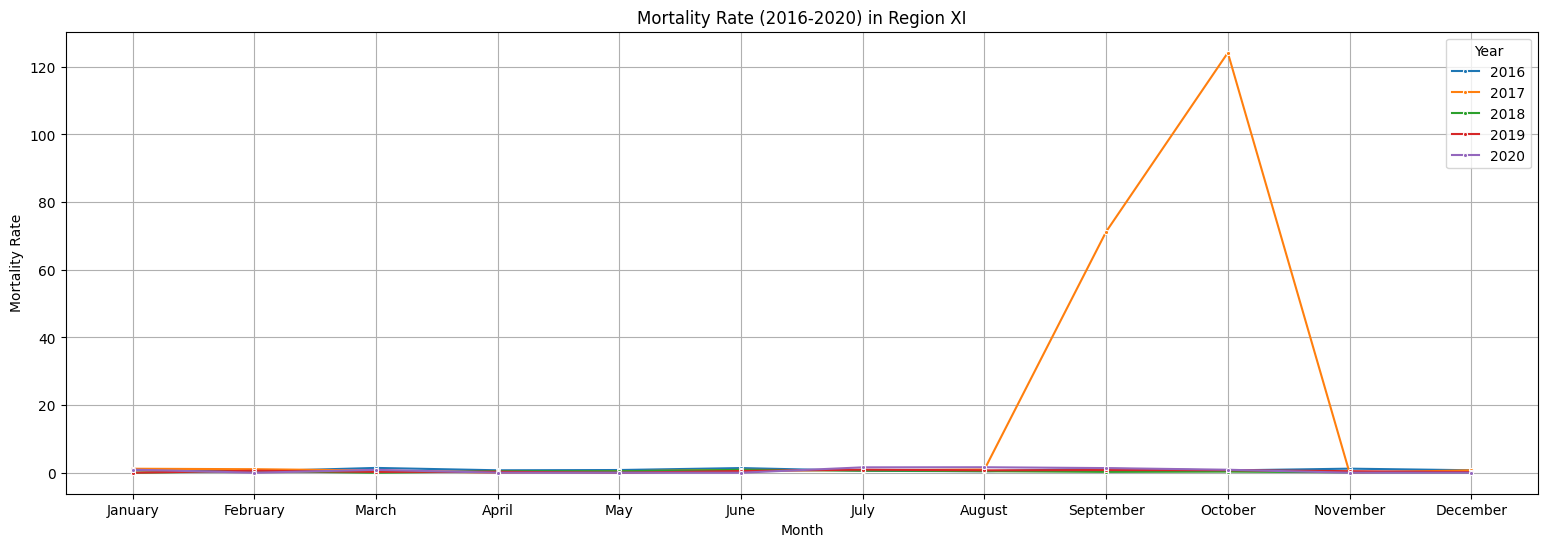

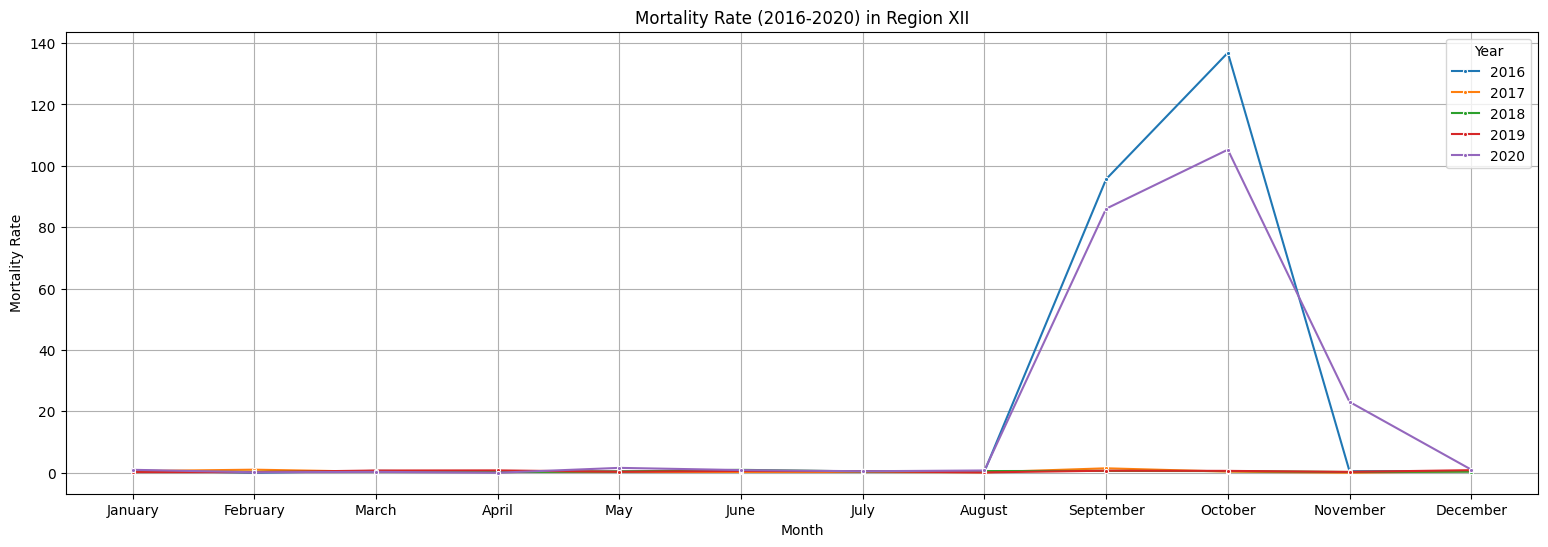

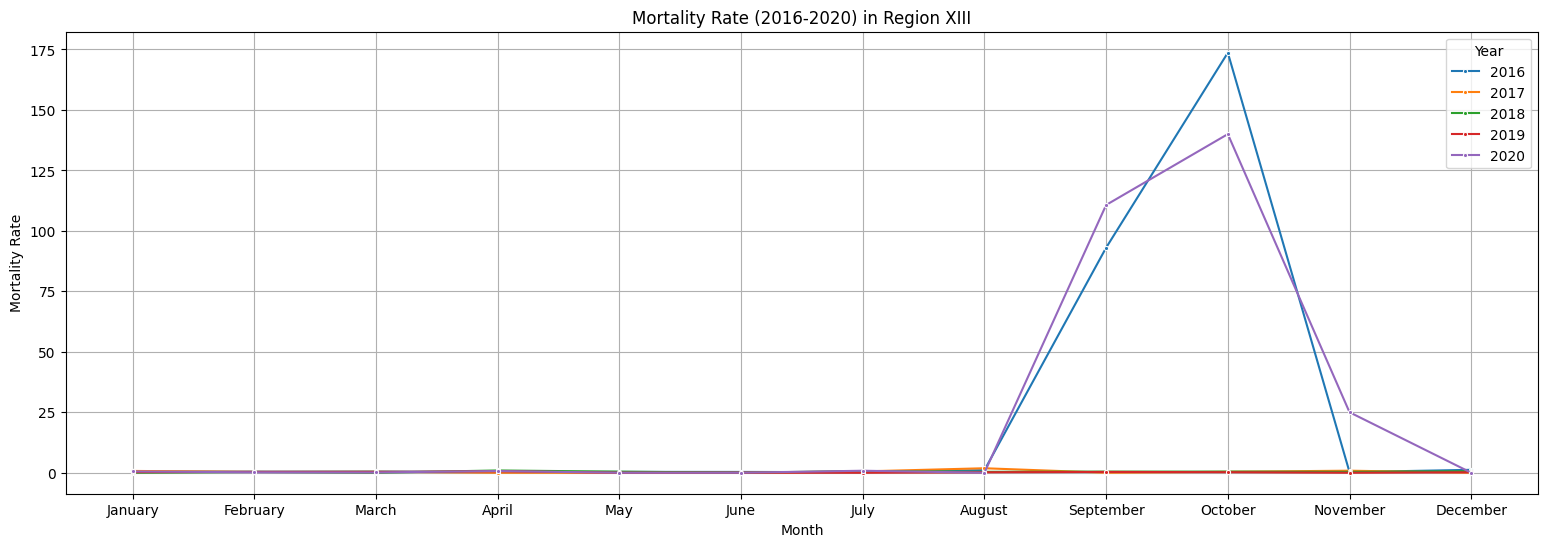

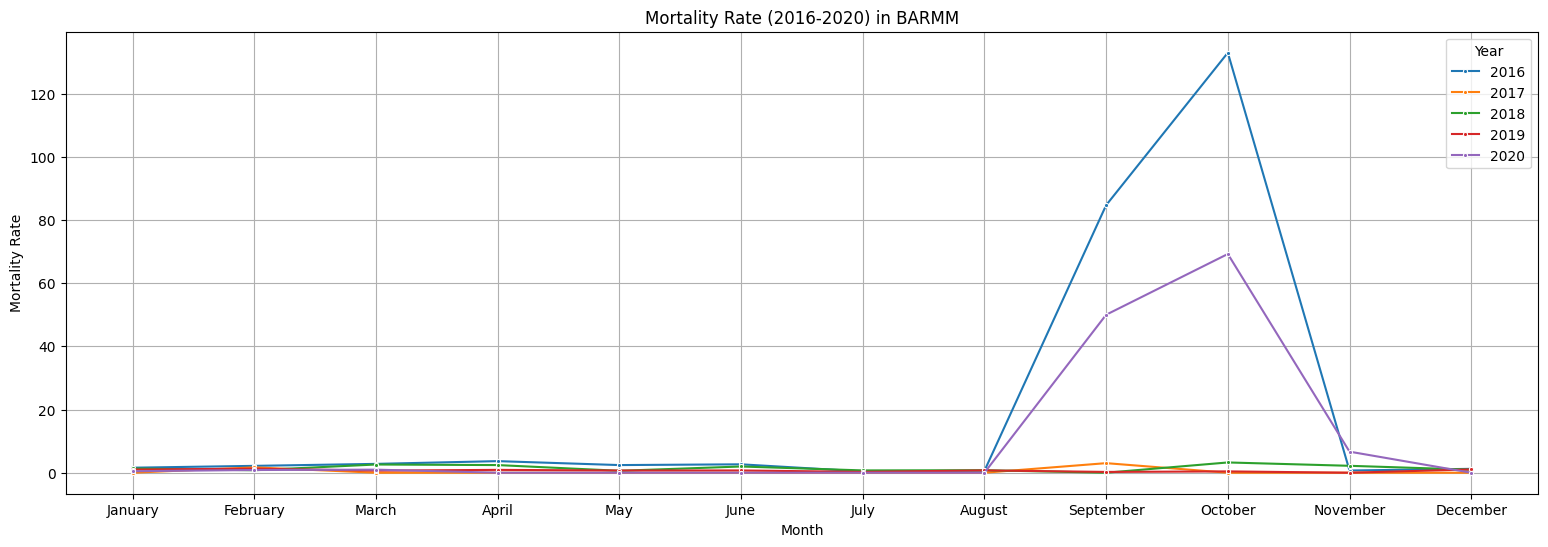

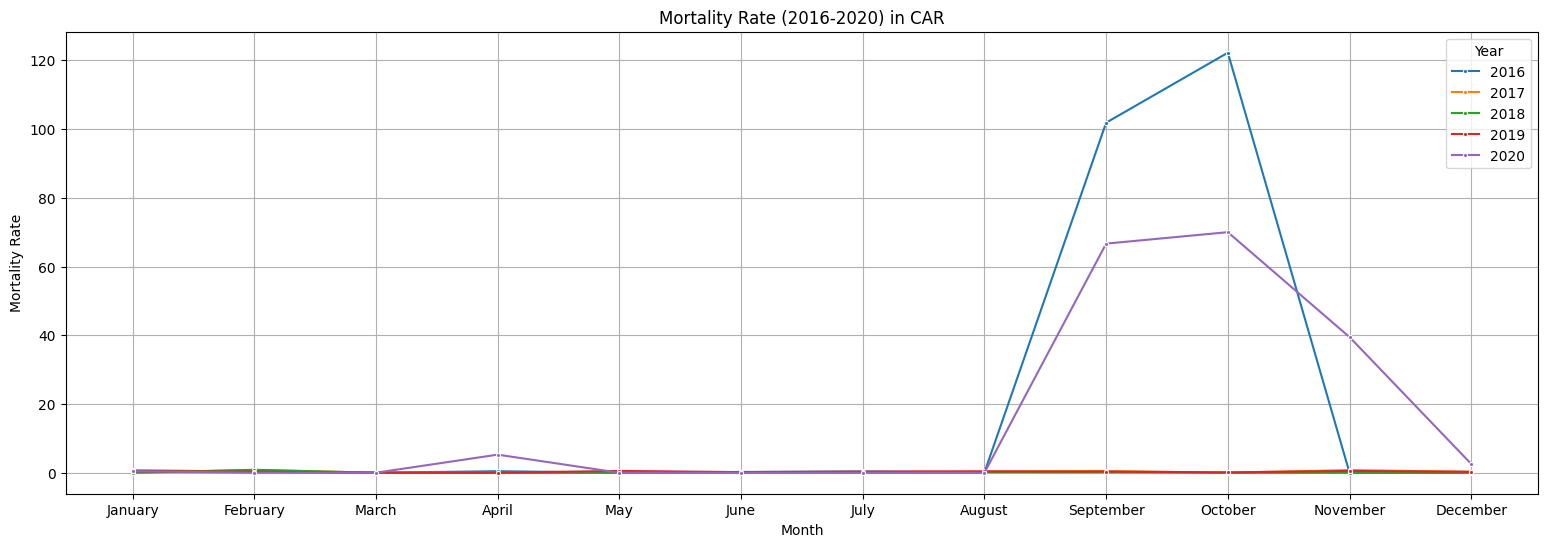

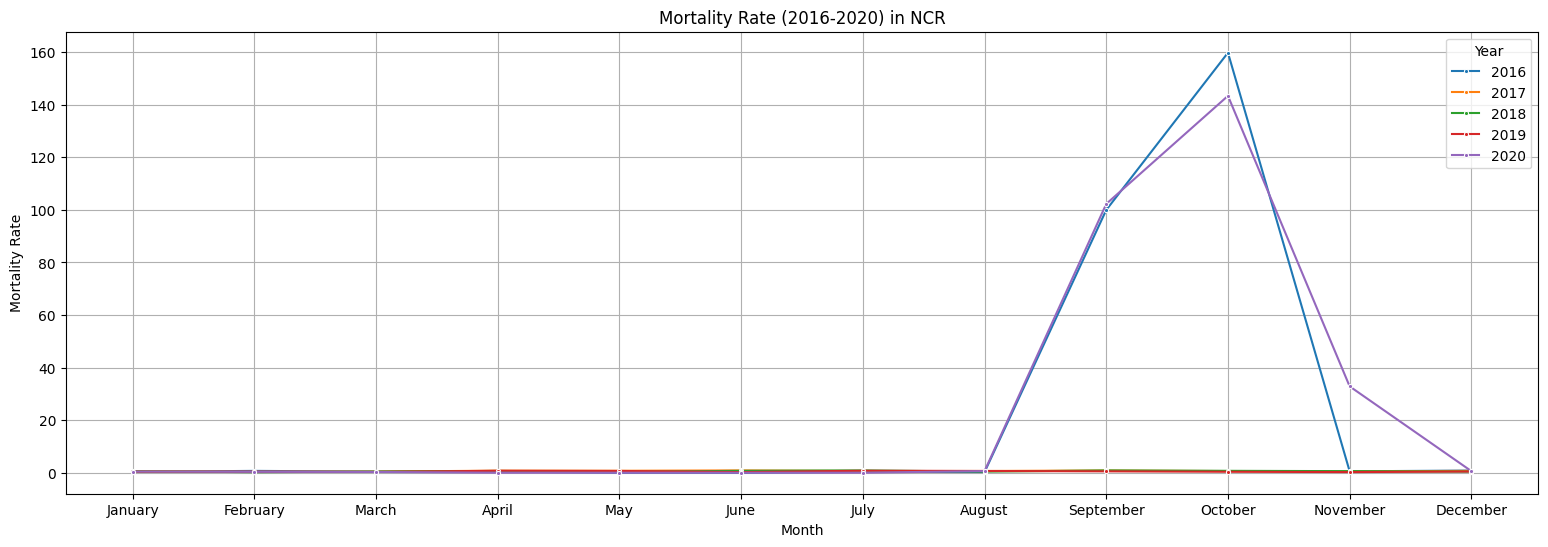

In [93]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

regions = ["Region I", "Region II", "Region III", "Region IV", "Region V", "Region VI","Region VII", "Region VIII",
          "Region IX", "Region X","Region XI", "Region XII","Region XIII", "BARMM","CAR", "NCR"]

for region in regions:
    region_data = dengue[dengue["Region"] == region]

    sns.lineplot(data=region_data, y="Mortality_Rate", x="Month", marker = ".", hue="Year", palette="tab10")
    plt.gcf().set_size_inches(19, 6)
    plt.title(f'Mortality Rate (2016-2020) in {region}')
    plt.ylabel("Mortality Rate")
    plt.xlabel("Month")
    plt.xticks(range(0,12), month_order)
    plt.grid(True)
    plt.show()